# Fake News Project
# Modeling


######################################################################################################
# STAGE 1 - Analysis for 2 classes, numeric AND title+content
######################################################################################################


In [ ]:

##########################
# STAGE 1 - Analysis for 2 classes, numeric AND title+content
##########################

# used dataset: strats_new.pkl (177.830 observations)


#########
# Pre-Processing steps:
# add new time columns
# harmonize countries

# create dataframe with numeric variables only (drop some unnecessary columns; create country dummies, get tokens): df_num)
# standardize numeric dataframe 

# delete missing values in target ("label")
# after dropping missing values in "labels" (target): 111.279 observations

# TARGET: VARIABLE "LABEL"
# 0: articles from reliable sources; 61222 observations
# 1: articles from unreliable sources; 50058 observations


# vectorize text (TF-IDF)
#########



# We ran multiple models on 2 different aspects of our dataset:

# ASPECT 1: NUMERIC DATA (need for pre-processing and standardization of data for some models)
# ASPECT 2: TITLE + CONTENT DATA ONLY (with TF-IDF vectorization)

# We chose a variety of initial models and compared the results. 
# We focused on accuracy, f1-score and the confusion matrix as main evaluation metrics.


## MODELS FOR STAGE 1 (Basic Models):
# 1) Naive Bayes Bernoulli
# 2) Naive Bayes Multinomial
# 3) Naive Bayes Complement
# 4) Logistic Regression



# Import libraries

In [4]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
# from sqlalchemy import create_engine
# import sqlalchemy as 
import sqlite3
import nltk
from nltk.tokenize import word_tokenize

import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import STOPWORDS,WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import f1_score

In [5]:
import warnings

warnings.filterwarnings(action="ignore")

# LOADING PREPROCESSED DATASET strats_new.pkl

In [106]:
# retrieve dataset
strats_new = pd.read_pickle("strats_new.pkl")

In [107]:
strats_new.head(5)

,id,date,source,title,content,author,url,published,published_utc,collection_utc,...,label,bias,factuality,questionable-source,conspiracy-pseudoscience,pro-science,word_count_content,word_count_title,nb_character_content,nb_character_title
0,21stcenturywire--2022-04-26--An Unsettling Rea...,2022-04-26,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,NEWS WIRE,https://21stcenturywire.com/2022/04/26/an-unse...,"Tue, 26 Apr 2022 10:31:24 +0000",1650983484,1651010407,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,108,8,720,61
1,21stcenturywire--2022-04-24--Episode #416 – ‘S...,2022-04-24,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,NEWS WIRE,https://21stcenturywire.com/2022/04/24/episode...,"Sun, 24 Apr 2022 14:00:48 +0000",1650823248,1651010408,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,179,11,1143,66
2,21stcenturywire--2022-07-15--UKC News: UK Thou...,2022-07-15,21stcenturywire,"UKC News: UK Thought Police, France Stops Vacc...",Authoritarians in the UK government are gettin...,NEWS WIRE,https://21stcenturywire.com/2022/07/15/ukc-new...,"Fri, 15 Jul 2022 16:26:25 +0000",1657916785,1657922407,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,207,13,1340,82
3,21stcenturywire--2022-05-22--Twitter Audit Fin...,2022-05-22,21stcenturywire,Twitter Audit Finds Half of President Biden’s ...,"After the 2020 election, many Americans began ...",NEWS WIRE,https://21stcenturywire.com/2022/05/22/twitter...,"Sun, 22 May 2022 12:17:48 +0000",1653236268,1653256808,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,504,11,3274,69
4,21stcenturywire--2022-03-11--UKC News: The Tru...,2022-03-11,21stcenturywire,UKC News: The Truth About US Bio Labs + White ...,The high stakes game surrounding the Ukraine c...,NEWS WIRE,https://21stcenturywire.com/2022/03/11/ukc-new...,"Fri, 11 Mar 2022 19:18:16 +0000",1647044296,1647039605,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,147,14,908,70


In [108]:
strats_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177831 entries, 0 to 177830
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        177831 non-null  object 
 1   date                      177831 non-null  object 
 2   source                    177831 non-null  object 
 3   title                     177831 non-null  object 
 4   content                   177831 non-null  object 
 5   author                    177831 non-null  object 
 6   url                       177831 non-null  object 
 7   published                 177831 non-null  object 
 8   published_utc             177831 non-null  int64  
 9   collection_utc            177831 non-null  int64  
 10  country                   106074 non-null  object 
 11  label                     111280 non-null  float64
 12  bias                      111280 non-null  object 
 13  factuality                110158 non-null  f

In [111]:
# inspect labels
strats_new["label"].value_counts()

# slightly unbalanced


0.0    61222
1.0    50058
Name: label, dtype: int64

In [112]:
strats_new.isna().sum()

id                              0
date                            0
source                          0
title                           0
content                         0
author                          0
url                             0
published                       0
published_utc                   0
collection_utc                  0
country                     71757
label                       66551
bias                        66551
factuality                  67673
questionable-source         66551
conspiracy-pseudoscience    66551
pro-science                 66551
word_count_content              0
word_count_title                0
nb_character_content            0
nb_character_title              0
dtype: int64

### Time data

In [113]:
strats_new["date"]
# date only, no time

0         2022-04-26
1         2022-04-24
2         2022-07-15
3         2022-05-22
4         2022-03-11
             ...    
177826    2022-02-28
177827    2022-03-25
177828    2022-06-02
177829    2022-05-23
177830    2022-09-08
Name: date, Length: 177831, dtype: object

In [114]:
## create new variables from column date
strats_new["year"] = pd.to_datetime(strats_new["date"]).dt.year
strats_new["month"] = pd.to_datetime(strats_new["date"]).dt.month
strats_new["dayofyear"] = pd.to_datetime(strats_new["date"]).dt.dayofyear
strats_new["dayofthemonth"] = pd.to_datetime(strats_new["date"]).dt.day
strats_new["weekday"] = pd.to_datetime(strats_new["date"]).dt.weekday
strats_new["weekend"] = np.where(strats_new["weekday"].isin([5,6]), 1, 0)


## Analyse and preprocess countries


In [115]:
# get countries
strats_new["country"].value_counts()

USA                               70913
Russia                            10030
United Kingdom                     9386
UnitedKingdom                      3172
Unknown                            2647
Canada                             2092
USA (44/180 Press Freedom)         1742
Bulgaria                           1518
Germany (11/180 Press Freedom)     1240
France                             1057
Cyprus                              819
Israel                              588
Ireland                             375
Australia                           196
Macedonia                           186
Germany                              61
Japan                                25
Kenya                                20
Netherlands                           7
Name: country, dtype: int64

In [116]:
# harmonize countries
strats_new['country'].replace({'USA (44/180 Press Freedom)': 'USA', 'Germany (11/180 Press Freedom)': 'Germany', 'UnitedKingdom': 'United Kingdom'}, inplace=True)

In [117]:
# check whether it worked
strats_new["country"].value_counts()

USA               72655
United Kingdom    12558
Russia            10030
Unknown            2647
Canada             2092
Bulgaria           1518
Germany            1301
France             1057
Cyprus              819
Israel              588
Ireland             375
Australia           196
Macedonia           186
Japan                25
Kenya                20
Netherlands           7
Name: country, dtype: int64

# NUMERIC DATA ANALYSIS

## Pre-Processing steps

In [118]:
# Tokenize words in content
strats_new['tokenized_content'] = strats_new.apply(lambda row: nltk.word_tokenize(row['content']), axis=1)

# finding length
strats_new['tok_content_length'] = strats_new.apply(lambda row: len(row['tokenized_content']), axis=1)


In [119]:
# Tokenize words in title
strats_new['tokenized_title'] = strats_new.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)

# finding length
strats_new['tok_title_length'] = strats_new.apply(lambda row: len(row['tokenized_title']), axis=1)


In [120]:
# create country dummies
country_dummies = pd.get_dummies(strats_new["country"])


In [121]:
strats_new2 = pd.concat([strats_new, country_dummies], axis=1)


In [122]:
### DELETE UNNECESSARY COLUMNS
# date
# author
# published
# collection_utc
# bias
# country

columns_to_drop = ['date', 'author', 'published', 'collection_utc', 'bias', 'country']
strats_new3 = strats_new2.drop(columns=columns_to_drop)


In [123]:
strats_new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177831 entries, 0 to 177830
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        177831 non-null  object 
 1   source                    177831 non-null  object 
 2   title                     177831 non-null  object 
 3   content                   177831 non-null  object 
 4   url                       177831 non-null  object 
 5   published_utc             177831 non-null  int64  
 6   label                     111280 non-null  float64
 7   factuality                110158 non-null  float64
 8   questionable-source       111280 non-null  float64
 9   conspiracy-pseudoscience  111280 non-null  float64
 10  pro-science               111280 non-null  float64
 11  word_count_content        177831 non-null  int64  
 12  word_count_title          177831 non-null  int64  
 13  nb_character_content      177831 non-null  i

## Create df_num for numeric analyses

In [124]:
df_num = strats_new3.select_dtypes(exclude=['object'])
print(df_num)


        published_utc  label  factuality  questionable-source  \
0          1650983484    1.0         2.0                  0.0   
1          1650823248    1.0         2.0                  0.0   
2          1657916785    1.0         2.0                  0.0   
3          1653236268    1.0         2.0                  0.0   
4          1647044296    1.0         2.0                  0.0   
...               ...    ...         ...                  ...   
177826     1646027400    1.0         1.0                  0.0   
177827     1648236633    1.0         1.0                  0.0   
177828     1654148700    1.0         1.0                  0.0   
177829     1653344428    1.0         1.0                  0.0   
177830     1662644700    1.0         1.0                  0.0   

        conspiracy-pseudoscience  pro-science  word_count_content  \
0                            1.0          0.0                 108   
1                            1.0          0.0                 179   
2           

In [125]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177831 entries, 0 to 177830
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   published_utc             177831 non-null  int64  
 1   label                     111280 non-null  float64
 2   factuality                110158 non-null  float64
 3   questionable-source       111280 non-null  float64
 4   conspiracy-pseudoscience  111280 non-null  float64
 5   pro-science               111280 non-null  float64
 6   word_count_content        177831 non-null  int64  
 7   word_count_title          177831 non-null  int64  
 8   nb_character_content      177831 non-null  int64  
 9   nb_character_title        177831 non-null  int64  
 10  year                      177831 non-null  int64  
 11  month                     177831 non-null  int64  
 12  dayofyear                 177831 non-null  int64  
 13  dayofthemonth             177831 non-null  i

In [126]:
## calculate frequencies of labels
df_num["label"].value_counts()

0.0    61222
1.0    50058
Name: label, dtype: int64

In [127]:
df_num.isna().sum()

published_utc                   0
label                       66551
factuality                  67673
questionable-source         66551
conspiracy-pseudoscience    66551
pro-science                 66551
word_count_content              0
word_count_title                0
nb_character_content            0
nb_character_title              0
year                            0
month                           0
dayofyear                       0
dayofthemonth                   0
weekday                         0
weekend                         0
tok_content_length              0
tok_title_length                0
Australia                       0
Bulgaria                        0
Canada                          0
Cyprus                          0
France                          0
Germany                         0
Ireland                         0
Israel                          0
Japan                           0
Kenya                           0
Macedonia                       0
Netherlands   

In [128]:
# For modeling purposes, we deleted missing values
df_num.dropna(subset=['factuality'], axis = 0, inplace=True)

In [129]:
# For modeling purposes, we deleted missing values in the column "labels" (target variable). 
df_num.dropna(subset=['label'], axis = 0, inplace=True)

In [130]:
## calculate frequencies of labels
df_num["label"].value_counts()

0.0    61222
1.0    48936
Name: label, dtype: int64

## CREATE NUMERIC TRAIN / TEST DATASETS FOR MODELING

## x_train, x_test, y_train, y_test (lower case x and y)


In [131]:
# DEFINE x and y
x = df_num.drop(["label"], axis = 1)
y = df_num["label"]


In [132]:
x.head(3)

,published_utc,factuality,questionable-source,conspiracy-pseudoscience,pro-science,word_count_content,word_count_title,nb_character_content,nb_character_title,year,...,Ireland,Israel,Japan,Kenya,Macedonia,Netherlands,Russia,USA,United Kingdom,Unknown
0,1650983484,2.0,0.0,1.0,0.0,108,8,720,61,2022,...,0,0,0,0,0,0,0,1,0,0
1,1650823248,2.0,0.0,1.0,0.0,179,11,1143,66,2022,...,0,0,0,0,0,0,0,1,0,0
2,1657916785,2.0,0.0,1.0,0.0,207,13,1340,82,2022,...,0,0,0,0,0,0,0,1,0,0


In [133]:
x.dtypes

published_utc                 int64
factuality                  float64
questionable-source         float64
conspiracy-pseudoscience    float64
pro-science                 float64
word_count_content            int64
word_count_title              int64
nb_character_content          int64
nb_character_title            int64
year                          int64
month                         int64
dayofyear                     int64
dayofthemonth                 int64
weekday                       int64
weekend                       int32
tok_content_length            int64
tok_title_length              int64
Australia                     uint8
Bulgaria                      uint8
Canada                        uint8
Cyprus                        uint8
France                        uint8
Germany                       uint8
Ireland                       uint8
Israel                        uint8
Japan                         uint8
Kenya                         uint8
Macedonia                   

In [134]:
y.head(3)

0    1.0
1    1.0
2    1.0
Name: label, dtype: float64

In [135]:
# Split the dataset:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)


# Create Naive Bayes Bernoulli Model on numeric data

In [136]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [137]:
# Create a Bernoulli Naive Bayes classifier
clf_Bern_dfnum = BernoulliNB()


In [138]:
# Train the classifier
clf_Bern_dfnum.fit(x_train, y_train)


BernoulliNB()

In [139]:
y_pred_Bern_dfnum = clf_Bern_dfnum.predict(x_test)


In [140]:
# Evaluate the model
accuracyNB_Bernoulli_dfnum = accuracy_score(y_test, y_pred_Bern_dfnum)
print("Accuracy:", accuracyNB_Bernoulli_dfnum)

# 0.99


Accuracy: 0.991421568627451


In [141]:
# Evaluate the model

f1NB_Bernoulli_dfnum = f1_score(y_test, y_pred_Bern_dfnum)
print("f1 score:", f1NB_Bernoulli_dfnum)

# 0.99


f1 score: 0.9904991705625095


In [142]:
# get confusion matrix
pd.crosstab(y_test, y_pred_Bern_dfnum, rownames=["true"], colnames=["predict"])

# looks ok
# perfect for fake news

predict,0.0,1.0
true,,
0.0,11991,189
1.0,0,9852


In [143]:
# Evaluate model with classification report
from sklearn.metrics import classification_report 

print("Naive Bayes Bernoulli classification report _dfnum:\n", classification_report (y_test, y_pred_Bern_dfnum))

# looks ok

Naive Bayes Bernoulli classification report _dfnum:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     12180
         1.0       0.98      1.00      0.99      9852

    accuracy                           0.99     22032
   macro avg       0.99      0.99      0.99     22032
weighted avg       0.99      0.99      0.99     22032



In [144]:
# Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

conf_matrix_Bern_dfnum = confusion_matrix(y_test, y_pred_Bern_dfnum)

print("Confusion Matrix:\n",  conf_matrix_Bern_dfnum)


Confusion Matrix:
 [[11991   189]
 [    0  9852]]


# Create Naive Bayes Multinomial on numeric data

In [145]:
from sklearn.naive_bayes import MultinomialNB
clf_mult_dfnum = MultinomialNB()


In [146]:
clf_mult_dfnum.fit(x_train, y_train)


MultinomialNB()

In [147]:
# get accuracy
accuracyNB_Multinomial_dfnum = clf_mult_dfnum.score(x_test, y_test)
accuracyNB_Multinomial_dfnum

# 0.527


0.5277323892519971

In [148]:
# get confusion matrix
y_pred_NB_Multinomial_dfnum = clf_mult_dfnum.predict(x_test)
pd.crosstab(y_test, y_pred_NB_Multinomial_dfnum, rownames=["true"], colnames=["predict"])

# worse than Bernoulli

predict,0.0,1.0
true,,
0.0,4907,7273
1.0,3132,6720


In [149]:
# Evaluate the model

f1NB_Multinomial_dfnum = f1_score(y_test, y_pred_NB_Multinomial_dfnum)
print("f1 score:", f1NB_Multinomial_dfnum)


# 0.56

f1 score: 0.563640176137555


In [150]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Multinomial classification report _dfnum:\n ", classification_report (y_test, y_pred_NB_Multinomial_dfnum))


Naive Bayes Multinomial classification report _dfnum:
                precision    recall  f1-score   support

         0.0       0.61      0.40      0.49     12180
         1.0       0.48      0.68      0.56      9852

    accuracy                           0.53     22032
   macro avg       0.55      0.54      0.52     22032
weighted avg       0.55      0.53      0.52     22032



In [151]:
# create confusion matrix
cf_matrix_Multinomial_dfnum = confusion_matrix(y_test, y_pred_NB_Multinomial_dfnum)
print(cf_matrix_Multinomial_dfnum)


[[4907 7273]
 [3132 6720]]


# Create Naive Bayes Complement on numeric data

In [152]:
from sklearn.naive_bayes import ComplementNB
clf_compl_dfnum = ComplementNB()


In [153]:
clf_compl_dfnum.fit(x_train, y_train)


ComplementNB()

In [154]:
# get accuracy
accuracyNB_Complement_dfnum = clf_compl_dfnum.score(x_test, y_test)
accuracyNB_Complement_dfnum

# 0.527


0.5275508351488744

In [155]:
# get confusion matrix
y_pred_NB_Complement_dfnum = clf_compl_dfnum.predict(x_test)
pd.crosstab(y_test, y_pred_NB_Complement_dfnum, rownames=["true"], colnames=["predict"])

# between bernoulli and multinomial

predict,0.0,1.0
true,,
0.0,4902,7278
1.0,3131,6721


In [156]:
# Evaluate the model

f1NB_Complement_dfnum = f1_score(y_test, y_pred_NB_Complement_dfnum)
print("f1 score:", f1NB_Complement_dfnum)


# 0.56

f1 score: 0.5635822397383757


In [157]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Complement classification report _dfnum:\n ", classification_report (y_test, y_pred_NB_Complement_dfnum))


Naive Bayes Complement classification report _dfnum:
                precision    recall  f1-score   support

         0.0       0.61      0.40      0.49     12180
         1.0       0.48      0.68      0.56      9852

    accuracy                           0.53     22032
   macro avg       0.55      0.54      0.52     22032
weighted avg       0.55      0.53      0.52     22032



In [158]:
# create confusion matrix
cf_matrix_Complement_dfnum = confusion_matrix(y_test, y_pred_NB_Complement_dfnum)
print(cf_matrix_Complement_dfnum)


[[4902 7278]
 [3131 6721]]


# CREATE SCALED DATASET of numeric data

In [42]:
# Logistic Regression need standardisation


In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [160]:
cols = x_train.columns

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=cols)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=cols)


In [161]:
x_train_scaled

,published_utc,factuality,questionable-source,conspiracy-pseudoscience,pro-science,word_count_content,word_count_title,nb_character_content,nb_character_title,year,...,Ireland,Israel,Japan,Kenya,Macedonia,Netherlands,Russia,USA,United Kingdom,Unknown
0,1.740245,0.371297,-0.589450,-0.477455,-0.052475,0.672949,0.985129,0.583882,0.491270,0.0,...,-0.059222,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,-0.302209,-1.393960,2.793370,-0.158023
1,0.723393,-0.361288,1.696497,-0.477455,-0.052475,0.240098,0.479880,0.226778,0.408117,0.0,...,-0.059222,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,-0.302209,0.717381,-0.357991,-0.158023
2,0.304675,-1.093874,1.696497,-0.477455,-0.052475,0.582966,-1.035868,0.626465,-0.797601,0.0,...,-0.059222,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,-0.302209,0.717381,-0.357991,-0.158023
3,0.657243,-0.361288,-0.589450,-0.477455,-0.052475,-0.183444,-2.046367,-0.210015,-2.377507,0.0,...,-0.059222,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,-0.302209,0.717381,-0.357991,-0.158023
4,-1.339640,1.103883,-0.589450,-0.477455,-0.052475,-0.692315,0.732504,-0.696862,0.117082,0.0,...,16.885597,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,-0.302209,-1.393960,-0.357991,-0.158023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88121,-1.087384,1.103883,-0.589450,-0.477455,-0.052475,0.295950,0.479880,0.257906,0.449694,0.0,...,-0.059222,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,-0.302209,0.717381,-0.357991,-0.158023
88122,-0.730027,1.103883,-0.589450,-0.477455,-0.052475,-0.617846,0.227255,-0.629126,0.616000,0.0,...,-0.059222,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,-0.302209,0.717381,-0.357991,-0.158023
88123,1.512813,-0.361288,1.696497,-0.477455,-0.052475,-0.591472,0.732504,-0.584053,0.532847,0.0,...,-0.059222,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,3.308971,-1.393960,-0.357991,-0.158023
88124,0.375938,-1.826459,-0.589450,2.094439,-0.052475,0.514703,-1.541118,0.505439,-1.379671,0.0,...,-0.059222,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,-0.302209,0.717381,-0.357991,-0.158023


In [162]:
x_test_scaled

,published_utc,factuality,questionable-source,conspiracy-pseudoscience,pro-science,word_count_content,word_count_title,nb_character_content,nb_character_title,year,...,Ireland,Israel,Japan,Kenya,Macedonia,Netherlands,Russia,USA,United Kingdom,Unknown
0,0.310430,1.103883,-0.589450,-0.477455,-0.052475,-0.333933,0.227255,-0.338014,0.033929,0.0,...,-0.059222,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,-0.302209,0.717381,-0.357991,-0.158023
1,-1.089873,-1.093874,-0.589450,2.094439,-0.052475,3.446919,-1.035868,3.100295,-1.047060,0.0,...,-0.059222,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,-0.302209,0.717381,-0.357991,-0.158023
2,1.042767,-0.361288,1.696497,-0.477455,-0.052475,-0.748167,-0.277994,-0.750402,0.241811,0.0,...,-0.059222,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,-0.302209,0.717381,-0.357991,-0.158023
3,-0.684300,1.836468,-0.589450,-0.477455,-0.052475,0.758278,-0.277994,0.776130,-0.548142,0.0,...,-0.059222,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,-0.302209,0.717381,-0.357991,-0.158023
4,1.570309,0.371297,-0.589450,-0.477455,-0.052475,0.474365,-0.783244,0.556489,-0.672871,0.0,...,-0.059222,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,-0.302209,0.717381,-0.357991,-0.158023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22027,0.650383,1.103883,-0.589450,-0.477455,-0.052475,0.199761,0.479880,0.286544,0.283388,0.0,...,-0.059222,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,-0.302209,0.717381,-0.357991,-0.158023
22028,-1.477824,1.103883,-0.589450,-0.477455,-0.052475,2.959767,0.227255,2.597261,0.782305,0.0,...,-0.059222,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,-0.302209,0.717381,-0.357991,-0.158023
22029,0.046618,0.371297,-0.589450,-0.477455,-0.052475,-0.081049,-0.277994,-0.057610,-0.132377,0.0,...,-0.059222,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,-0.302209,0.717381,-0.357991,-0.158023
22030,-0.391080,1.103883,-0.589450,-0.477455,-0.052475,0.806373,0.985129,0.663819,0.616000,0.0,...,-0.059222,-0.072911,-0.015066,-0.012147,-0.041429,-0.008913,-0.302209,0.717381,-0.357991,-0.158023


# LOGISTIC REGRESSION ON SCALED NUMERIC DATA 

In [163]:
# Instantiate model 
from sklearn.linear_model import LogisticRegression

clf_LogReg_dfnum = LogisticRegression(C=1.0)


In [164]:
# Fit the model on the training dataset
clf_LogReg_dfnum.fit(x_train_scaled, y_train)


LogisticRegression()

In [165]:
# get accuracy
accuracy_logReg_dfnum = clf_LogReg_dfnum.score(x_test_scaled, y_test)
accuracy_logReg_dfnum

# 1.0


1.0

In [166]:
# get confusion matrix
y_pred_LogReg_dfnum = clf_LogReg_dfnum.predict(x_test_scaled)
pd.crosstab(y_test, y_pred_LogReg_dfnum, rownames=["true"], colnames=["predict"])

# 100% perfect prediction


predict,0.0,1.0
true,,
0.0,12180,0
1.0,0,9852


In [167]:
# Evaluate the model

f1_LogReg_dfnum = f1_score(y_test, y_pred_LogReg_dfnum)
print("f1 score:", f1_LogReg_dfnum)


# 1.0

f1 score: 1.0


In [168]:
from sklearn.metrics import classification_report 

# get classification report
print("Logistic Regression classification report _dfnum:\n ", classification_report (y_test, y_pred_LogReg_dfnum))


Logistic Regression classification report _dfnum:
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12180
         1.0       1.00      1.00      1.00      9852

    accuracy                           1.00     22032
   macro avg       1.00      1.00      1.00     22032
weighted avg       1.00      1.00      1.00     22032



In [169]:
# create confusion matrix
cf_matrix_LogReg_dfnum = confusion_matrix(y_test, y_pred_LogReg_dfnum)
print(cf_matrix_LogReg_dfnum)

# 100% accuracy!


[[12180     0]
 [    0  9852]]


Confusion Matrix for Logistic Regression model on numeric data


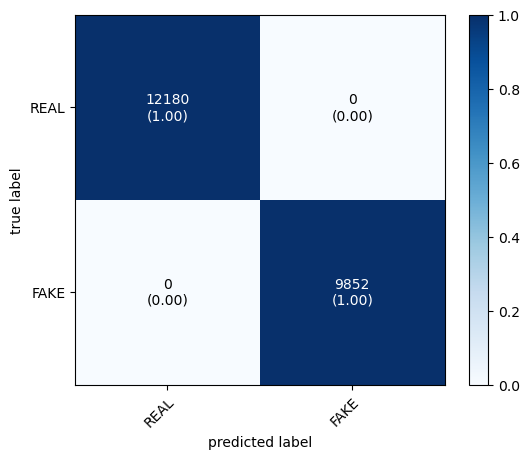

In [170]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for Logistic Regression model on numeric data")
plot_confusion_matrix(conf_mat = cf_matrix_LogReg_dfnum,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();

## Interpretation of coefficients of LogReg

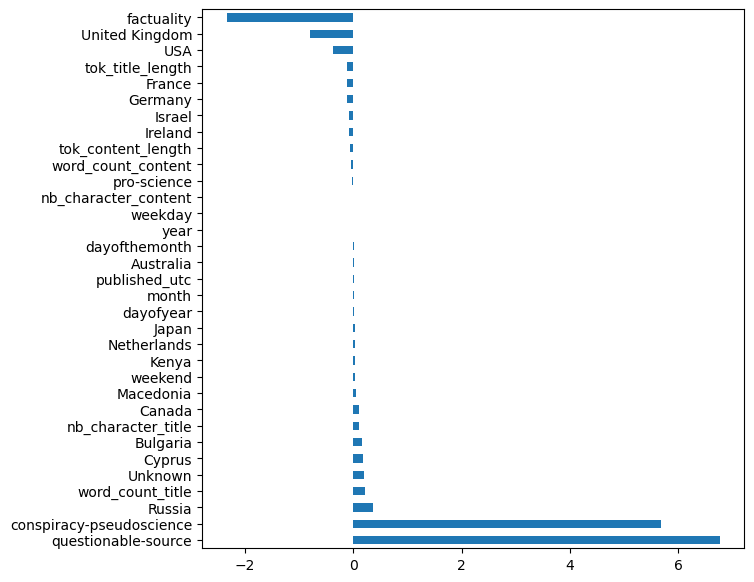

In [171]:
plt.figure(figsize=(7,7))
pd.Series(clf_LogReg_dfnum.coef_[0], x_train_scaled.columns).sort_values(
    ascending=False).plot(kind='barh');

# COMPARE MODELS ON NUMERIC DATA


In [172]:
print("Naive Bayes Bernoulli accuracy score df_num:", accuracyNB_Bernoulli_dfnum)
print("Naive Bayes Multinomial accuracy score df_num:", accuracyNB_Multinomial_dfnum)
print("Naive Bayes Complement accuracy score df_num :", accuracyNB_Complement_dfnum)
print("Logistic Regression accuracy score df_num:", accuracy_logReg_dfnum)


Naive Bayes Bernoulli accuracy score df_num: 0.991421568627451
Naive Bayes Multinomial accuracy score df_num: 0.5277323892519971
Naive Bayes Complement accuracy score df_num : 0.5275508351488744
Logistic Regression accuracy score df_num: 1.0


In [173]:
#Creating the Dictionary with model name as key adn accuracy as key-value
labels_accuracy_dfnum={'Naive Bayes Bernoulli':accuracyNB_Bernoulli_dfnum,
        'Naive Bayes Multinomial':accuracyNB_Multinomial_dfnum,
        'Naive Bayes Complement':accuracyNB_Complement_dfnum,
        'Logistic Regression':accuracy_logReg_dfnum}


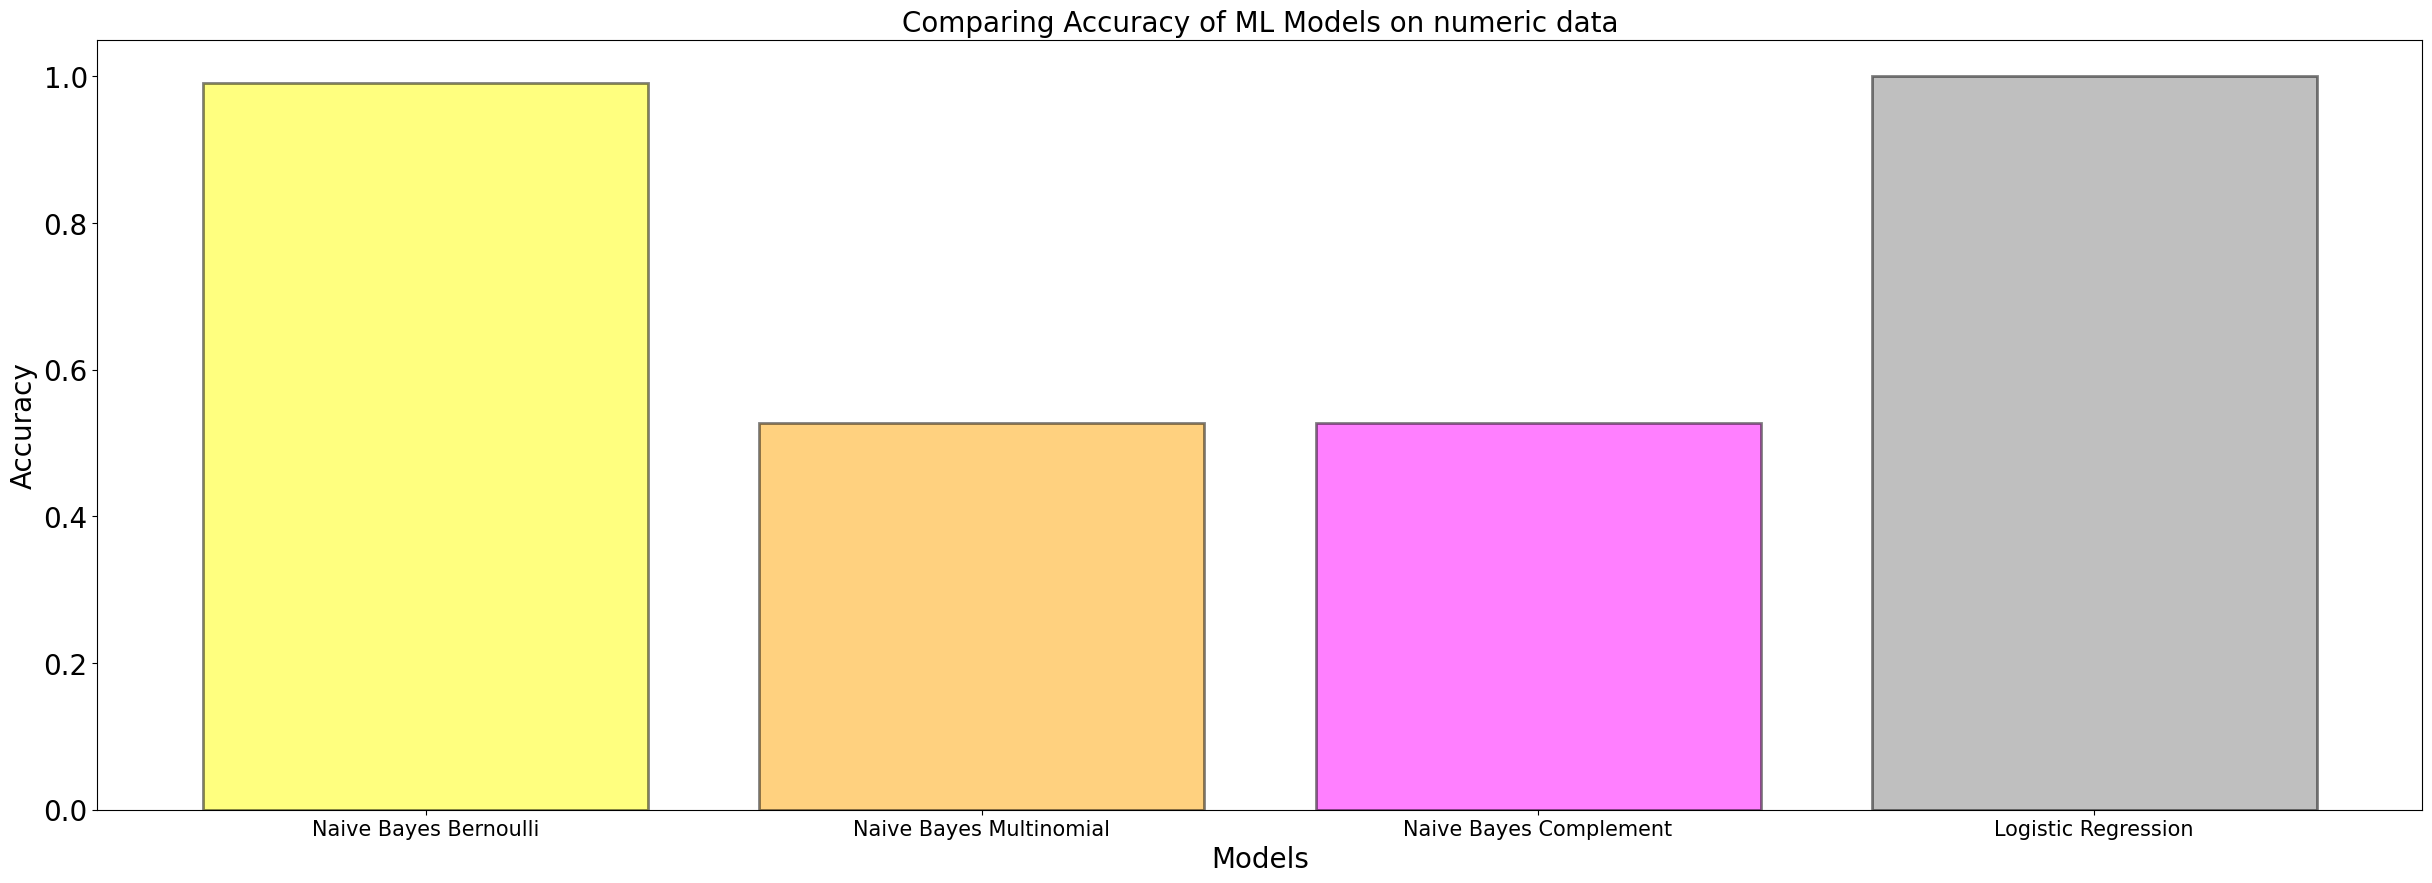

In [174]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(30,10))
plt.title('Comparing Accuracy of ML Models on numeric data',fontsize=20)
colors=['yellow','orange','magenta', 'gray']
plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels_accuracy_dfnum.keys(),labels_accuracy_dfnum.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5);



In [175]:
print("Naive Bayes Bernoulli f1 scored df_num:", f1NB_Bernoulli_dfnum)
print("Naive Bayes Multinomial f1 score df_num:", f1NB_Multinomial_dfnum)
print("Naive Bayes Complement f1 score df_num:", f1NB_Complement_dfnum)
print("Logistic Regression f1 score df_num :", f1_LogReg_dfnum)


Naive Bayes Bernoulli f1 scored df_num: 0.9904991705625095
Naive Bayes Multinomial f1 score df_num: 0.563640176137555
Naive Bayes Complement f1 score df_num: 0.5635822397383757
Logistic Regression f1 score df_num : 1.0


In [176]:
#Creating the Dictionary with model name as key adn accuracy as key-value
labels_f1_dfnum={'Naive Bayes Bernoulli':accuracyNB_Bernoulli_dfnum,
        'Naive Bayes Multinomial':accuracyNB_Multinomial_dfnum,
        'Naive Bayes Complement':accuracyNB_Complement_dfnum,
        'Logistic Regression':accuracy_logReg_dfnum}


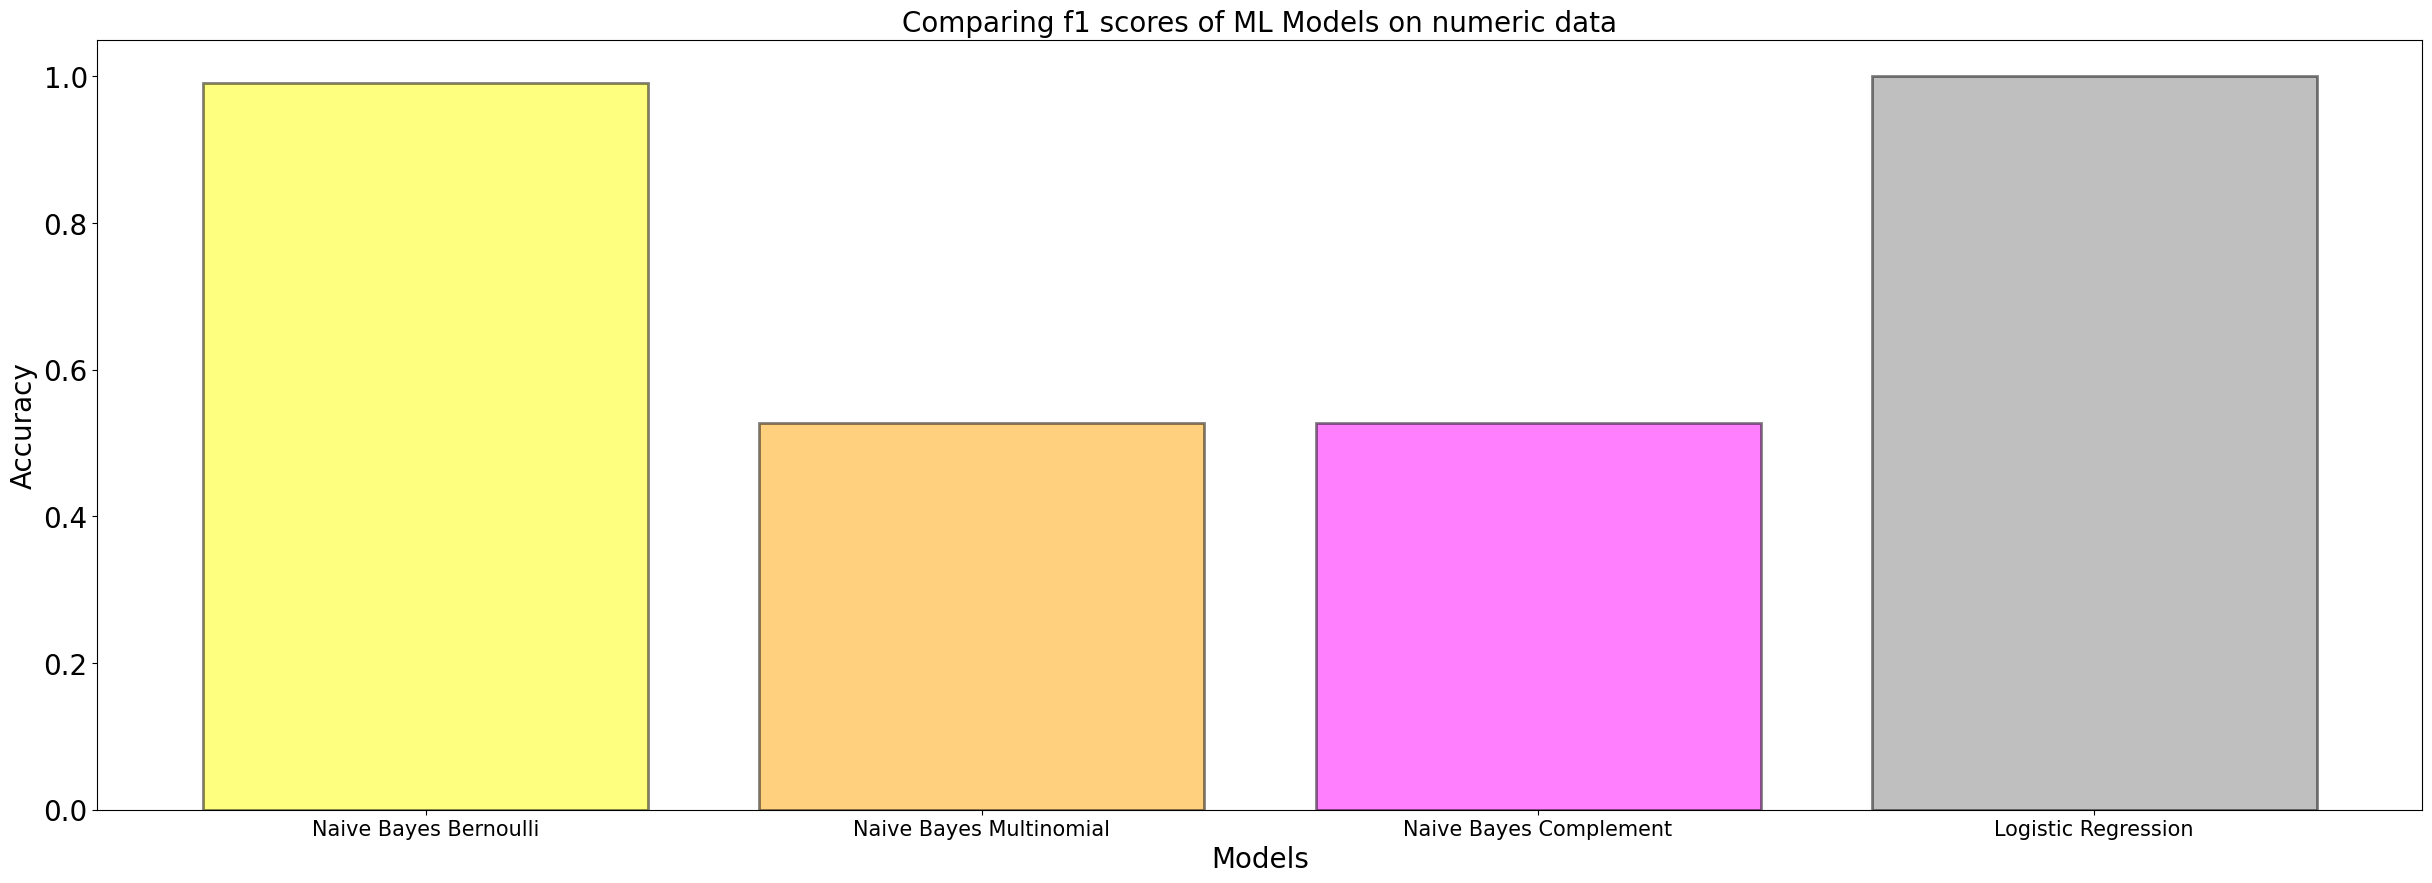

In [177]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(30,10))
plt.title('Comparing f1 scores of ML Models on numeric data',fontsize=20)
colors=['yellow','orange','magenta', 'gray']
plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels_f1_dfnum.keys(),labels_f1_dfnum.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5);



# TITLE + CONTENT DATA

# Create X and Y (only title and text)
# X_train_text_tfidf, X_test_text_tfidf, Y_train, Y_test (uppercase letters)


In [6]:
# retrieve dataset
strats_new = pd.read_pickle("strats_new.pkl")

In [7]:
strats_new.head(5)

,id,date,source,title,content,author,url,published,published_utc,collection_utc,...,label,bias,factuality,questionable-source,conspiracy-pseudoscience,pro-science,word_count_content,word_count_title,nb_character_content,nb_character_title
0,21stcenturywire--2022-04-26--An Unsettling Rea...,2022-04-26,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,NEWS WIRE,https://21stcenturywire.com/2022/04/26/an-unse...,"Tue, 26 Apr 2022 10:31:24 +0000",1650983484,1651010407,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,108,8,720,61
1,21stcenturywire--2022-04-24--Episode #416 – ‘S...,2022-04-24,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,NEWS WIRE,https://21stcenturywire.com/2022/04/24/episode...,"Sun, 24 Apr 2022 14:00:48 +0000",1650823248,1651010408,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,179,11,1143,66
2,21stcenturywire--2022-07-15--UKC News: UK Thou...,2022-07-15,21stcenturywire,"UKC News: UK Thought Police, France Stops Vacc...",Authoritarians in the UK government are gettin...,NEWS WIRE,https://21stcenturywire.com/2022/07/15/ukc-new...,"Fri, 15 Jul 2022 16:26:25 +0000",1657916785,1657922407,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,207,13,1340,82
3,21stcenturywire--2022-05-22--Twitter Audit Fin...,2022-05-22,21stcenturywire,Twitter Audit Finds Half of President Biden’s ...,"After the 2020 election, many Americans began ...",NEWS WIRE,https://21stcenturywire.com/2022/05/22/twitter...,"Sun, 22 May 2022 12:17:48 +0000",1653236268,1653256808,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,504,11,3274,69
4,21stcenturywire--2022-03-11--UKC News: The Tru...,2022-03-11,21stcenturywire,UKC News: The Truth About US Bio Labs + White ...,The high stakes game surrounding the Ukraine c...,NEWS WIRE,https://21stcenturywire.com/2022/03/11/ukc-new...,"Fri, 11 Mar 2022 19:18:16 +0000",1647044296,1647039605,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,147,14,908,70


In [8]:
strats_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177831 entries, 0 to 177830
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        177831 non-null  object 
 1   date                      177831 non-null  object 
 2   source                    177831 non-null  object 
 3   title                     177831 non-null  object 
 4   content                   177831 non-null  object 
 5   author                    177831 non-null  object 
 6   url                       177831 non-null  object 
 7   published                 177831 non-null  object 
 8   published_utc             177831 non-null  int64  
 9   collection_utc            177831 non-null  int64  
 10  country                   106074 non-null  object 
 11  label                     111280 non-null  float64
 12  bias                      111280 non-null  object 
 13  factuality                110158 non-null  f

In [9]:
# inspect labels
strats_new["label"].value_counts()

# slightly unbalanced


0.0    61222
1.0    50058
Name: label, dtype: int64

In [10]:
# For modeling purposes, we deleted missing values in the column "labels" (target variable). 
strats_new.dropna(subset=['label'], axis = 0, inplace=True)

In [11]:
## calculate frequencies of labels
strats_new["label"].value_counts()

0.0    61222
1.0    50058
Name: label, dtype: int64

In [12]:
# DEFINE X and Y
X = strats_new.drop("label", axis=1)
Y = strats_new["label"]


In [13]:
X.columns = X.columns.astype(str)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111280 entries, 0 to 177830
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        111280 non-null  object 
 1   date                      111280 non-null  object 
 2   source                    111280 non-null  object 
 3   title                     111280 non-null  object 
 4   content                   111280 non-null  object 
 5   author                    111280 non-null  object 
 6   url                       111280 non-null  object 
 7   published                 111280 non-null  object 
 8   published_utc             111280 non-null  int64  
 9   collection_utc            111280 non-null  int64  
 10  country                   106074 non-null  object 
 11  bias                      111280 non-null  object 
 12  factuality                110158 non-null  float64
 13  questionable-source       111280 non-null  f

In [15]:
X.isnull().sum()

id                             0
date                           0
source                         0
title                          0
content                        0
author                         0
url                            0
published                      0
published_utc                  0
collection_utc                 0
country                     5206
bias                           0
factuality                  1122
questionable-source            0
conspiracy-pseudoscience       0
pro-science                    0
word_count_content             0
word_count_title               0
nb_character_content           0
nb_character_title             0
dtype: int64

In [16]:
X.shape

(111280, 20)

In [17]:
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 111280 entries, 0 to 177830
Series name: label
Non-Null Count   Dtype  
--------------   -----  
111280 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


In [18]:
Y.isnull().sum()

0

In [19]:
Y.shape

(111280,)

# Vectorizing

### TFIDF Vectorizing
### USING CONTENT AND TITLE ONLY


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

# Create two Tfidf Vectorizer objects
vectorizer1_tfidf = TfidfVectorizer()
vectorizer2_tfidf = TfidfVectorizer()

# Seperating content and title(what we want to predict on)
# Fit the vectorizers on the data
vectorizer1_tfidf.fit(X["content"])
vectorizer2_tfidf.fit(X["title"])

# Transform the data
X_content_tfidf = vectorizer1_tfidf.transform(X["content"])
X_title_tfidf = vectorizer2_tfidf.transform(X["title"])

# Combine the feature matrices
X_text_tfidf = hstack([X_content_tfidf, X_title_tfidf])

In [21]:
X_text_tfidf

<111280x352812 sparse matrix of type '<class 'numpy.float64'>'
	with 27130350 stored elements in Compressed Sparse Row format>

In [22]:
X_text_tfidf.shape

(111280, 352812)

## Create Train / Test Datasets TFIDF

In [23]:
from sklearn.model_selection import train_test_split

X_train_text_tfidf, X_test_text_tfidf, Y_train, Y_test = train_test_split(X_text_tfidf, Y, test_size=0.2, random_state = 2)


In [24]:
X_train_text_tfidf

<89024x352812 sparse matrix of type '<class 'numpy.float64'>'
	with 21713517 stored elements in Compressed Sparse Row format>

In [25]:
X_train_text_tfidf.shape

(89024, 352812)

In [26]:
X_test_text_tfidf

<22256x352812 sparse matrix of type '<class 'numpy.float64'>'
	with 5416833 stored elements in Compressed Sparse Row format>

In [27]:
X_test_text_tfidf.shape

(22256, 352812)

In [28]:
Y_train

169056    1.0
160995    0.0
70153     0.0
40328     0.0
54927     1.0
         ... 
62833     0.0
160982    0.0
102715    1.0
166045    0.0
139097    0.0
Name: label, Length: 89024, dtype: float64

In [29]:
Y_train.shape

(89024,)

In [30]:
Y_test

74321     1.0
174089    0.0
167582    1.0
31490     1.0
167089    1.0
         ... 
48590     0.0
12906     1.0
157618    0.0
34414     0.0
83273     1.0
Name: label, Length: 22256, dtype: float64

In [31]:
Y_test.shape

(22256,)

# Naive Bayes Bernoulli on tfidf text data

In [205]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [206]:
# Create a Bernoulli Naive Bayes classifier
clf_Bern_tfidf = BernoulliNB()


In [207]:
# Train the classifier
clf_Bern_tfidf.fit(X_train_text_tfidf, Y_train)


BernoulliNB()

In [208]:
# Make predictions on the test set
y_pred_NB_Bern_tfidf = clf_Bern_tfidf.predict(X_test_text_tfidf)


In [209]:
# Evaluate the model with accuracy
accuracy_NB_Bern_tfidf = accuracy_score(Y_test, y_pred_NB_Bern_tfidf)
print("Accuracy:", accuracy_NB_Bern_tfidf)

# 0.706


Accuracy: 0.7064162473040978


In [210]:
# Evaluate the model

f1NB_Bernoulli_tfidf = f1_score(Y_test, y_pred_NB_Bern_tfidf)
print("f1 score:", f1NB_Bernoulli_tfidf)

# 0.697

f1 score: 0.697751873438801


In [211]:
# Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

cf_matrix_NB_Bern_tfidf = confusion_matrix(Y_test, y_pred_NB_Bern_tfidf)
print("Confusion Matrix:\n",  cf_matrix_NB_Bern_tfidf)


Confusion Matrix:
 [[8180 4036]
 [2498 7542]]


In [212]:
# Evaluate model with classification report
from sklearn.metrics import classification_report 

print("Naive Bayes Bernoulli tfidf classification report:\n", classification_report (Y_test, y_pred_NB_Bern_tfidf))


Naive Bayes Bernoulli tfidf classification report:
               precision    recall  f1-score   support

         0.0       0.77      0.67      0.71     12216
         1.0       0.65      0.75      0.70     10040

    accuracy                           0.71     22256
   macro avg       0.71      0.71      0.71     22256
weighted avg       0.71      0.71      0.71     22256



# MULTINOMIAL NAIVE BAYES on tfidf text data


In [213]:
from sklearn.naive_bayes import MultinomialNB

In [214]:
from sklearn.naive_bayes import MultinomialNB
clf_mult_tfidf = MultinomialNB()


In [215]:
# fit the model
clf_mult_tfidf.fit(X_train_text_tfidf, Y_train)


MultinomialNB()

In [216]:
y_pred_NB_Mult_tfidf = clf_mult_tfidf.predict(X_test_text_tfidf)


In [217]:
# get accuracy
accuracy_NB_Mult_tfidf = clf_mult_tfidf.score(X_test_text_tfidf, Y_test)
accuracy_NB_Mult_tfidf

# 0.78


0.7819464414090582

In [218]:
# Evaluate the model

f1NB_Multinomial_tfidf = f1_score(Y_test, y_pred_NB_Mult_tfidf)
print("f1 score:", f1NB_Multinomial_tfidf)

# 0.706

f1 score: 0.7062882043212492


In [219]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_NB_Mult_tfidf, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,11568,648
1.0,4205,5835


In [220]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Multinomial tfidf classification report:\n ", classification_report (Y_test, y_pred_NB_Mult_tfidf))

Naive Bayes Multinomial tfidf classification report:
                precision    recall  f1-score   support

         0.0       0.73      0.95      0.83     12216
         1.0       0.90      0.58      0.71     10040

    accuracy                           0.78     22256
   macro avg       0.82      0.76      0.77     22256
weighted avg       0.81      0.78      0.77     22256



In [221]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


In [222]:
# create confusion matrix
cf_matrix_NB_Mult_tfidf = confusion_matrix(Y_test, y_pred_NB_Mult_tfidf)
print(cf_matrix_NB_Mult_tfidf)


[[11568   648]
 [ 4205  5835]]


# COMPLEMENT NAIVE BAYES on tfidf text data


In [223]:
from sklearn.naive_bayes import ComplementNB
clf_compl_tfidf = ComplementNB()


In [224]:
# fit model
clf_compl_tfidf.fit(X_train_text_tfidf, Y_train)


ComplementNB()

In [225]:
y_pred_NB_Compl_tfidf = clf_compl_tfidf.predict(X_test_text_tfidf)


In [226]:
# get accuracy
accuracy_NB_Compl_tfidf = clf_compl_tfidf.score(X_test_text_tfidf, Y_test)
accuracy_NB_Compl_tfidf

# 0.789

0.7898094895758447

In [227]:
# Evaluate the model

f1NB_Complement_tfidf = f1_score(Y_test, y_pred_NB_Compl_tfidf)
print("f1 score:", f1NB_Complement_tfidf)

# 0.726

f1 score: 0.7260482548606231


In [228]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_NB_Compl_tfidf, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,11379,837
1.0,3841,6199


In [229]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Complement tfidf classification report:\n ", classification_report (Y_test, y_pred_NB_Compl_tfidf))


Naive Bayes Complement tfidf classification report:
                precision    recall  f1-score   support

         0.0       0.75      0.93      0.83     12216
         1.0       0.88      0.62      0.73     10040

    accuracy                           0.79     22256
   macro avg       0.81      0.77      0.78     22256
weighted avg       0.81      0.79      0.78     22256



In [230]:
# create confusion matrix
cf_matrix_Compl_tfidf = confusion_matrix(Y_test, y_pred_NB_Compl_tfidf)
print(cf_matrix_Compl_tfidf)


[[11379   837]
 [ 3841  6199]]


# CREATE LOGISTIC REGRESSION MODEL ON tfidf text data


In [231]:
# Instantiate model 
from sklearn.linear_model import LogisticRegression

clf_LogReg_tfidf = LogisticRegression(C=1.0)


In [232]:
# Fit the model on the training dataset
clf_LogReg_tfidf.fit(X_train_text_tfidf, Y_train)


C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [233]:
y_pred_LogReg_tfidf = clf_LogReg_tfidf.predict(X_test_text_tfidf)


In [234]:
# get accuracy
accuracy_LogReg_tfidf = clf_LogReg_tfidf.score(X_test_text_tfidf, Y_test)
accuracy_LogReg_tfidf

# 0.85

0.8552749820273184

In [235]:
# Evaluate the model

f1_LogReg_tfidf = f1_score(Y_test, y_pred_LogReg_tfidf)
print("f1 score:", f1_LogReg_tfidf)

# 0.836

f1 score: 0.8364725592729856


In [236]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_LogReg_tfidf, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,10797,1419
1.0,1802,8238


In [237]:
from sklearn.metrics import classification_report 

# get classification report
print("Logistic Regression tfidf classification report:\n ", classification_report (Y_test, y_pred_LogReg_tfidf))


Logistic Regression tfidf classification report:
                precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     12216
         1.0       0.85      0.82      0.84     10040

    accuracy                           0.86     22256
   macro avg       0.86      0.85      0.85     22256
weighted avg       0.86      0.86      0.85     22256



In [238]:
# create confusion matrix
cf_matrix_LogReg_tfidf = confusion_matrix(Y_test, y_pred_LogReg_tfidf)
print(cf_matrix_LogReg_tfidf)


[[10797  1419]
 [ 1802  8238]]


# COMPARE MODELS ON tfidf text data


In [239]:
print("Naive Bayes Bernoulli accuracy score tfidf:", accuracy_NB_Bern_tfidf)
print("Naive Bayes Multinomial accuracy score tfidf:", accuracy_NB_Mult_tfidf)
print("Naive Bayes Complement accuracy score tfidf:", accuracy_NB_Compl_tfidf)
print("Logistic Regression accuracy score tfidf:", accuracy_LogReg_tfidf)


Naive Bayes Bernoulli accuracy score tfidf: 0.7064162473040978
Naive Bayes Multinomial accuracy score tfidf: 0.7819464414090582
Naive Bayes Complement accuracy score tfidf: 0.7898094895758447
Logistic Regression accuracy score tfidf: 0.8552749820273184


In [240]:
#Creating the Dictionary with model name as key adn accuracy as key-value
labels_acc_tfidf_stage1={'Naive Bayes Bernoulli':accuracy_NB_Bern_tfidf,
        'Naive Bayes Multinomial':accuracy_NB_Mult_tfidf,
        'Naive Bayes Complement':accuracy_NB_Compl_tfidf,
        'Logistic Regression':accuracy_LogReg_tfidf}


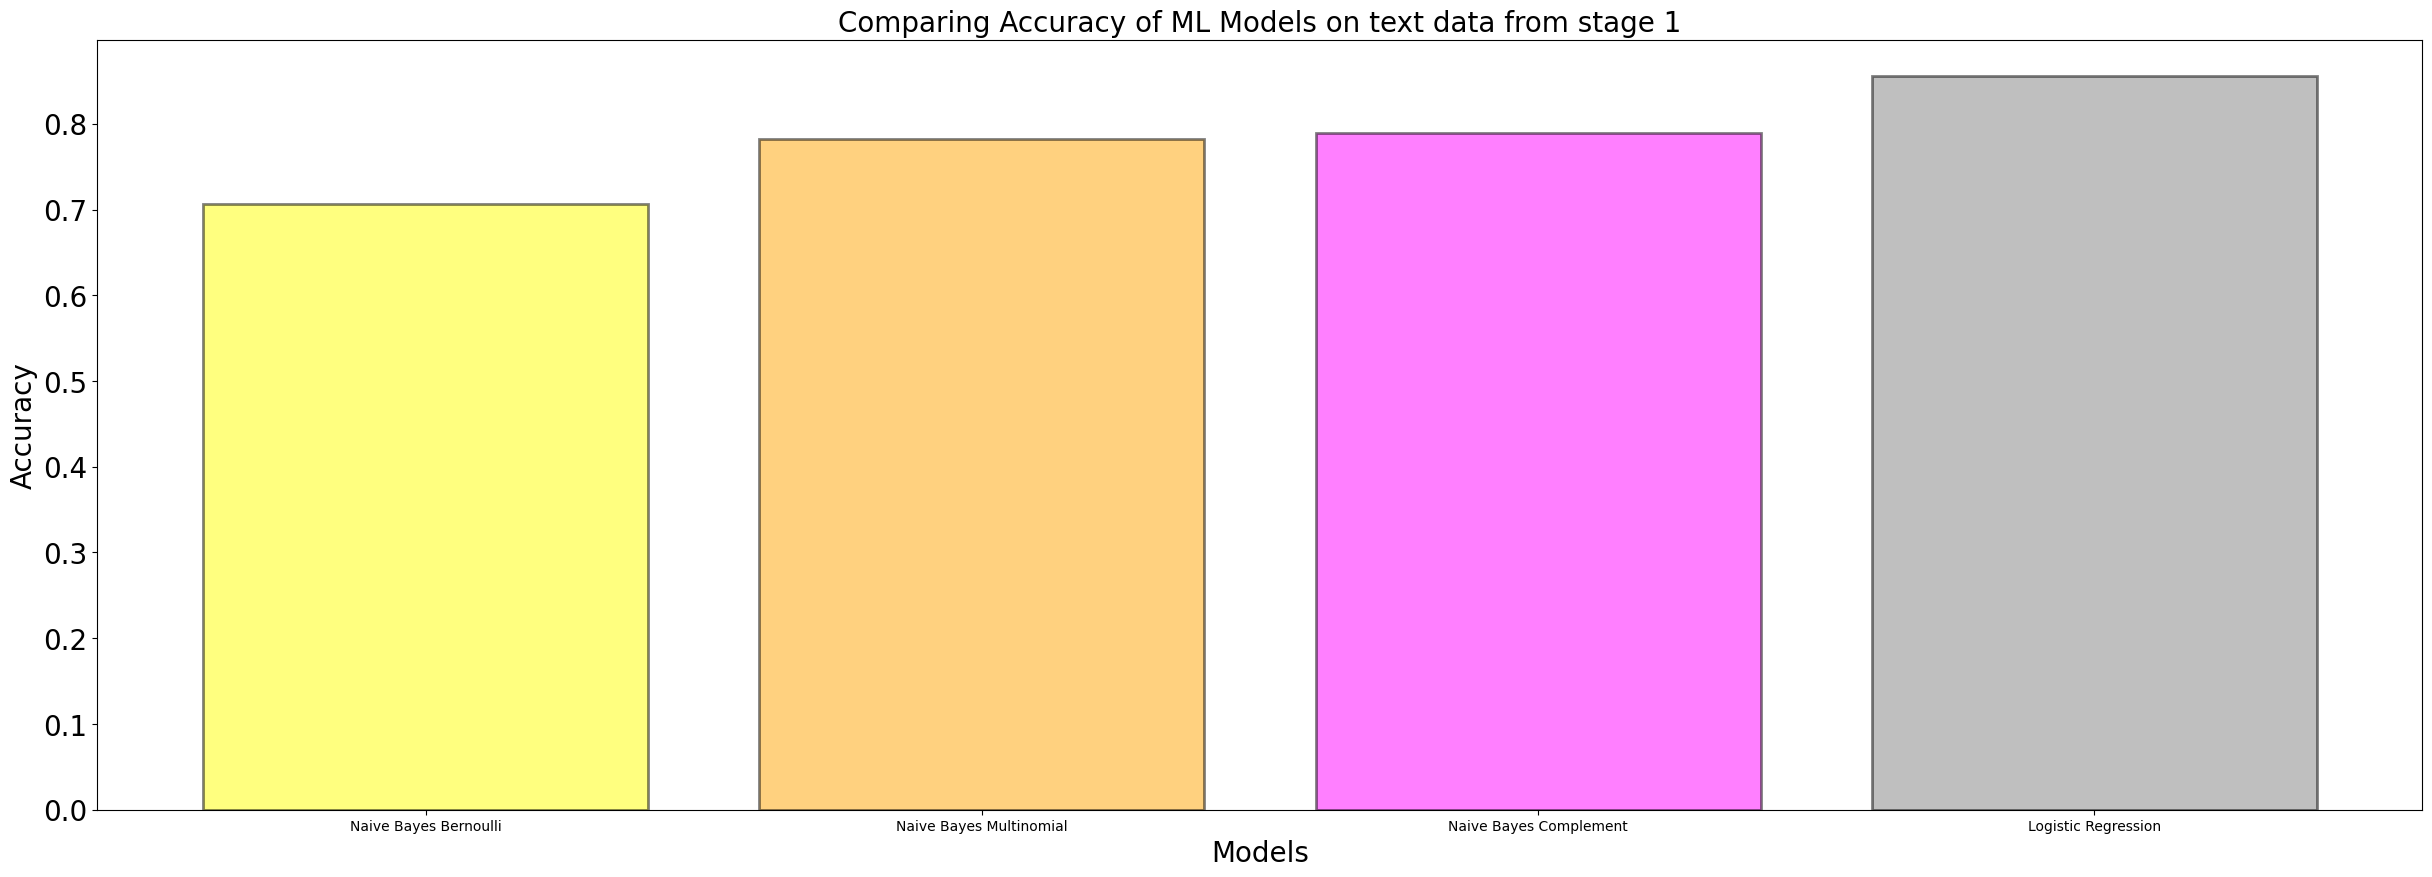

In [241]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(30,10))
plt.title('Comparing Accuracy of ML Models on text data from stage 1',fontsize=20)
colors=['yellow','orange','magenta', 'gray']
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels_acc_tfidf_stage1.keys(),labels_acc_tfidf_stage1.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5);



In [242]:
print("Naive Bayes Bernoulli f1 score tfidf:", f1NB_Bernoulli_tfidf)
print("Naive Bayes Multinomial f1 score tfidf:", f1NB_Multinomial_tfidf)
print("Naive Bayes Complement f1 score tfidf:", f1NB_Complement_tfidf)
print("Logistic Regression f1 score tfidf :", f1_LogReg_tfidf)


Naive Bayes Bernoulli f1 score tfidf: 0.697751873438801
Naive Bayes Multinomial f1 score tfidf: 0.7062882043212492
Naive Bayes Complement f1 score tfidf: 0.7260482548606231
Logistic Regression f1 score tfidf : 0.8364725592729856


In [243]:
#Creating the Dictionary with model name as key adn accuracy as key-value
labels_f1_tfidf_stage1={'Naive Bayes Bernoulli':f1NB_Bernoulli_tfidf,
        'Naive Bayes Multinomial':f1NB_Multinomial_tfidf,
        'Naive Bayes Complement':f1NB_Complement_tfidf,
        'Logistic Regression':f1_LogReg_tfidf}


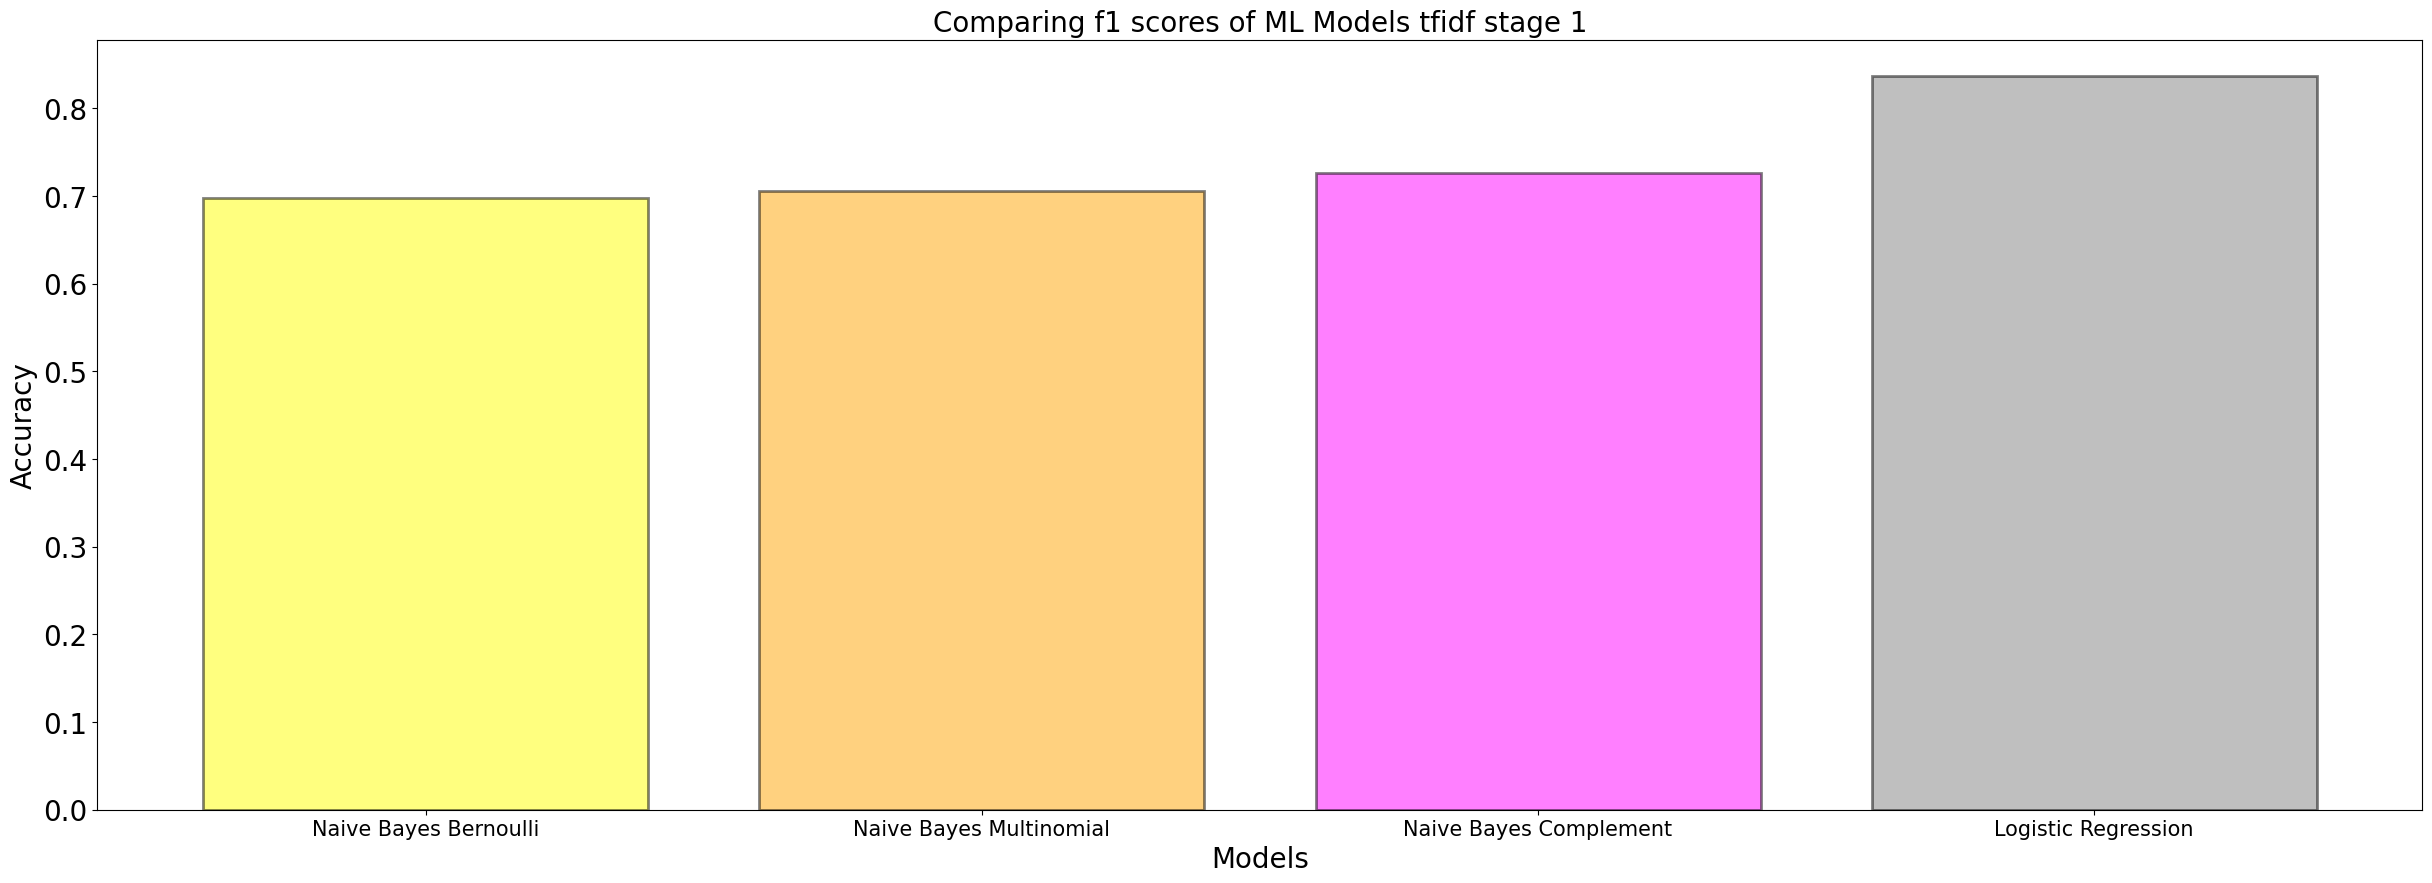

In [244]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(30,10))
plt.title('Comparing f1 scores of ML Models tfidf stage 1',fontsize=20)
colors=['yellow','orange','magenta', 'gray']
plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels_f1_tfidf_stage1.keys(),labels_f1_tfidf_stage1.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5);



######################################################################################################
# STAGE 2 - Advanced Analysis for 2 classes, title+content
######################################################################################################


In [245]:
##########################
# STAGE 2 - Advanced Analysis for 2 classes, title+content
##########################

# used dataset: strats_new.pkl (177.830 observations)


# TARGET: VARIABLE "LABEL"
# 0: articles from reliable sources; 61222 observations
# 1: articles from unreliable sources; 50058 observations



#########
# vectorize text (TF-IDF)
# used train/test sets:
# X_train_text_tfidf, X_test_text_tfidf, Y_train, Y_test 

#########



In [246]:
# HOW TO IMPROVE MODELS?


### 1: done in Stage 2
# Use more advanced models (boosting, etc.)


### 2: done in Stage 2
# # try to improve prediction for left bottom corner (false negatives)
# PARAMETER TUNING (e.g. num_boost_rounds)
# --> improves results


### 3: done in Stage 2
# use class_weights:    0:1, 1:1
# done for logistic regression, passive aggressive classifier, SGD

# LogReg, PassiveAggressive, SGD: as attributes (class_weight=class_weights)

# --> does slightly improve results 



# MODELS FOR STAGE 2 (Advanced Models):
# 1) Naive Bayes Bernoulli - identical to model before
# 2) Naive Bayes Multinomial - identical to model before
# 3) Naive Bayes Complement - identical to model before
# 4) Logistic Regression - identical to model before

# 5) Random Forest   
# 6) Passive Aggressive Classifier

# 7) LightGBM
# 8) XGBoost

# 9) Stochastic Gradient Descent (SGD)



# used train / test datasets:
# X_train_text_tfidf, X_test_text_tfidf, Y_train, Y_test (uppercase letters)


# CREATE LOGISTIC REGRESSION MODEL ON TFIDF TEXT DATA with class_weights


In [247]:
# define class_weights
class_weights = {0: 1, 1: 1}  

In [248]:
# Instantiate model 
from sklearn.linear_model import LogisticRegression

clf_LogReg_tfidf_CW = LogisticRegression(C=1.0, class_weight = class_weights)


In [249]:
# Fit the model on the training dataset
clf_LogReg_tfidf_CW.fit(X_train_text_tfidf, Y_train)


C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1, 1: 1})

In [250]:
y_pred_LogReg_tfidf_CW = clf_LogReg_tfidf_CW.predict(X_test_text_tfidf)


In [251]:
# get accuracy
accuracy_LogReg_tfidf_CW = clf_LogReg_tfidf_CW.score(X_test_text_tfidf, Y_test)
accuracy_LogReg_tfidf_CW

# 0.855

0.8552749820273184

In [252]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_LogReg_tfidf_CW = f1_score(Y_test, y_pred_LogReg_tfidf_CW)
f1_LogReg_tfidf_CW

# 0.836

0.8364725592729856

In [253]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_LogReg_tfidf_CW, rownames=["true"], colnames=["predict"])

# overall prediction is quite good
# best prediction: real news as real news (0:0), followed by fake news as fake news (1:1)
# lowest value for false negatives

predict,0.0,1.0
true,,
0.0,10797,1419
1.0,1802,8238


In [254]:
from sklearn.metrics import classification_report 

# get classification report
print("Logistic Regression tfidf with class weights classification report:\n ", classification_report (Y_test, y_pred_LogReg_tfidf_CW))


Logistic Regression tfidf with class weights classification report:
                precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     12216
         1.0       0.85      0.82      0.84     10040

    accuracy                           0.86     22256
   macro avg       0.86      0.85      0.85     22256
weighted avg       0.86      0.86      0.85     22256



In [256]:
# create confusion matrix
cf_matrix_LogReg_tfidf_CW = confusion_matrix(Y_test, y_pred_LogReg_tfidf_CW)
print(cf_matrix_LogReg_tfidf_CW)


[[10797  1419]
 [ 1802  8238]]


# RANDOM FOREST on text data tfidf
# takes 15 Minutes 


In [257]:
from sklearn.ensemble import RandomForestClassifier

In [258]:
# Instantiate the model
clf_rf_tfidf = RandomForestClassifier(n_jobs=-1)


In [259]:
# fit model
clf_rf_tfidf.fit(X_train_text_tfidf, Y_train)


RandomForestClassifier(n_jobs=-1)

In [260]:
#Predict on the test set 
y_pred_rf_tfidf = clf_rf_tfidf.predict(X_test_text_tfidf)


In [261]:
# get accuracy
accuracy_rf_tfidf = clf_rf_tfidf.score(X_test_text_tfidf, Y_test)
accuracy_rf_tfidf

# 0.79

0.7932242990654206

In [262]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_rf_tfidf = f1_score(Y_test, y_pred_rf_tfidf)
f1_rf_tfidf

# 0.72


0.7240014393666785

In [263]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_rf_tfidf, rownames=["true"], colnames=["predict"])

# overall prediction is quite good
# best prediction: real news as real news (0:0), followed by fake news as fake news (1:1)
# best result for false positives (real news being predicted as fake news)

predict,0.0,1.0
true,,
0.0,11618,598
1.0,4004,6036


In [264]:
from sklearn.metrics import classification_report 

# get classification report
print("Random Forest tfidf classification report:\n ", classification_report (Y_test, y_pred_rf_tfidf))


Random Forest tfidf classification report:
                precision    recall  f1-score   support

         0.0       0.74      0.95      0.83     12216
         1.0       0.91      0.60      0.72     10040

    accuracy                           0.79     22256
   macro avg       0.83      0.78      0.78     22256
weighted avg       0.82      0.79      0.78     22256



In [265]:
# create confusion matrix
cf_matrix_rf_tfidf = confusion_matrix(Y_test, y_pred_rf_tfidf)
print(cf_matrix_rf_tfidf)


[[11618   598]
 [ 4004  6036]]


# Passive Aggressive Classifier on text data tfidf


In [266]:
from sklearn.linear_model import PassiveAggressiveClassifier


In [267]:
# Initialize a PassiveAggressiveClassifier
pac_tfidf = PassiveAggressiveClassifier(max_iter=50)


In [268]:
# fit model
pac_tfidf.fit(X_train_text_tfidf, Y_train)


PassiveAggressiveClassifier(max_iter=50)

In [269]:
#Predict on the test set 
y_pred_PassAgg_tfidf = pac_tfidf.predict(X_test_text_tfidf)


In [270]:
# get accuracy
accuracy_PassAgg_tfidf= pac_tfidf.score(X_test_text_tfidf, Y_test)
accuracy_PassAgg_tfidf

# 0.825


0.8253504672897196

In [271]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_PassAgg_tfidf = f1_score(Y_test, y_pred_PassAgg_tfidf)
f1_PassAgg_tfidf

# 0.807

0.8062409650565775

In [272]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_PassAgg_tfidf, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no very good prediction for any case

predict,0.0,1.0
true,,
0.0,10282,1934
1.0,1953,8087


In [273]:
from sklearn.metrics import classification_report 

# get classification report
print("Passive Aggressive tfidf classification report:\n ", classification_report (Y_test, y_pred_PassAgg_tfidf))


Passive Aggressive tfidf classification report:
                precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     12216
         1.0       0.81      0.81      0.81     10040

    accuracy                           0.83     22256
   macro avg       0.82      0.82      0.82     22256
weighted avg       0.83      0.83      0.83     22256



In [274]:
# create confusion matrix
cf_matrix_PassAgg_tfidf = confusion_matrix(Y_test, y_pred_PassAgg_tfidf)
print(cf_matrix_PassAgg_tfidf)


[[10282  1934]
 [ 1953  8087]]


# Passive Aggressive Classifier on text data tfidf with class weights


In [275]:
from sklearn.linear_model import PassiveAggressiveClassifier


In [276]:
# use same class_weights as for Logistic Regression
class_weights = {0: 1, 1: 1} 


In [277]:
# Initialize a PassiveAggressiveClassifier
pac_tfidf_CW = PassiveAggressiveClassifier(max_iter=50, class_weight=class_weights)


In [278]:
# fit model
pac_tfidf_CW.fit(X_train_text_tfidf, Y_train)


PassiveAggressiveClassifier(class_weight={0: 1, 1: 1}, max_iter=50)

In [279]:
#Predict on the test set 
y_pred_PassAgg_tfidf_CW = pac_tfidf_CW.predict(X_test_text_tfidf)


In [280]:
# get accuracy
accuracy_PassAgg_tfidf_CW = pac_tfidf_CW.score(X_test_text_tfidf, Y_test)
accuracy_PassAgg_tfidf_CW

# 0.825


0.825215672178289

In [281]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_PassAgg_tfidf_CW = f1_score(Y_test, y_pred_PassAgg_tfidf_CW)
f1_PassAgg_tfidf_CW

# 0.806

0.8059656823623303

In [282]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_PassAgg_tfidf_CW, rownames=["true"], colnames=["predict"])

# overall prediction is quite good, similar to prediction without class_weights

predict,0.0,1.0
true,,
0.0,10287,1929
1.0,1961,8079


In [283]:
from sklearn.metrics import classification_report 

# get classification report
print("Passive Aggressive tfidf with class weights classification report:\n ", classification_report (Y_test, y_pred_PassAgg_tfidf_CW))


Passive Aggressive tfidf with class weights classification report:
                precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     12216
         1.0       0.81      0.80      0.81     10040

    accuracy                           0.83     22256
   macro avg       0.82      0.82      0.82     22256
weighted avg       0.83      0.83      0.83     22256



In [284]:
# create confusion matrix
cf_matrix_PassAgg_tfidf_CW = confusion_matrix(Y_test, y_pred_PassAgg_tfidf_CW)
print(cf_matrix_PassAgg_tfidf_CW)


[[10287  1929]
 [ 1961  8079]]


# LightGBM on text data tfidf - 100 rounds
# Takes 4 Minutes

In [285]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [286]:
# Create a LightGBM dataset for training

LightGMB_train_data_text_tfidf = lgb.Dataset(X_train_text_tfidf, label=Y_train)

# Set the hyperparameters for the LightGBM model
paramsLightGBM_tfidf = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # Set the appropriate objective for your classification task
    'metric': 'binary_logloss',  # Set the appropriate metric for evaluation
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


In [287]:
# Train the LightGBM model
clf_LightGBM_tfidf_100 = lgb.train(paramsLightGBM_tfidf, LightGMB_train_data_text_tfidf, num_boost_round=100)

# takes 4 minutes


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 19.781253 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [288]:
# Make predictions on the test set
y_pred_LightGBM_tfidf_100 = clf_LightGBM_tfidf_100.predict(X_test_text_tfidf)
y_pred_LightGBM_tfidf_100_binary = [round(pred) for pred in y_pred_LightGBM_tfidf_100]  # Convert probability to binary predictions


In [289]:
# Evaluate the model with accuracy
accuracy_LightGBM_tfidf_100 = accuracy_score(Y_test, y_pred_LightGBM_tfidf_100_binary)
print("Accuracy LightGBM tfidf 100:", accuracy_LightGBM_tfidf_100)

# 0.82


Accuracy LightGBM tfidf 100: 0.8231937455068297


In [290]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_LightGBM_tfidf_100 = f1_score(Y_test, y_pred_LightGBM_tfidf_100_binary)
f1_LightGBM_tfidf_100

# 0.788


0.7883839741866093

In [291]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_LightGBM_tfidf_100_binary, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no super good result for any of the cases

predict,0,1
true,,
0.0,10991,1225
1.0,2710,7330


In [292]:
# Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

cf_matrix_LightGBM_tfidf_100 = confusion_matrix(Y_test, y_pred_LightGBM_tfidf_100_binary)

print("Confusion Matrix:\n",  cf_matrix_LightGBM_tfidf_100)


Confusion Matrix:
 [[10991  1225]
 [ 2710  7330]]


In [293]:
# Evaluate model with classification report
from sklearn.metrics import classification_report 

print("LightGBM 100 tfidf classification report:\n", classification_report (Y_test, y_pred_LightGBM_tfidf_100_binary))
                                                                                                                                       

LightGBM 100 tfidf classification report:
               precision    recall  f1-score   support

         0.0       0.80      0.90      0.85     12216
         1.0       0.86      0.73      0.79     10040

    accuracy                           0.82     22256
   macro avg       0.83      0.81      0.82     22256
weighted avg       0.83      0.82      0.82     22256



# LightGBM on text data tfidf - 200 rounds
# Takes 6 minutes

In [294]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [295]:
# Create a LightGBM dataset for training

LightGMB_train_data_text_tfidf = lgb.Dataset(X_train_text_tfidf, label=Y_train)

# Set the hyperparameters for the LightGBM model
paramsLightGBM_tfidf = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # Set the appropriate objective for your classification task
    'metric': 'binary_logloss',  # Set the appropriate metric for evaluation
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


In [296]:
# Train the LightGBM model
clf_LightGBM_tfidf_200 = lgb.train(paramsLightGBM_tfidf, LightGMB_train_data_text_tfidf, num_boost_round=200)

# takes 6 minutes


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 18.482569 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [297]:
# Make predictions on the test set
y_pred_LightGBM_tfidf_200 = clf_LightGBM_tfidf_200.predict(X_test_text_tfidf)
y_pred_LightGBM_tfidf_200_binary = [round(pred) for pred in y_pred_LightGBM_tfidf_200]  
# Convert probability to binary predictions


In [298]:
# Evaluate the model with accuracy
accuracy_LightGBM_tfidf_200 = accuracy_score(Y_test, y_pred_LightGBM_tfidf_200_binary)
print("Accuracy LightGBM tfidf 200:", accuracy_LightGBM_tfidf_200)

# 0.846

Accuracy LightGBM tfidf 200: 0.8466480948957584


In [299]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_LightGBM_tfidf_200 = f1_score(Y_test, y_pred_LightGBM_tfidf_200_binary)
f1_LightGBM_tfidf_200

# 0.82


0.8209244976126763

In [300]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_LightGBM_tfidf_200_binary, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no super good result for any of the cases

predict,0,1
true,,
0.0,11020,1196
1.0,2217,7823


In [301]:
# Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

cf_matrix_LightGBM_tfidf_200 = confusion_matrix(Y_test, y_pred_LightGBM_tfidf_200_binary)

print("Confusion Matrix:\n",  cf_matrix_LightGBM_tfidf_200)


Confusion Matrix:
 [[11020  1196]
 [ 2217  7823]]


In [302]:
# Evaluate model with classification report
from sklearn.metrics import classification_report 

print("LightGBM tfidf 200 classification report:\n", classification_report (Y_test, y_pred_LightGBM_tfidf_200_binary))


LightGBM tfidf 200 classification report:
               precision    recall  f1-score   support

         0.0       0.83      0.90      0.87     12216
         1.0       0.87      0.78      0.82     10040

    accuracy                           0.85     22256
   macro avg       0.85      0.84      0.84     22256
weighted avg       0.85      0.85      0.85     22256



# LightGBM on text data tfidf - 500 rounds
# Takes 14 minutes

In [45]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
# Create a LightGBM dataset for training

LightGMB_train_data_text_tfidf = lgb.Dataset(X_train_text_tfidf, label=Y_train)

# Set the hyperparameters for the LightGBM model
paramsLightGBM_tfidf = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # Set the appropriate objective for your classification task
    'metric': 'binary_logloss',  # Set the appropriate metric for evaluation
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


In [47]:
# Train the LightGBM model
clf_LightGBM_tfidf_500 = lgb.train(paramsLightGBM_tfidf, LightGMB_train_data_text_tfidf, num_boost_round=500)

# takes 14 minutes


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 20.596592 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [48]:
# Make predictions on the test set
y_pred_LightGBM_tfidf_500 = clf_LightGBM_tfidf_500.predict(X_test_text_tfidf)
y_pred_LightGBM_tfidf_500_binary = [round(pred) for pred in y_pred_LightGBM_tfidf_500]  
# Convert probability to binary predictions


In [49]:
# Evaluate the model with accuracy
accuracy_LightGBM_tfidf_500 = accuracy_score(Y_test, y_pred_LightGBM_tfidf_500_binary)
print("Accuracy LightGBM tfidf 500:", accuracy_LightGBM_tfidf_500)

# 0.87

Accuracy LightGBM tfidf 500: 0.8708662832494608


In [50]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_LightGBM_tfidf_500 = f1_score(Y_test, y_pred_LightGBM_tfidf_500_binary)
f1_LightGBM_tfidf_500

# 0.85


0.851947249124253

In [51]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_LightGBM_tfidf_500_binary, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no super good result for any of the cases

predict,0,1
true,,
0.0,11113,1103
1.0,1771,8269


In [52]:
# Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

cf_matrix_LightGBM_tfidf_500 = confusion_matrix(Y_test, y_pred_LightGBM_tfidf_500_binary)

print("Confusion Matrix:\n",  cf_matrix_LightGBM_tfidf_500)

Confusion Matrix:
 [[11113  1103]
 [ 1771  8269]]


In [53]:
# Evaluate model with classification report
from sklearn.metrics import classification_report 

print("LightGBM tfidf 500 classification report:\n", classification_report (Y_test, y_pred_LightGBM_tfidf_500_binary))


LightGBM tfidf 500 classification report:
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.89     12216
         1.0       0.88      0.82      0.85     10040

    accuracy                           0.87     22256
   macro avg       0.87      0.87      0.87     22256
weighted avg       0.87      0.87      0.87     22256



Confusion Matrix for LightGBM model with 500 boosting rounds on tfidf data


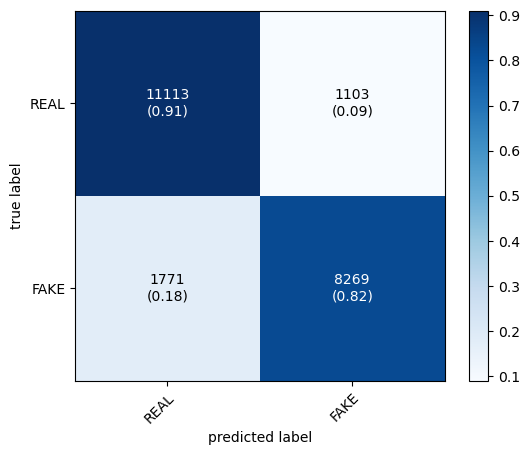

In [54]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for LightGBM model with 500 boosting rounds on tfidf data")
plot_confusion_matrix(conf_mat = cf_matrix_LightGBM_tfidf_500,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();

# SAVE LightGBM 500 bossting rounds MODEL TFIDF

In [1]:
from joblib import dump, load

In [ ]:
dump(clf_LightGBM_tfidf_500, "model_LightGBM500_tfidf.joblib")

# XGBoost on text data tfidf - 50 rounds

In [314]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a DMatrix for training and testing data
dtrain_tfidf = xgb.DMatrix(X_train_text_tfidf, label=Y_train)
dtest_tfidf = xgb.DMatrix(X_test_text_tfidf, label=Y_test)


In [315]:
# Set the hyperparameters for XGBoost
params_XGBoost_tfidf = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}


In [316]:
# Train the model
XGBoostmodel_tfidf_50 = xgb.train(params_XGBoost_tfidf, dtrain_tfidf, num_boost_round=50)

# Takes 4 Minutes


In [317]:
# Make predictions on the test data
y_pred_XGBoost_tfidf_50 = XGBoostmodel_tfidf_50.predict(dtest_tfidf)
y_pred_XGBoost_tfidf_50_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_XGBoost_tfidf_50]


In [318]:
# Evaluate the model with accuracy
accuracy_XGBoost_tfidf_50 = accuracy_score(Y_test, y_pred_XGBoost_tfidf_50_binary)
accuracy_XGBoost_tfidf_50

# 0.76

0.7622214234363767

In [319]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_XGBoost_tfidf_50 = f1_score(Y_test, y_pred_XGBoost_tfidf_50_binary)
f1_XGBoost_tfidf_50

# 0.68

0.684511744366281

In [320]:
# Create crosstab
pd.crosstab(Y_test, y_pred_XGBoost_tfidf_50_binary, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no super good result for any of the cases

predict,0,1
true,,
0.0,11223,993
1.0,4299,5741


In [321]:
# create confusion matrix
cf_matrix_XGBoost_tfidf_50 = confusion_matrix(Y_test, y_pred_XGBoost_tfidf_50_binary)
print(cf_matrix_XGBoost_tfidf_50)

[[11223   993]
 [ 4299  5741]]


# XGBoost on text data tfidf - 200 rounds
# Takes 8 Minutes

In [322]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a DMatrix for training and testing data
dtrain_tfidf = xgb.DMatrix(X_train_text_tfidf, label=Y_train)
dtest_tfidf = xgb.DMatrix(X_test_text_tfidf, label=Y_test)


In [323]:
# Set the hyperparameters for XGBoost
params_XGBoost_tfidf = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}


In [324]:
# Train the model
XGBoostmodel_tfidf_200 = xgb.train(params_XGBoost_tfidf, dtrain_tfidf, num_boost_round=200)

# Takes 8 Minutes


In [325]:
# Make predictions on the test data
y_pred_XGBoost_tfidf_200 = XGBoostmodel_tfidf_200.predict(dtest_tfidf)
y_pred_XGBoost_tfidf_200_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_XGBoost_tfidf_200]


In [326]:
# Evaluate the model with accuracy
accuracy_XGBoost_tfidf_200 = accuracy_score(Y_test, y_pred_XGBoost_tfidf_200_binary)
accuracy_XGBoost_tfidf_200

# 0.815

0.8151509705248023

In [327]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_XGBoost_tfidf_200 = f1_score(Y_test, y_pred_XGBoost_tfidf_200_binary)
f1_XGBoost_tfidf_200

# 0.77

0.7745506356861026

In [328]:
# Create crosstab
pd.crosstab(Y_test, y_pred_XGBoost_tfidf_200_binary, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no super good result for any of the cases

predict,0,1
true,,
0.0,11075,1141
1.0,2973,7067


In [329]:
# create confusion matrix
cf_matrix_XGBoost_tfidf_200 = confusion_matrix(Y_test, y_pred_XGBoost_tfidf_200_binary)
print(cf_matrix_XGBoost_tfidf_200)

[[11075  1141]
 [ 2973  7067]]


# XGBoost on text data tfidf - 500 rounds
# Takes 20 Minutes

In [330]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a DMatrix for training and testing data
dtrain_tfidf = xgb.DMatrix(X_train_text_tfidf, label=Y_train)
dtest_tfidf = xgb.DMatrix(X_test_text_tfidf, label=Y_test)


In [331]:
# Set the hyperparameters for XGBoost
params_XGBoost_tfidf = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}


In [332]:
# Train the model
XGBoostmodel_tfidf_500 = xgb.train(params_XGBoost_tfidf, dtrain_tfidf, num_boost_round=500)

# Takes 20 Minutes


In [333]:
# Make predictions on the test data
y_pred_XGBoost_tfidf_500 = XGBoostmodel_tfidf_500.predict(dtest_tfidf)
y_pred_XGBoost_tfidf_500_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_XGBoost_tfidf_500]


In [334]:
# Evaluate the model with accuracy
accuracy_XGBoost_tfidf_500 = accuracy_score(Y_test, y_pred_XGBoost_tfidf_500_binary)
accuracy_XGBoost_tfidf_500

# 0.84

0.8402677929547089

In [335]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_XGBoost_tfidf_500 = f1_score(Y_test, y_pred_XGBoost_tfidf_500_binary)
f1_XGBoost_tfidf_500

# 0.81

0.8106121144318363

In [336]:
# Create crosstab
pd.crosstab(Y_test, y_pred_XGBoost_tfidf_500_binary, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no super good result for any of the cases

predict,0,1
true,,
0.0,11093,1123
1.0,2432,7608


In [337]:
# create confusion matrix
cf_matrix_XGBoost_tfidf_500 = confusion_matrix(Y_test, y_pred_XGBoost_tfidf_500_binary)
print(cf_matrix_XGBoost_tfidf_500)

[[11093  1123]
 [ 2432  7608]]


# Stochastic Gradient Descent (SGD) on text data tfidf

In [338]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Create an SGD classifier
sgd_tfidf = SGDClassifier()

In [339]:
# Train the SGD model
sgd_tfidf.fit(X_train_text_tfidf, Y_train)


SGDClassifier()

In [340]:
# Make predictions on the test set
y_pred_sgd_tfidf = sgd_tfidf.predict(X_test_text_tfidf)

In [341]:
# Calculate accuracy
accuracy_sgd_tfidf = accuracy_score(Y_test, y_pred_sgd_tfidf)
accuracy_sgd_tfidf

# 0.84

0.8421998562185478

In [342]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_sgd_tfidf = f1_score(Y_test, y_pred_sgd_tfidf)
f1_sgd_tfidf

# 0.819

0.8199159060609168

In [343]:
# Create crosstab
pd.crosstab(Y_test, y_pred_sgd_tfidf, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no super good result for any of the cases

predict,0.0,1.0
true,,
0.0,10749,1467
1.0,2045,7995


In [344]:
from sklearn.metrics import classification_report 

# get classification report
print("SGD tfidf classification report:\n ", classification_report (Y_test, y_pred_sgd_tfidf))


SGD tfidf classification report:
                precision    recall  f1-score   support

         0.0       0.84      0.88      0.86     12216
         1.0       0.84      0.80      0.82     10040

    accuracy                           0.84     22256
   macro avg       0.84      0.84      0.84     22256
weighted avg       0.84      0.84      0.84     22256



In [345]:
# create confusion matrix
cf_matrix_sgd_tfidf = confusion_matrix(Y_test, y_pred_sgd_tfidf)
print(cf_matrix_sgd_tfidf)

[[10749  1467]
 [ 2045  7995]]


# Stochastic Gradient Descent (SGD) on text data tfidf with class weight


In [346]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Create an SGD classifier
sgd_tfidf_CW = SGDClassifier(class_weight = class_weights)

In [347]:
# Train the SGD model
sgd_tfidf_CW.fit(X_train_text_tfidf, Y_train)


SGDClassifier(class_weight={0: 1, 1: 1})

In [348]:
# Make predictions on the test set
y_pred_sgd_tfidf_CW = sgd_tfidf_CW.predict(X_test_text_tfidf)

In [350]:
# Calculate accuracy
accuracy_sgd_tfidf_CW = accuracy_score(Y_test, y_pred_sgd_tfidf_CW)
accuracy_sgd_tfidf_CW

# 0.842

0.8426491732566499

In [352]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_sgd_tfidf_CW = f1_score(Y_test, y_pred_sgd_tfidf_CW)
f1_sgd_tfidf_CW

# 0.82

0.8205391001332377

In [353]:
# Create crosstab
pd.crosstab(Y_test, y_pred_sgd_tfidf_CW, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no super good result for any of the cases

predict,0.0,1.0
true,,
0.0,10748,1468
1.0,2034,8006


In [354]:
from sklearn.metrics import classification_report 

# get classification report
print("SGD tfidf with class weight classification report:\n ", classification_report (Y_test, y_pred_sgd_tfidf_CW))


SGD tfidf with class weight classification report:
                precision    recall  f1-score   support

         0.0       0.84      0.88      0.86     12216
         1.0       0.85      0.80      0.82     10040

    accuracy                           0.84     22256
   macro avg       0.84      0.84      0.84     22256
weighted avg       0.84      0.84      0.84     22256



In [355]:
# create confusion matrix
cf_matrix_sgd_tfidf_CW = confusion_matrix(Y_test, y_pred_sgd_tfidf_CW)
print(cf_matrix_sgd_tfidf_CW)

[[10748  1468]
 [ 2034  8006]]


# COMPARE MODELS ON TEXT DATA ONLY TFIDF


In [356]:
# MODELS FOR STAGE 2 (Advanced Models):
# 1) Naive Bayes Bernoulli
# 2) Naive Bayes Multinomial
# 3) Naive Bayes Complement
# 4) Logistic Regression

# 5) Random Forest   
# 6) Passive Aggressive Classifier 

# 7) LightGBM
# 8) CatBoost
# 9) XGBoost

# 10) Stochastic Gradient Descent

## SELECTED TFIDF MODELS FOR COMPARISON WITH COUNTVECTORIZER RESULTS

In [357]:
print("Logistic Regression accuracy score tfidf:", accuracy_LogReg_tfidf)
print("Random Forest accuracy score tfidf:", accuracy_rf_tfidf)
print("Passive Agressive accuracy score tfidf:", accuracy_PassAgg_tfidf)
print("LightGBM accuracy score tfidf 500 rounds:", accuracy_LightGBM_tfidf_500)
print("Stochastic Gradient Descent accuracy score tfidf:", accuracy_sgd_tfidf)

Logistic Regression accuracy score tfidf: 0.8552749820273184
Random Forest accuracy score tfidf: 0.7932242990654206
Passive Agressive accuracy score tfidf: 0.8253504672897196
LightGBM accuracy score tfidf 500 rounds: 0.8708662832494608
Stochastic Gradient Descent accuracy score tfidf: 0.8421998562185478


In [358]:
print("Logistic Regression accuracy score tfidf:", f1_LogReg_tfidf)
print("Random Forest accuracy score tfidf:", f1_rf_tfidf)
print("Passive Agressive accuracy score tfidf:", f1_PassAgg_tfidf)
print("LightGBM accuracy score tfidf 500 rounds:", f1_LightGBM_tfidf_500)
print("Stochastic Gradient Descent accuracy score tfidf:", f1_sgd_tfidf)

Logistic Regression accuracy score tfidf: 0.8364725592729856
Random Forest accuracy score tfidf: 0.7240014393666785
Passive Agressive accuracy score tfidf: 0.8062409650565775
LightGBM accuracy score tfidf 500 rounds: 0.851947249124253
Stochastic Gradient Descent accuracy score tfidf: 0.8199159060609168


## PLOT: Accuracy of selected models tfidf

In [359]:
#Creating the Dictionary with model name as key and accuracy as key-value
acc_labels_tfidf_sel={'Logistic Regression':accuracy_LogReg_tfidf,
        'Random Forest':accuracy_rf_tfidf,
        'Passive Aggressive':accuracy_PassAgg_tfidf,
        'LightBM 500 rounds':accuracy_LightGBM_tfidf_500,
        'Stoachstic Gradient Descent':accuracy_sgd_tfidf} 
        

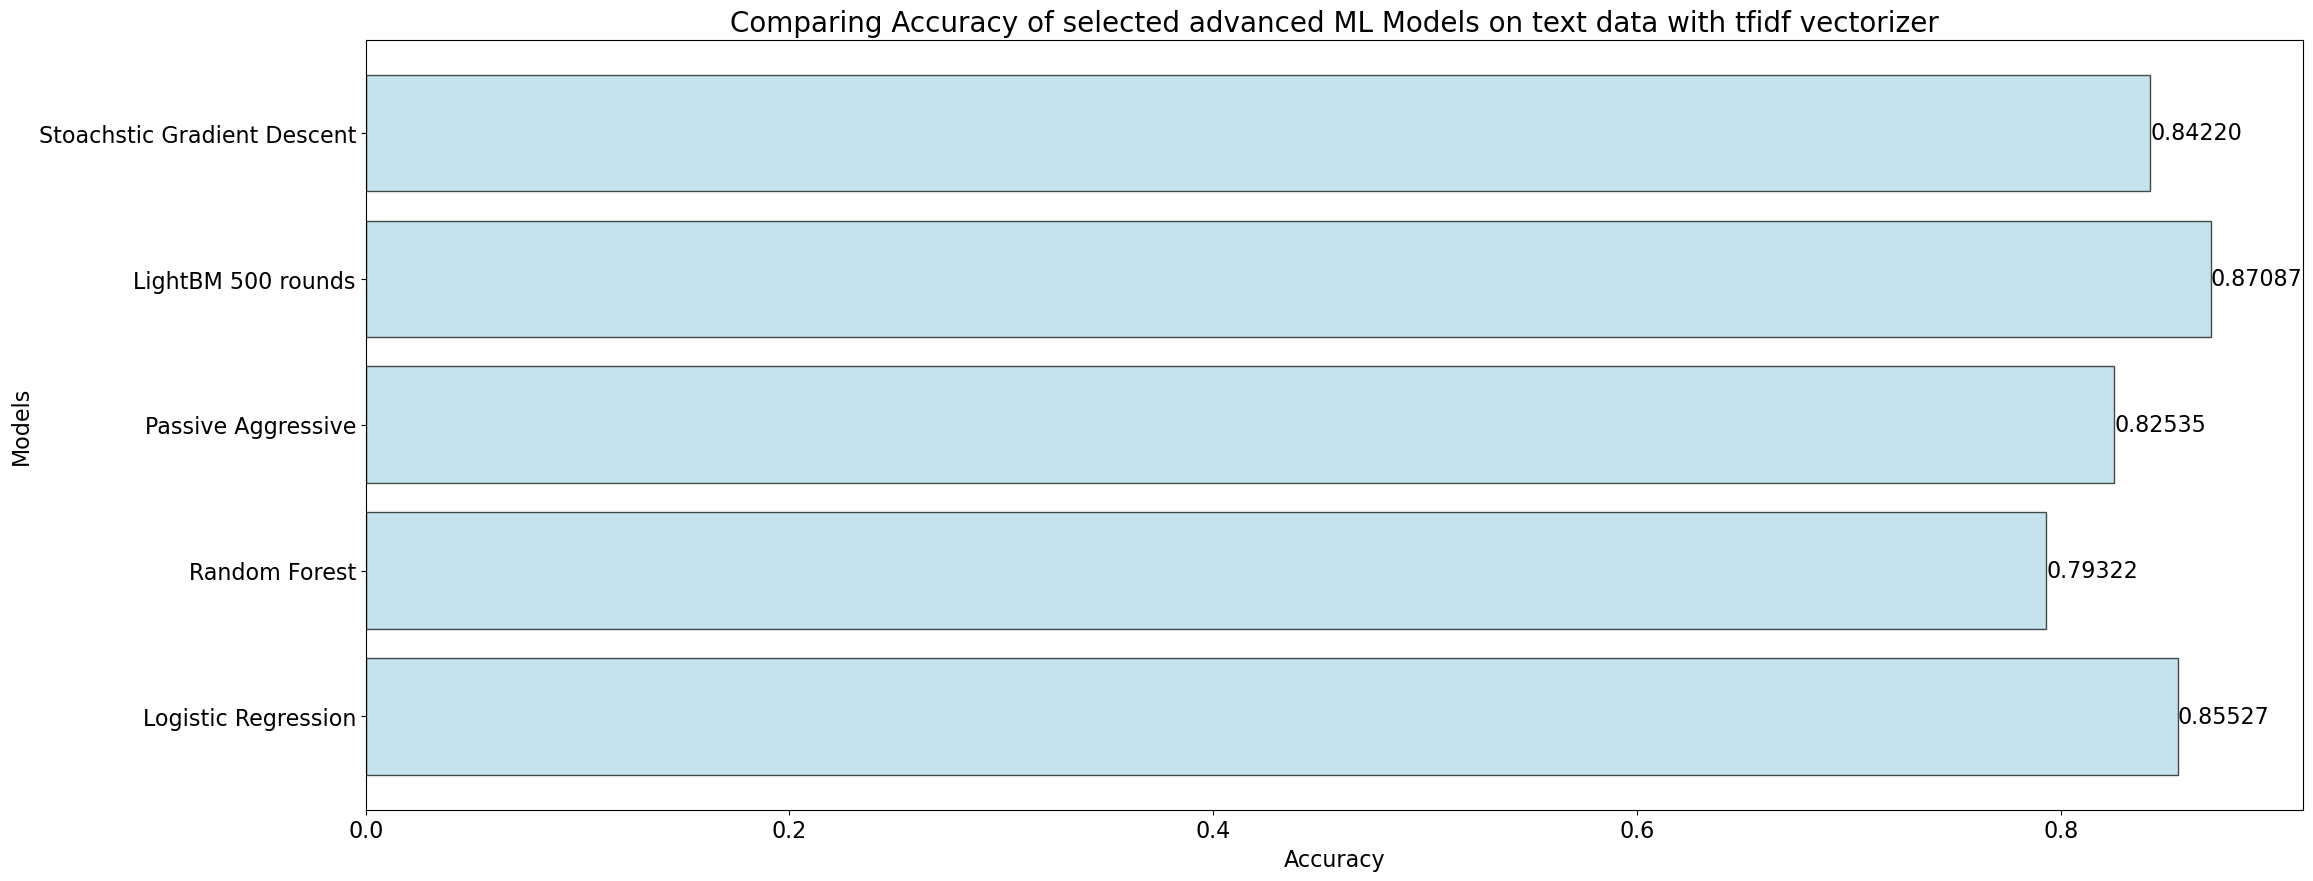

In [360]:
# Data for the chart
acc_labels_sel_tfidf = list(acc_labels_tfidf_sel.keys())
acc_values_sel_tfidf = list(acc_labels_tfidf_sel.values())

# Creating the chart
plt.figure(figsize=(25, 10))
plt.title('Comparing Accuracy of selected advanced ML Models on text data with tfidf vectorizer', fontsize=20)
plt.xlabel('Accuracy', fontsize=16)
plt.ylabel('Models', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)# Increase the plot width to accommodate the values

plt.barh(acc_labels_sel_tfidf, acc_values_sel_tfidf, color='lightblue', edgecolor='black', linewidth=1, alpha=0.7)

# Displaying values at the end of the bars
for i, value in enumerate(acc_values_sel_tfidf):
    plt.text(value, i, f'{value:.5f}', fontsize=16, va='center')

plt.show();

## PLOT: f1 score of selected models tfidf

In [361]:
#Creating the Dictionary with model name as key and accuracy as key-value
f1_labels_tfidf_sel={'Logistic Regression':f1_LogReg_tfidf,
        'Random Forest':f1_rf_tfidf,
        'Passive Aggressive':f1_PassAgg_tfidf,
        'LightBM 500 rounds':f1_LightGBM_tfidf_500,
        'Stoachstic Gradient Descent':f1_sgd_tfidf} 
        

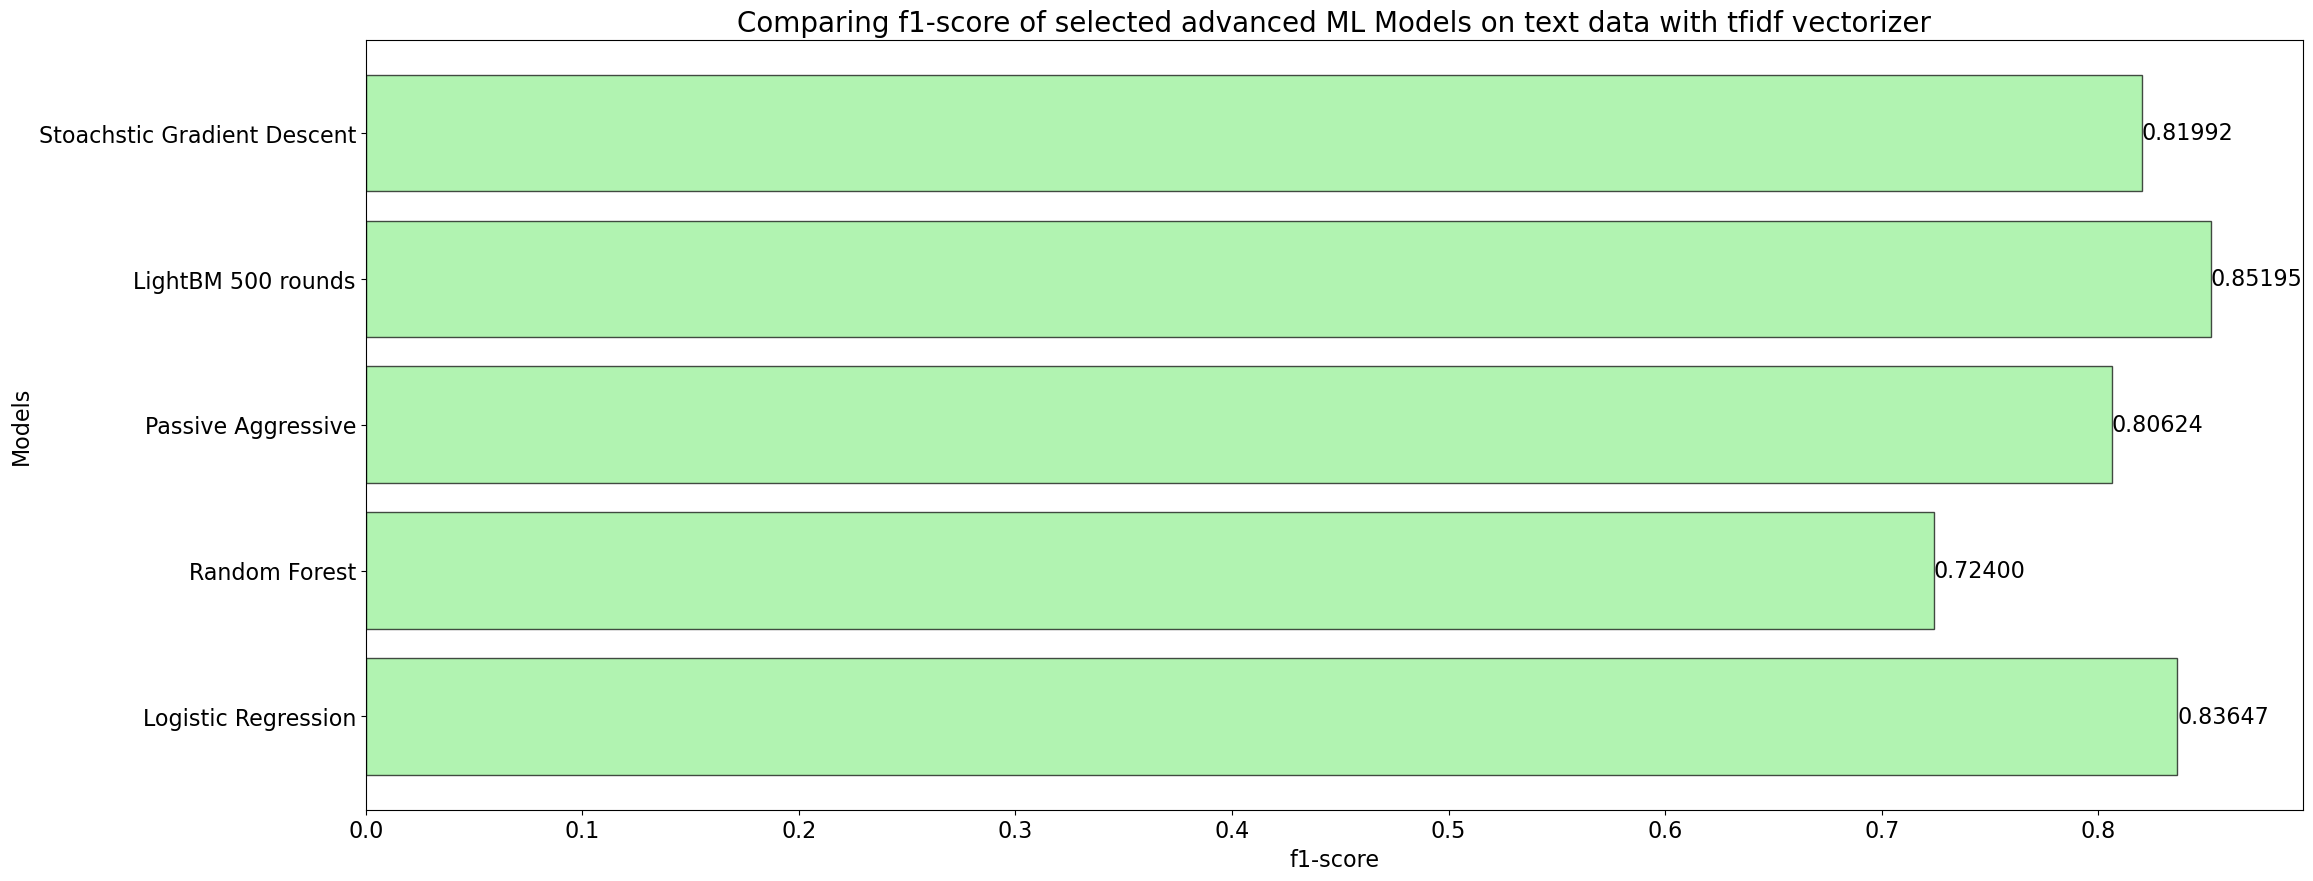

In [362]:
# Data for the chart
f1_labels_sel_tfidf = list(f1_labels_tfidf_sel.keys())
f1_values_sel_tfidf = list(f1_labels_tfidf_sel.values())

# Creating the chart
plt.figure(figsize=(25, 10))
plt.title('Comparing f1-score of selected advanced ML Models on text data with tfidf vectorizer', fontsize=20)
plt.xlabel('f1-score', fontsize=16)
plt.ylabel('Models', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)# Increase the plot width to accommodate the values

plt.barh(f1_labels_sel_tfidf, f1_values_sel_tfidf, color='lightgreen', edgecolor='black', linewidth=1, alpha=0.7)

# Displaying values at the end of the bars
for i, value in enumerate(f1_values_sel_tfidf):
    plt.text(value, i, f'{value:.5f}', fontsize=16, va='center')

plt.show();


## ALL MODELS TFIDF

In [363]:
print("Naive Bayes Bernoulli accuracy score tfidf:", accuracy_NB_Bern_tfidf)
print("Naive Bayes Multinomial accuracy score tfidf:", accuracy_NB_Mult_tfidf)
print("Naive Bayes Complement accuracy score tfidf :", accuracy_NB_Compl_tfidf)
print("Logistic Regression accuracy score tfidf:", accuracy_LogReg_tfidf)
print("Logistic Regression accuracy score tfidf with class weights 0:1, 1:1 :", accuracy_LogReg_tfidf_CW) 

print("Random Forest accuracy score df12 tfidf:", accuracy_rf_tfidf)
print("Passive Agressive accuracy score df12 tfidf:", accuracy_PassAgg_tfidf)
print("Passive Agressive accuracy score df12 tfidf with class weights 0:1, 1:1:", accuracy_PassAgg_tfidf_CW)

print("LightGBM accuracy score tfidf 100 rounds:", accuracy_LightGBM_tfidf_100)
print("LightGBM accuracy score tfidf 200 rounds:", accuracy_LightGBM_tfidf_200)
print("LightGBM accuracy score tfidf 500 rounds:", accuracy_LightGBM_tfidf_500)

print("XGBoost accuracy score tfidf 50 rounds:", accuracy_XGBoost_tfidf_50)
print("XGBoost accuracy score tfidf 200 rounds:", accuracy_XGBoost_tfidf_200)
print("XGBoost accuracy score tfidf 500 rounds:", accuracy_XGBoost_tfidf_500)

print("Stochastic Gradient Descent accuracy score tfidf:", accuracy_sgd_tfidf)
print("Stochastic Gradient Descent accuracy score tfidf class weights 0:1, 1:1 :", accuracy_sgd_tfidf_CW)

Naive Bayes Bernoulli accuracy score tfidf: 0.7064162473040978
Naive Bayes Multinomial accuracy score tfidf: 0.7819464414090582
Naive Bayes Complement accuracy score tfidf : 0.7898094895758447
Logistic Regression accuracy score tfidf: 0.8552749820273184
Logistic Regression accuracy score tfidf with class weights 0:1, 1:1 : 0.8552749820273184
Random Forest accuracy score df12 tfidf: 0.7932242990654206
Passive Agressive accuracy score df12 tfidf: 0.8253504672897196
Passive Agressive accuracy score df12 tfidf with class weights 0:1, 1:1: 0.825215672178289
LightGBM accuracy score tfidf 100 rounds: 0.8231937455068297
LightGBM accuracy score tfidf 200 rounds: 0.8466480948957584
LightGBM accuracy score tfidf 500 rounds: 0.8708662832494608
XGBoost accuracy score tfidf 50 rounds: 0.7622214234363767
XGBoost accuracy score tfidf 200 rounds: 0.8151509705248023
XGBoost accuracy score tfidf 500 rounds: 0.8402677929547089
Stochastic Gradient Descent accuracy score tfidf: 0.8421998562185478
Stochastic

In [364]:
print("Naive Bayes Bernoulli f1 score tfidf:", f1NB_Bernoulli_tfidf)
print("Naive Bayes Multinomial f1 score tfidf:", f1NB_Multinomial_tfidf)
print("Naive Bayes Complement f1 score tfidf :", f1NB_Complement_tfidf)
print("Logistic Regression f1 score tfidf:", f1_LogReg_tfidf)
print("Logistic Regression f1 score tfidf with class weights 0:1, 1:1 :", f1_LogReg_tfidf_CW) 

print("Random Forest f1 score df12 tfidf:", f1_rf_tfidf)
print("Passive Agressive f1 score df12 tfidf:", f1_PassAgg_tfidf)
print("Passive Agressive f1 score df12 tfidf with class weights 0:1, 1:1:", f1_PassAgg_tfidf_CW)

print("LightGBM f1 score tfidf 100 rounds:", f1_LightGBM_tfidf_100)
print("LightGBM f1 score tfidf 200 rounds:", f1_LightGBM_tfidf_200)
print("LightGBM f1 score tfidf 500 rounds:", f1_LightGBM_tfidf_500)

print("XGBoost f1 score tfidf 50 rounds:", f1_XGBoost_tfidf_50)
print("XGBoost f1 score tfidf 200 rounds:", f1_XGBoost_tfidf_200)
print("XGBoost f1 score tfidf 500 rounds:", f1_XGBoost_tfidf_500)

print("Stochastic Gradient Descent f1 score tfidf:", f1_sgd_tfidf)
print("Stochastic Gradient Descent f1 score tfidf class weights 0:1, 1:1 :", f1_sgd_tfidf_CW)

Naive Bayes Bernoulli f1 score tfidf: 0.697751873438801
Naive Bayes Multinomial f1 score tfidf: 0.7062882043212492
Naive Bayes Complement f1 score tfidf : 0.7260482548606231
Logistic Regression f1 score tfidf: 0.8364725592729856
Logistic Regression f1 score tfidf with class weights 0:1, 1:1 : 0.8364725592729856
Random Forest f1 score df12 tfidf: 0.7240014393666785
Passive Agressive f1 score df12 tfidf: 0.8062409650565775
Passive Agressive f1 score df12 tfidf with class weights 0:1, 1:1: 0.8059656823623303
LightGBM f1 score tfidf 100 rounds: 0.7883839741866093
LightGBM f1 score tfidf 200 rounds: 0.8209244976126763
LightGBM f1 score tfidf 500 rounds: 0.851947249124253
XGBoost f1 score tfidf 50 rounds: 0.684511744366281
XGBoost f1 score tfidf 200 rounds: 0.7745506356861026
XGBoost f1 score tfidf 500 rounds: 0.8106121144318363
Stochastic Gradient Descent f1 score tfidf: 0.8199159060609168
Stochastic Gradient Descent f1 score tfidf class weights 0:1, 1:1 : 0.8205391001332377


## PLOT: Accuracy of all models tfidf

In [365]:
#Creating the Dictionary with model name as key and accuracy as key-value
acc_labels_tfidf_all={'Naive Bayes Bernoulli':accuracy_NB_Bern_tfidf,
        'Naive Bayes Multinomial':accuracy_NB_Mult_tfidf,
        'Naive Bayes Complement':accuracy_NB_Compl_tfidf,
        'Logistic Regression':accuracy_LogReg_tfidf,
        'Logistic Regression with class weight':accuracy_LogReg_tfidf_CW,
        'Random Forest':accuracy_rf_tfidf,
        'Passive Aggressive':accuracy_PassAgg_tfidf,
        'Passive Aggressive with class weight':accuracy_PassAgg_tfidf_CW,
        'LightBM 100 rounds':accuracy_LightGBM_tfidf_100,
        'LightBM 200 rounds':accuracy_LightGBM_tfidf_200,
        'LightBM 500 rounds':accuracy_LightGBM_tfidf_500,
        'XGBoost 50 rounds':accuracy_XGBoost_tfidf_50,
        'XGBoost 200 rounds':accuracy_XGBoost_tfidf_200,
        'XGBoost 500 rounds':accuracy_XGBoost_tfidf_500,
        'Stoachstic Gradient Descent':accuracy_sgd_tfidf,
        'Stoachstic Gradient Descent with class weight':accuracy_sgd_tfidf_CW} 
        


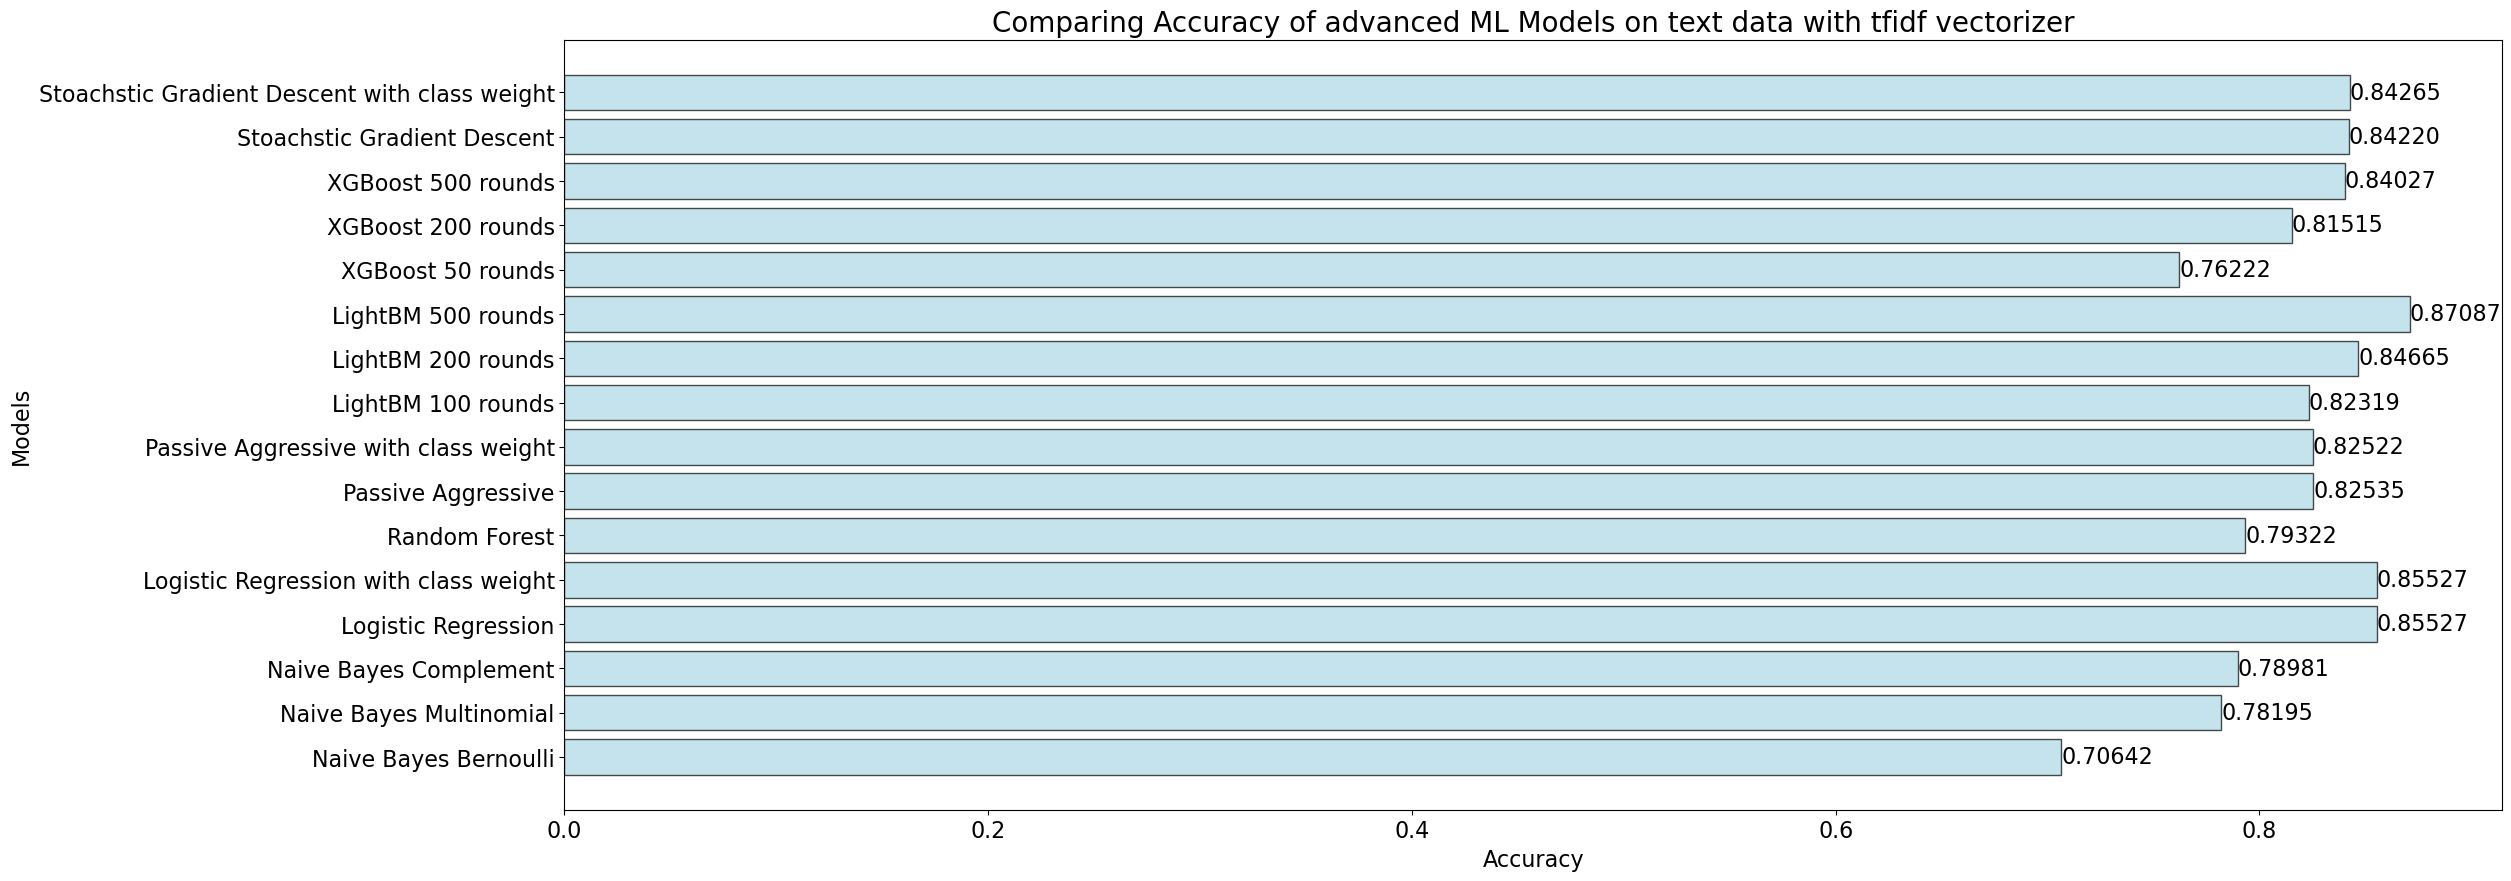

In [366]:
# Data for the chart
acc_labels_all = list(acc_labels_tfidf_all.keys())
acc_values_all = list(acc_labels_tfidf_all.values())

# Creating the chart
plt.figure(figsize=(25, 10))
plt.title('Comparing Accuracy of advanced ML Models on text data with tfidf vectorizer', fontsize=20)
plt.xlabel('Accuracy', fontsize=16)
plt.ylabel('Models', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)# Increase the plot width to accommodate the values

plt.barh(acc_labels_all, acc_values_all, color='lightblue', edgecolor='black', linewidth=1, alpha=0.7)

# Displaying values at the end of the bars
for i, value in enumerate(acc_values_all):
    plt.text(value, i, f'{value:.5f}', fontsize=16, va='center')

plt.show();

## PLOT: f1 score of all models tfidf

In [367]:
#Creating the Dictionary with model name as key and accuracy as key-value
f1_labels_tfidf_all={'Naive Bayes Bernoulli':f1NB_Bernoulli_tfidf,
        'Naive Bayes Multinomial':f1NB_Multinomial_tfidf,
        'Naive Bayes Complement':f1NB_Complement_tfidf,
        'Logistic Regression':f1_LogReg_tfidf,
        'Logistic Regression with class weight':f1_LogReg_tfidf_CW,
        'Random Forest':f1_rf_tfidf,
        'Passive Aggressive':f1_PassAgg_tfidf,
        'Passive Aggressive with class weight':f1_PassAgg_tfidf_CW,
        'LightBM 100 rounds':f1_LightGBM_tfidf_100,
        'LightBM 200 rounds':f1_LightGBM_tfidf_200,
        'LightBM 500 rounds':f1_LightGBM_tfidf_500,
        'XGBoost 50 rounds':f1_XGBoost_tfidf_50,
        'XGBoost 200 rounds':f1_XGBoost_tfidf_200,
        'XGBoost 500 rounds':f1_XGBoost_tfidf_500,
        'Stoachstic Gradient Descent':f1_sgd_tfidf,
        'Stoachstic Gradient Descent with class weight':f1_sgd_tfidf_CW} 
        

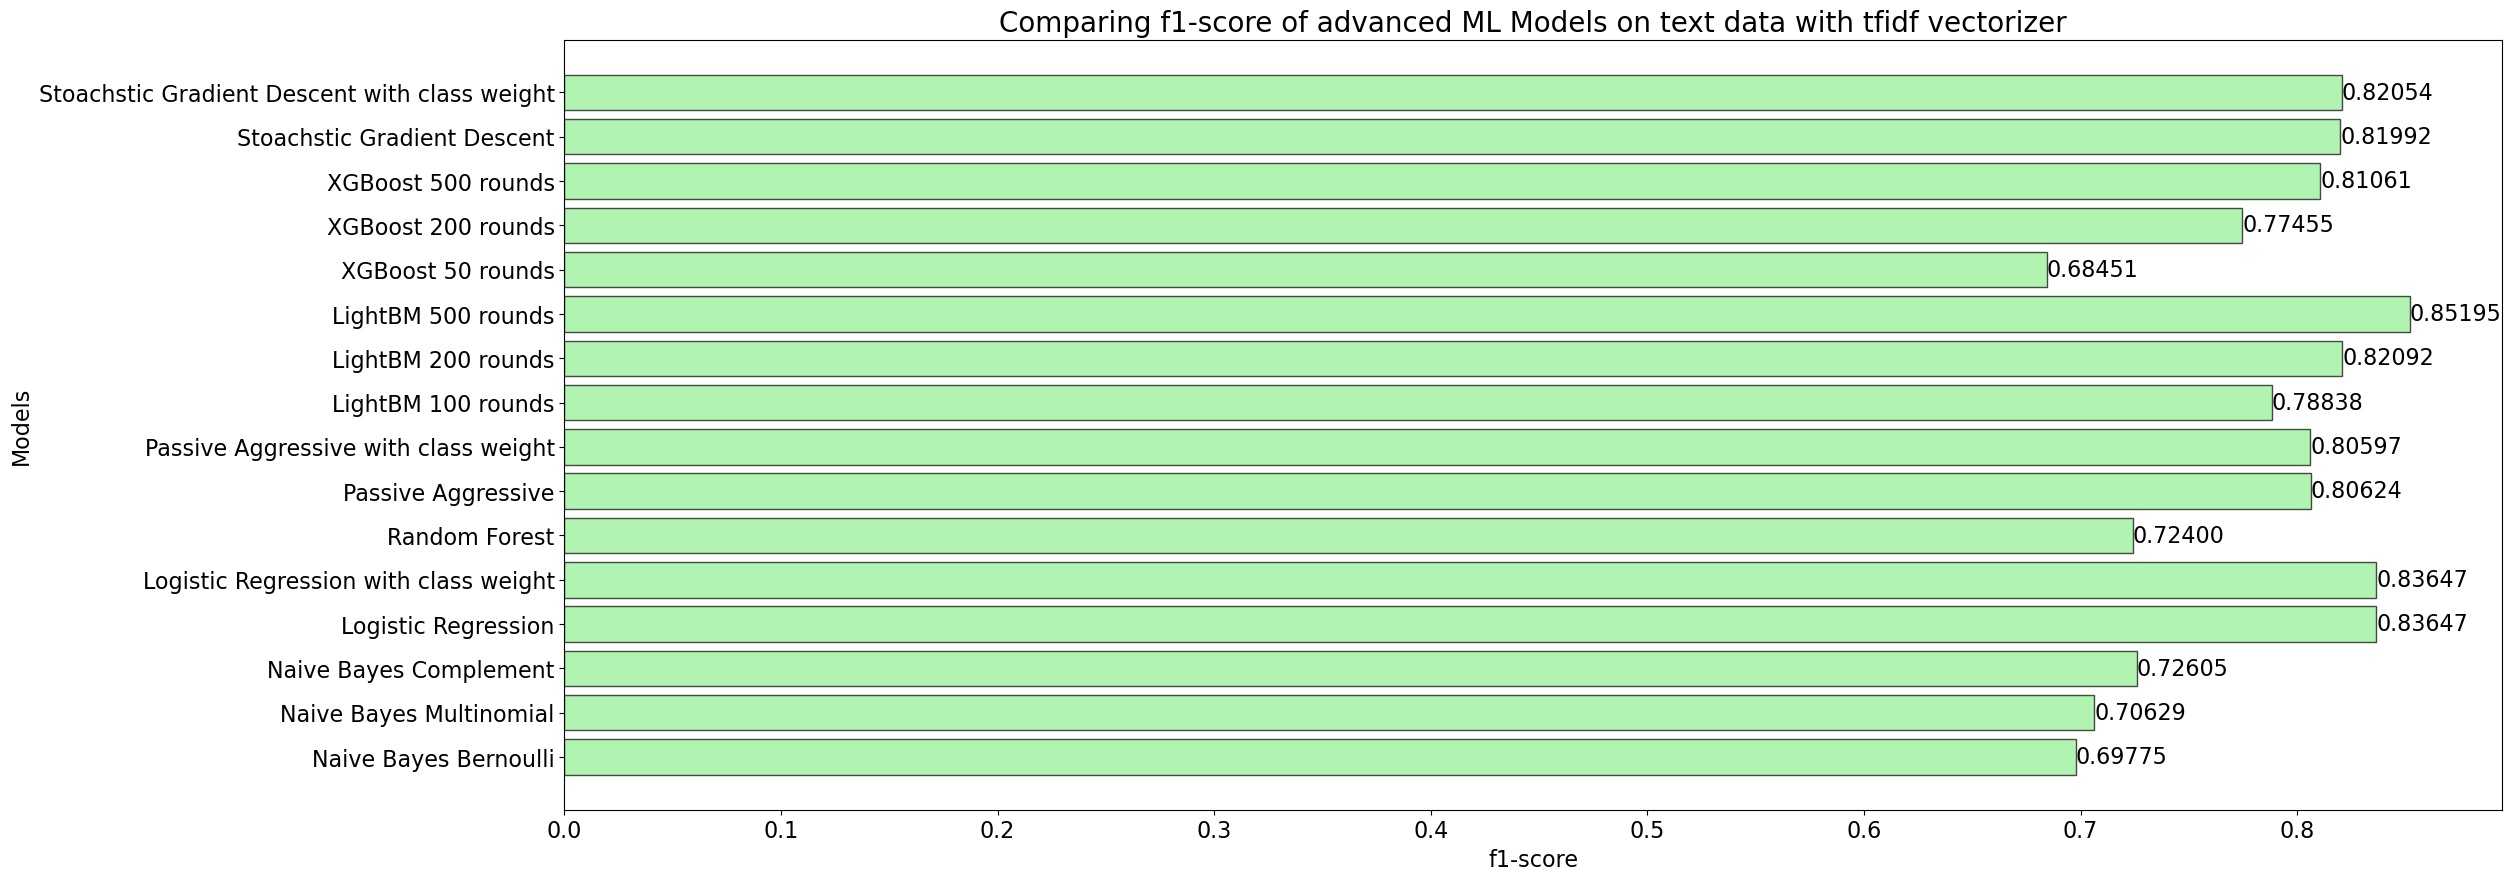

In [368]:
# Data for the chart
f1_labels_all = list(f1_labels_tfidf_all.keys())
f1_values_all = list(f1_labels_tfidf_all.values())

# Creating the chart
plt.figure(figsize=(25, 10))
plt.title('Comparing f1-score of advanced ML Models on text data with tfidf vectorizer', fontsize=20)
plt.xlabel('f1-score', fontsize=16)
plt.ylabel('Models', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)# Increase the plot width to accommodate the values

plt.barh(f1_labels_all, f1_values_all, color='lightgreen', edgecolor='black', linewidth=1, alpha=0.7)

# Displaying values at the end of the bars
for i, value in enumerate(f1_values_all):
    plt.text(value, i, f'{value:.5f}', fontsize=16, va='center')

plt.show();

######################################################################################################
# STAGE 3 - Optimized Analysis for 2 classes, title+content
######################################################################################################


In [ ]:
##########################
# STAGE 3 - Optimized Analysis for 2 classes, title+content
##########################

# used dataset: strats_new.pkl (177.830 observations)

# delete missing values in target ("label")
# after dropping missing values in "labels" (target): 111.279 observations

# TARGET: VARIABLE "LABEL"
# 0: articles from reliable sources; 61222 observations
# 1: articles from unreliable sources; 50058 observations



#########
# vectorize text (TF-IDF)
# vectorize test (countvectorizer)

#########



In [ ]:
# HOW TO FURTHER IMPROVE MODELS?


### 5: done in Stage 3 
# compare different vectorizing methods on five best performing models
# tfidf, countvectorizer
# --> countvectorizer: results do not get better



### 6: done in Stage 3
# Grid Search
# get optimal hyperparameters for three models
# --> could only be finished for 1 model due to computational limitations



### 7: done in Stage 3 
# vectorize text (word2vec) 
# run some models again
# --> word2vec: results do not get better




################ not in this notebook


### 8: not in this notebook; done for another stratified dataset with 12% of original database
# using OverSample to deal with slightly unbalanced dataset
# Random Oversampling (RandomOverSampler)
# --> not much of an improvement



### 9: not in this notebook
# remove stop words and run five best performing models again



### 10: not in this notebook
# basic Deep Learning Model




In [ ]:
# CHOSEN MODELS FROM STAGE 2

# Logistic Regression
# Random Forest
# Passive Aggressive Classifier
# LightGBM 500 rounds
# Stochastic Gradient Descent


In [59]:
df= pd.read_pickle("strats_new.pkl")

In [60]:
# For modeling purposes, we deleted missing values in the column "labels" (target variable). 
df.dropna(subset=['label'], axis = 0, inplace=True)

In [61]:
## calculate frequencies of labels
df["label"].value_counts()

0.0    61222
1.0    50058
Name: label, dtype: int64

In [62]:
# Create a boolean mask to select rows where the label is not equal to 2
mask = df["label"] != 2

# Use the mask to filter the DataFrame
df_no2 = df[mask]

In [63]:
# Seperating target and data
Y_no2 = df_no2["label"]
X_no2 = df_no2.drop("label", axis=1)


In [64]:
X_no2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111280 entries, 0 to 177830
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        111280 non-null  object 
 1   date                      111280 non-null  object 
 2   source                    111280 non-null  object 
 3   title                     111280 non-null  object 
 4   content                   111280 non-null  object 
 5   author                    111280 non-null  object 
 6   url                       111280 non-null  object 
 7   published                 111280 non-null  object 
 8   published_utc             111280 non-null  int64  
 9   collection_utc            111280 non-null  int64  
 10  country                   106074 non-null  object 
 11  bias                      111280 non-null  object 
 12  factuality                110158 non-null  float64
 13  questionable-source       111280 non-null  f

In [65]:
X_no2.isnull().sum()

id                             0
date                           0
source                         0
title                          0
content                        0
author                         0
url                            0
published                      0
published_utc                  0
collection_utc                 0
country                     5206
bias                           0
factuality                  1122
questionable-source            0
conspiracy-pseudoscience       0
pro-science                    0
word_count_content             0
word_count_title               0
nb_character_content           0
nb_character_title             0
dtype: int64

In [66]:
X_no2.shape

(111280, 20)

In [67]:
Y_no2.info()

<class 'pandas.core.series.Series'>
Int64Index: 111280 entries, 0 to 177830
Series name: label
Non-Null Count   Dtype  
--------------   -----  
111280 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


In [68]:
Y_no2.isnull().sum()

0

In [69]:
Y_no2.shape

(111280,)

# COUNT VECTORIZER

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

# Create two CountVectorizer objects
vectorizer1_count = CountVectorizer()
vectorizer2_count = CountVectorizer()

# Seperating content and title(what we want to predict on)
# Fit the vectorizers on the training data
vectorizer1_count.fit(X_no2["content"])
vectorizer2_count.fit(X_no2["title"])

# Transform the text data
X_content_count = vectorizer1_count.transform(X_no2["content"])
X_title_count = vectorizer2_count.transform(X_no2["title"])

# Combine the feature matrices
X_text_count = hstack([X_content_count, X_title_count])

## Create Train / Test Datasets COUNT

In [71]:
from sklearn.model_selection import train_test_split

X_train_text_count, X_test_text_count, Y_train_count, Y_test_count = train_test_split(X_text_count, Y_no2, test_size=0.2, random_state = 2)


In [72]:
X_train_text_count

<89024x352812 sparse matrix of type '<class 'numpy.int64'>'
	with 21713517 stored elements in Compressed Sparse Row format>

In [73]:
X_train_text_count.shape

(89024, 352812)

In [74]:
X_test_text_count

<22256x352812 sparse matrix of type '<class 'numpy.int64'>'
	with 5416833 stored elements in Compressed Sparse Row format>

In [75]:
X_test_text_count.shape

(22256, 352812)

In [76]:
Y_train_count

169056    1.0
160995    0.0
70153     0.0
40328     0.0
54927     1.0
         ... 
62833     0.0
160982    0.0
102715    1.0
166045    0.0
139097    0.0
Name: label, Length: 89024, dtype: float64

In [77]:
Y_train_count.shape

(89024,)

In [78]:
Y_test_count

74321     1.0
174089    0.0
167582    1.0
31490     1.0
167089    1.0
         ... 
48590     0.0
12906     1.0
157618    0.0
34414     0.0
83273     1.0
Name: label, Length: 22256, dtype: float64

In [79]:
Y_test_count.shape

(22256,)

# CREATE LOGISTIC REGRESSION MODEL ON count text data


In [80]:
# Instantiate model 
from sklearn.linear_model import LogisticRegression

clf_LogReg_count = LogisticRegression(C=1.0)


In [81]:
# Fit the model on the training dataset
clf_LogReg_count.fit(X_train_text_count, Y_train_count)


LogisticRegression()

In [82]:
y_pred_LogReg_count = clf_LogReg_count.predict(X_test_text_count)


In [83]:
# get accuracy
accuracy_LogReg_count = clf_LogReg_count.score(X_test_text_count, Y_test_count)
accuracy_LogReg_count

# 0.83
# a bit worse as compared to tfidf

0.8315959741193386

In [84]:
# Evaluate the model

f1_LogReg_count = f1_score(Y_test_count, y_pred_LogReg_count)
print("f1 score:", f1_LogReg_count)

# 0.812
# a bit worse as compared to tfidf

f1 score: 0.8128993610223643


In [85]:
# get confusion matrix
pd.crosstab(Y_test_count, y_pred_LogReg_count, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,10366,1850
1.0,1898,8142


In [86]:
from sklearn.metrics import classification_report 

# get classification report
print("Logistic Regression count classification report:\n ", classification_report (Y_test_count, y_pred_LogReg_count))


Logistic Regression count classification report:
                precision    recall  f1-score   support

         0.0       0.85      0.85      0.85     12216
         1.0       0.81      0.81      0.81     10040

    accuracy                           0.83     22256
   macro avg       0.83      0.83      0.83     22256
weighted avg       0.83      0.83      0.83     22256



In [87]:
# create confusion matrix
cf_matrix_LogReg_count = confusion_matrix(Y_test_count, y_pred_LogReg_count)
print(cf_matrix_LogReg_count)


[[10366  1850]
 [ 1898  8142]]


# RANDOM FOREST on text data count
# takes 30 minutes


In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
# Instantiate the model
clf_rf_count = RandomForestClassifier(n_jobs=-1)


In [ ]:
# fit model
clf_rf_count.fit(X_train_text_count, Y_train_count)


In [401]:
#Predict on the test set 
y_pred_rf_count = clf_rf_count.predict(X_test_text_count)


In [402]:
# get accuracy
accuracy_rf_count = clf_rf_count.score(X_test_text_count, Y_test_count)
accuracy_rf_count

# 0.79
# identical to tfidf

0.7934938892882818

In [403]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_rf_count = f1_score(Y_test_count, y_pred_rf_count)
f1_rf_count

# 0.72
# identical to tfidf


0.7212180031541915

In [404]:
# get confusion matrix
pd.crosstab(Y_test_count, y_pred_rf_count, rownames=["true"], colnames=["predict"])

# overall prediction is quite good
# best prediction: real news as real news (0:0), followed by fake news as fake news (1:1)
# best result for false positives (real news being predicted as fake news)

predict,0.0,1.0
true,,
0.0,11715,501
1.0,4095,5945


In [405]:
from sklearn.metrics import classification_report 

# get classification report
print("Random Forest count classification report:\n ", classification_report (Y_test_count, y_pred_rf_count))


Random Forest count classification report:
                precision    recall  f1-score   support

         0.0       0.74      0.96      0.84     12216
         1.0       0.92      0.59      0.72     10040

    accuracy                           0.79     22256
   macro avg       0.83      0.78      0.78     22256
weighted avg       0.82      0.79      0.78     22256



In [406]:
# create confusion matrix
cf_matrix_rf_count = confusion_matrix(Y_test_count, y_pred_rf_count)
print(cf_matrix_rf_count)


[[11715   501]
 [ 4095  5945]]


# Passive Aggressive Classifier on text data count


In [407]:
from sklearn.linear_model import PassiveAggressiveClassifier


In [408]:
# Initialize a PassiveAggressiveClassifier
pac_count = PassiveAggressiveClassifier(max_iter=50)


In [409]:
# fit model
pac_count.fit(X_train_text_count, Y_train_count)


C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


PassiveAggressiveClassifier(max_iter=50)

In [411]:
#Predict on the test set 
y_pred_PassAgg_count = pac_count.predict(X_test_text_count)


In [412]:
# get accuracy
accuracy_PassAgg_count= pac_count.score(X_test_text_count, Y_test_count)
accuracy_PassAgg_count

# 0.822

0.8226994967649173

In [413]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_PassAgg_count = f1_score(Y_test_count, y_pred_PassAgg_count)
f1_PassAgg_count

# 0.79
# a bit worse than tfidf

0.7974748511599262

In [414]:
# get confusion matrix
pd.crosstab(Y_test_count, y_pred_PassAgg_count, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no very good prediction for any case

predict,0.0,1.0
true,,
0.0,10541,1675
1.0,2271,7769


In [415]:
from sklearn.metrics import classification_report 

# get classification report
print("Passive Aggressive count classification report:\n ", classification_report (Y_test_count, y_pred_PassAgg_count))


Passive Aggressive count classification report:
                precision    recall  f1-score   support

         0.0       0.82      0.86      0.84     12216
         1.0       0.82      0.77      0.80     10040

    accuracy                           0.82     22256
   macro avg       0.82      0.82      0.82     22256
weighted avg       0.82      0.82      0.82     22256



In [416]:
# create confusion matrix
cf_matrix_PassAgg_count = confusion_matrix(Y_test_count, y_pred_PassAgg_count)
print(cf_matrix_PassAgg_count)


[[10541  1675]
 [ 2271  7769]]


# LightGBM on text data count - 500 rounds
# takes 7 minutes

In [417]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [418]:
# Create a LightGBM dataset for training

LightGMB_train_data_text_count = lgb.Dataset(X_train_text_count.astype(float), label=Y_train_count.astype(float))

# Set the hyperparameters for the LightGBM model
paramsLightGBM_count = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # Set the appropriate objective for your classification task
    'metric': 'binary_logloss',  # Set the appropriate metric for evaluation
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


In [419]:
# Train the LightGBM model
clf_LightGBM_count_500 = lgb.train(paramsLightGBM_count, LightGMB_train_data_text_count, num_boost_round=500)

# takes 7 minutes


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 22.018861 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [420]:
# Make predictions on the test set
y_pred_LightGBM_count_500 = clf_LightGBM_count_500.predict(X_test_text_count.astype(float))
y_pred_LightGBM_count_500_binary = [round(pred) for pred in y_pred_LightGBM_count_500]  
# Convert probability to binary predictions


In [421]:
# Evaluate the model with accuracy
accuracy_LightGBM_count_500 = accuracy_score(Y_test_count, y_pred_LightGBM_count_500_binary)
print("Accuracy LightGBM count 500:", accuracy_LightGBM_count_500)

# 0.867
# a bit worse than tfidf

Accuracy LightGBM count 500: 0.8671369518332135


In [422]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_LightGBM_count_500 = f1_score(Y_test_count, y_pred_LightGBM_count_500_binary)
f1_LightGBM_count_500

# 0.847
# a bit worse than tfidf

0.8470174349423146

In [423]:
# get confusion matrix
pd.crosstab(Y_test_count, y_pred_LightGBM_count_500_binary, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no super good result for any of the cases

predict,0,1
true,,
0.0,11113,1103
1.0,1854,8186


In [424]:
# Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

cf_matrix_LightGBM_count_500 = confusion_matrix(Y_test_count, y_pred_LightGBM_count_500_binary)

print("Confusion Matrix:\n",  cf_matrix_LightGBM_count_500)

Confusion Matrix:
 [[11113  1103]
 [ 1854  8186]]


In [425]:
# Evaluate model with classification report
from sklearn.metrics import classification_report 

print("LightGBM count 500 classification report:\n", classification_report (Y_test_count, y_pred_LightGBM_count_500_binary))


LightGBM count 500 classification report:
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88     12216
         1.0       0.88      0.82      0.85     10040

    accuracy                           0.87     22256
   macro avg       0.87      0.86      0.86     22256
weighted avg       0.87      0.87      0.87     22256



# Stochastic Gradient Descent (SGD) on text data count

In [426]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Create an SGD classifier
sgd_count = SGDClassifier()

In [427]:
# Train the SGD model
sgd_count.fit(X_train_text_count, Y_train_count)


SGDClassifier()

In [428]:
# Make predictions on the test set
y_pred_sgd_count = sgd_count.predict(X_test_text_count)

In [429]:
# Calculate accuracy
accuracy_sgd_count = accuracy_score(Y_test_count, y_pred_sgd_count)
accuracy_sgd_count

# 0.79
# worse than tfidf

0.796998562185478

In [430]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_sgd_count = f1_score(Y_test_count, y_pred_sgd_count)
f1_sgd_count

# 0.800
# worse than tfidf

0.8000177053824362

In [431]:
# Create crosstab
pd.crosstab(Y_test_count, y_pred_sgd_count, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no super good result for any of the cases

predict,0.0,1.0
true,,
0.0,8701,3515
1.0,1003,9037


In [432]:
from sklearn.metrics import classification_report 

# get classification report
print("SGD count classification report:\n ", classification_report (Y_test_count, y_pred_sgd_count))


SGD count classification report:
                precision    recall  f1-score   support

         0.0       0.90      0.71      0.79     12216
         1.0       0.72      0.90      0.80     10040

    accuracy                           0.80     22256
   macro avg       0.81      0.81      0.80     22256
weighted avg       0.82      0.80      0.80     22256



In [433]:
# create confusion matrix
cf_matrix_sgd_count = confusion_matrix(Y_test_count, y_pred_sgd_count)
print(cf_matrix_sgd_count)

[[8701 3515]
 [1003 9037]]


# COMPARE MODELS ON TEXT DATA ONLY COUNT


In [ ]:
# MODELS FOR STAGE 2 (Advanced Models):
# Logistic Regression
# Random Forest   
# Passive Aggressive Classifier 
# LightGBM 500 rounds
# Stochastic Gradient Descent


In [434]:
print("Logistic Regression accuracy score count vectorizer:", accuracy_LogReg_count)
print("Random Forest accuracy score count vectorizer:", accuracy_rf_count)
print("Passive Agressive accuracy score count vectorizer:", accuracy_PassAgg_count)
print("LightGBM accuracy score count vectorizer 500 rounds:", accuracy_LightGBM_count_500)
print("Stochastic Gradient Descent accuracy score count vectorizer:", accuracy_sgd_count)


Logistic Regression accuracy score count vectorizer: 0.8315959741193386
Random Forest accuracy score count vectorizer: 0.7934938892882818
Passive Agressive accuracy score count vectorizer: 0.8226994967649173
LightGBM accuracy score count vectorizer 500 rounds: 0.8671369518332135
Stochastic Gradient Descent accuracy score count vectorizer: 0.796998562185478


In [441]:
print("Logistic Regression f1 score count vectorizer:", f1_LogReg_count)
print("Random Forest f1 score count vectorizer:", f1_rf_count)
print("Passive Agressive f1 score count vectorizer:", f1_PassAgg_count)
print("LightGBM f1 score count vectorizer 500 rounds:", f1_LightGBM_count_500)
print("Stochastic Gradient Descent f1 score count vectorizer:", f1_sgd_count)

Logistic Regression f1 score count vectorizer: 0.8128993610223643
Random Forest f1 score count vectorizer: 0.7212180031541915
Passive Agressive f1 score count vectorizer: 0.7974748511599262
LightGBM f1 score count vectorizer 500 rounds: 0.8470174349423146
Stochastic Gradient Descent f1 score count vectorizer: 0.8000177053824362


## PLOT: Accuracy of all models count vectorizer

In [436]:
#Creating the Dictionary with model name as key and accuracy as key-value
acc_labels_count_all={'Logistic Regression':accuracy_LogReg_count,
        'Random Forest':accuracy_rf_count,
        'Passive Aggressive':accuracy_PassAgg_count,
        'LightBM 500 rounds':accuracy_LightGBM_count_500,
        'Stoachstic Gradient Descent':accuracy_sgd_count} 
        

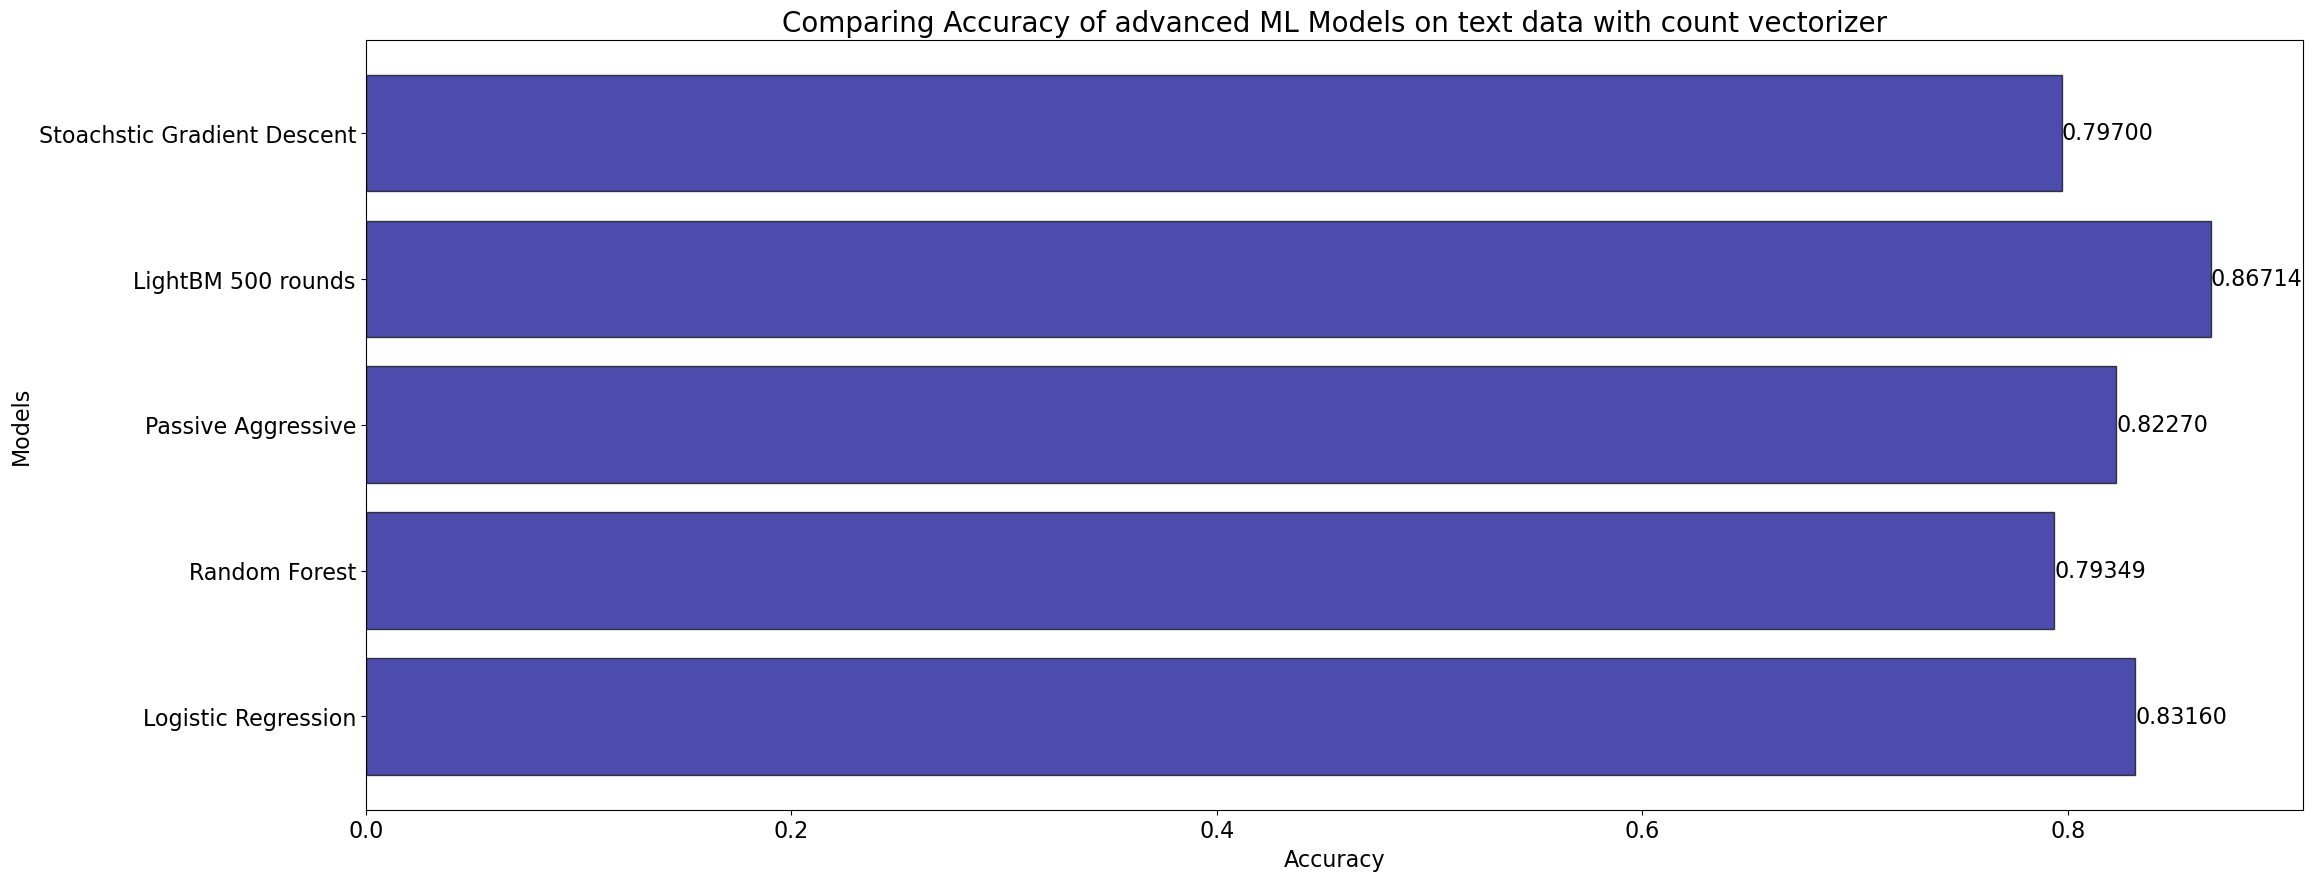

In [437]:
# Data for the chart
acc_labels_all_count = list(acc_labels_count_all.keys())
acc_values_all_count = list(acc_labels_count_all.values())

# Creating the chart
plt.figure(figsize=(25, 10))
plt.title('Comparing Accuracy of advanced ML Models on text data with count vectorizer', fontsize=20)
plt.xlabel('Accuracy', fontsize=16)
plt.ylabel('Models', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)# Increase the plot width to accommodate the values

plt.barh(acc_labels_all_count, acc_values_all_count, color='darkblue', edgecolor='black', linewidth=1, alpha=0.7)

# Displaying values at the end of the bars
for i, value in enumerate(acc_values_all_count):
    plt.text(value, i, f'{value:.5f}', fontsize=16, va='center')

plt.show();

## PLOT: f1 score of all models count vectorizer

In [438]:
#Creating the Dictionary with model name as key and accuracy as key-value
f1_labels_count_all={'Logistic Regression':f1_LogReg_count,
        'Random Forest':f1_rf_count,
        'Passive Aggressive':f1_PassAgg_count,
        'LightBM 500 rounds':f1_LightGBM_count_500,
        'Stoachstic Gradient Descent':f1_sgd_count} 
        

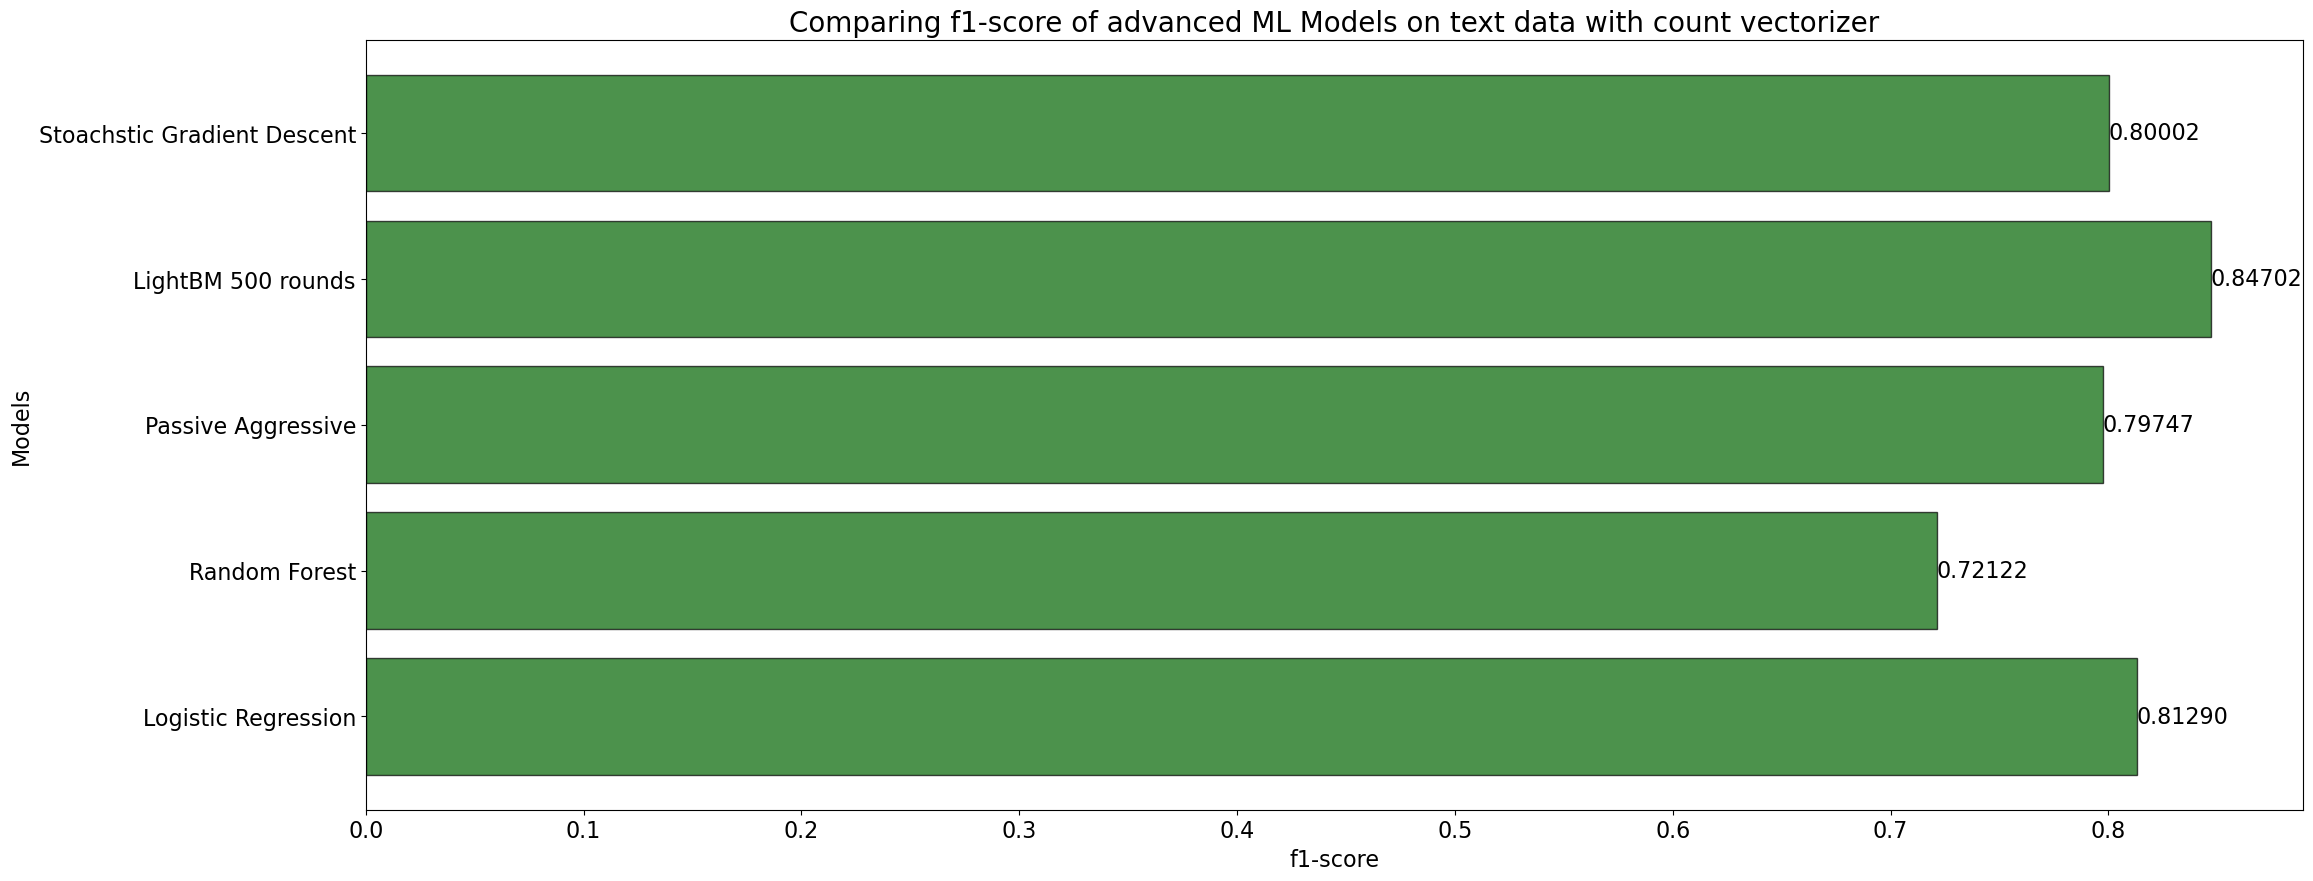

In [440]:
# Data for the chart
f1_labels_all_count = list(f1_labels_count_all.keys())
f1_values_all_count = list(f1_labels_count_all.values())

# Creating the chart
plt.figure(figsize=(25, 10))
plt.title('Comparing f1-score of advanced ML Models on text data with count vectorizer', fontsize=20)
plt.xlabel('f1-score', fontsize=16)
plt.ylabel('Models', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)# Increase the plot width to accommodate the values

plt.barh(f1_labels_all_count, f1_values_all_count, color='darkgreen', edgecolor='black', linewidth=1, alpha=0.7)

# Displaying values at the end of the bars
for i, value in enumerate(f1_values_all_count):
    plt.text(value, i, f'{value:.5f}', fontsize=16, va='center')

plt.show();

# WORD2VEC


In [538]:
X_text2 = X_no2[["title", "content"]]

In [539]:
X_text2.shape

(111280, 2)

In [540]:
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download("punkt")
import warnings

warnings.filterwarnings(action="ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nutzer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [605]:
title_sentences = [sent_tokenize(text) for text in X_text2["title"]]
content_sentences = [sent_tokenize(text) for text in X_text2["content"]]

tokenized_title_sentences = [[word_tokenize(sentence) for sentence in sentence_list] for sentence_list in title_sentences]
tokenized_content_sentences = [[word_tokenize(sentence) for sentence in sentence_list] for sentence_list in content_sentences]

tokenized_sentences = [sentence for sentence_list in tokenized_title_sentences + tokenized_content_sentences for sentence in sentence_list]

In [ ]:
model = Word2Vec(tokenized_sentences, min_count=1, vector_size=1000)

In [28]:
title_feature_vectors = []
content_feature_vectors = []
for title, content in zip(X_text2["title"], X_text2["content"]):
    title_words = word_tokenize(title)
    content_words = word_tokenize(content)
    title_word_vectors = [model.wv[word] for word in title_words if word in model.wv]
    content_word_vectors = [model.wv[word] for word in content_words if word in model.wv]
    if title_word_vectors:
        title_feature_vector = np.mean(title_word_vectors, axis=0)
    else:
        title_feature_vector = np.zeros(model.vector_size)
    if content_word_vectors:
        content_feature_vector = np.mean(content_word_vectors, axis=0)
    else:
        content_feature_vector = np.zeros(model.vector_size)
    title_feature_vectors.append(title_feature_vector)
    content_feature_vectors.append(content_feature_vector)

In [29]:
X_w2v = np.hstack((title_feature_vectors, content_feature_vectors))
print(X_w2v.shape)

(63178, 2000)


In [ ]:
Y_no2.shape

# LIGHT GBM WORD2VEC

In [31]:
Light_w2v = lgb.Dataset(X_train_w2v.astype(float), label=y_train_w2v.astype(float))

# Set the hyperparameters for the LightGBM model
paramsLight_w2v = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # Set the appropriate objective for your classification task
    'metric': 'binary_logloss',  # Set the appropriate metric for evaluation
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [32]:
clf_Light_500_w2v = lgb.train(paramsLight_w2v, Light_w2v, num_boost_round=100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.662670 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [33]:
y_pred_Light_500_w2v = clf_Light_500_w2v.predict(X_test_w2v)
y_pred_Light_500_w2v_binary = [round(pred) for pred in y_pred_Light_500_w2v]

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy_Light_500_w2v = accuracy_score(y_test_w2v, y_pred_Light_500_w2v_binary)
print("Accuracy LightGBM 500 w2v:", accuracy_Light_500_w2v)

Accuracy LightGBM vect: 0.8023108578664134


In [36]:
print(classification_report(y_test_w2v, y_pred_Light_500_w2v_binary))

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84      7247
         1.0       0.81      0.70      0.75      5389

    accuracy                           0.80     12636
   macro avg       0.80      0.79      0.79     12636
weighted avg       0.80      0.80      0.80     12636



In [42]:
pd.crosstab(y_test_w2v, y_pred_Light_500_w2v_binary, rownames=["real"], colnames=["predict"])

predict,0,1
real,,
0.0,6353,894
1.0,1604,3785


# RANDOM FOREST WORD2VEC
# takes 20 minutes

In [ ]:
# Instantiate the model
from sklearn.ensemble import RandomForestClassifier
clf_rf_w2v = RandomForestClassifier(n_jobs=-1)


In [ ]:
# fit model
clf_rf_w2v.fit(X_train_w2v, y_train_w2v)

In [ ]:
#Predict on the test set 
y_pred_rf_w2v = clf_rf_w2v.predict(X_test_w2v)

In [ ]:
# get accuracy
accuracy_rf_w2v = clf_rf_w2v.score(X_test_w2v, y_test_w2v)
accuracy_rf_w2v


In [ ]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_rf_w2v = f1_score(y_test_w2v, y_pred_rf_w2v)
f1_rf_w2v

In [102]:
clf_rf_w2v.score(X_test_w2v, y_test_w2v)

0.7960588793922128

In [101]:
# get confusion matrix
pd.crosstab(y_test_w2v, y_pred_rf_w2v, rownames=["true"], colnames=["predict"])

predict,0.0,1.0
real,,
0.0,6303,944
1.0,1633,3756


In [ ]:
from sklearn.metrics import classification_report 

# get classification report
print("Random Forest w2v classification report:\n ", classification_report (y_test_w2v, y_pred_rf_w2v))


In [ ]:
# create confusion matrix
cf_matrix_rf_w2v = confusion_matrix(y_test_w2v, y_pred_rf_w2v)
print(cf_matrix_rf_w2v)


# LOGISTIC REGRESSION WORD2VEC


In [ ]:
from sklearn.linear_model import LogisticRegression
clf_LogReg_w2v = LogisticRegression(C=1.0)


In [ ]:
# Fit the model on the training dataset
clf_LogReg_w2v.fit(X_train_w2v, y_train_w2v)

In [ ]:
# predict on test set
y_pred_LogReg_w2v = clf_LogReg_w2v.predict(X_test_w2v)


In [ ]:
# get accuracy
accuracy_LogReg_w2v = clf_LogReg_w2v.score(X_test_w2v, y_test_w2v)
accuracy_LogReg_w2v


In [ ]:
# Evaluate the model
f1_LogReg_w2v = f1_score(y_test_w2v, y_pred_LogReg_w2v)
print("f1 score:", f1_LogReg_w2v)


In [96]:
clf_LogReg_w2v.score(X_test_w2v, y_test_w2v)

0.7704969927192149

In [97]:
# get confusion matrix
pd.crosstab(y_test_w2v, y_pred_LogReg_w2v, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
real,,
0.0,6898,349
1.0,2551,2838


In [ ]:
from sklearn.metrics import classification_report 

# get classification report
print("Logistic Regression w2v classification report:\n ", classification_report (y_test_w2v, y_pred_LogReg_w2v))


In [ ]:
# create confusion matrix
cf_matrix_LogReg_w2v = confusion_matrix(y_test_w2v, y_pred_LogReg_w2v)
print(cf_matrix_LogReg_w2v)


# GRID SEARCH TFIDF

## GRID SEARCH RANDOM FOREST MODEL TFIDF VECTORIZER
# took more than 3 day, not finished

In [ ]:
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
max_depth_range = range(1, 6)
class_weight_options = [None, {0: 1, 1: 2}, {0: 2, 1: 1}]

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=max_depth_range, class_weight=class_weight_options)

# instantiate and fit the grid
grid = GridSearchCV(RandomForestClassifier(criterion="entropy", n_estimators=200), param_grid, cv=10, scoring="accuracy")
grid.fit(X_train_text_tfidf, Y_train)

# view the results
print(grid.cv_results_)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

## GRID SEARCH SGD MODEL TFIDF VECTORIZER

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# define the parameter values that should be searched
loss_options = ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"]
penalty_options = ["l2", "l1", "elasticnet"]
class_weight_options = [None, {0: 1, 1: 2}, {0: 2, 1: 1}]

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(loss=loss_options, penalty=penalty_options, class_weight=class_weight_options)

# instantiate and fit the grid
grid = GridSearchCV(SGDClassifier(max_iter=1000), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train_text_tfidf, Y_train)

# view the results
print(grid.cv_results_)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum numb

D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum numb

D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum numb

D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


{'mean_fit_time': array([  3.96334257, 245.70420299,  14.94858661,   5.53701153,
       287.95354195,  19.64705524,   4.48801751, 229.98812361,
        19.90653095,   2.68335032, 220.05032096,  10.35839682,
         4.2782937 , 241.52311993,  14.61940389,   4.38795428,
       235.88222995,  16.12529488,   4.88708301, 252.58755503,
        26.87317858,   4.40408959, 225.9673542 ,  21.23774867,
         2.40014191, 219.56167245,  10.43870945,   4.32532039,
       223.06977487,  20.66610751,   4.48095946, 193.26106653,
        13.70579324,   6.14914184, 267.43623872,  20.39977789,
         4.9789362 , 228.30916777,  16.99407396,   2.20516634,
       210.90709634,   8.86782994,   5.22545595, 243.63180184,
        18.74309845]), 'std_fit_time': array([ 0.90574522,  4.36022957,  4.14629206,  0.6393986 ,  4.59213184,
        8.05382489,  0.98713638,  3.1409743 ,  3.85258824,  0.8527116 ,
        2.02511916,  2.26266543,  0.77288526,  1.90753416,  6.40505861,
        0.74395517,  1.69579429,  

In [ ]:
# BEST PARAMS FOR SGD:
# {'class_weight': None, 'loss': 'hinge', 'penalty': 'elasticnet'}

## GRID SEARCH LOGISTIC REGRESSION MODEL TFIDF VECTORIZER
# took more than 3 day, not finished

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define the parameter values that should be searched
C_range = np.logspace(-3, 3, 7)
penalty_options = ["l1", "l2", "elasticnet", "none"]
class_weight_options = [None, {0: 1, 1: 2}, {0: 2, 1: 1}]
solver_options = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=C_range, penalty=penalty_options, class_weight=class_weight_options, solver=solver_options)

# instantiate and fit the grid
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train_text_tfidf, Y_train)

# view the results
print(grid.cv_results_)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

# RUN OPTIMIZED MODELS TFIDF


## CREATE LOGISTIC REGRESSION MODEL ON tfidf text data with optimal parameters


In [32]:
# Instantiate model 
from sklearn.linear_model import LogisticRegression

clf_LogReg_tfidf_opt = LogisticRegression(C=1.0, class_weight={0: 1, 1: 1})

In [33]:
# Fit the model on the training dataset
clf_LogReg_tfidf_opt.fit(X_train_text_tfidf, Y_train)


LogisticRegression(class_weight={0: 1, 1: 1})

In [34]:
y_pred_LogReg_tfidf_opt = clf_LogReg_tfidf_opt.predict(X_test_text_tfidf)


In [35]:
# get accuracy
accuracy_LogReg_tfidf_opt = clf_LogReg_tfidf_opt.score(X_test_text_tfidf, Y_test)
accuracy_LogReg_tfidf_opt

# 0.855

0.8552749820273184

In [36]:
# Evaluate the model

f1_LogReg_tfidf_opt = f1_score(Y_test, y_pred_LogReg_tfidf_opt)
print("f1 score:", f1_LogReg_tfidf_opt)

# 0.836

f1 score: 0.8364725592729856


In [37]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_LogReg_tfidf_opt, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,10797,1419
1.0,1802,8238


In [38]:
from sklearn.metrics import classification_report 

# get classification report
print("Logistic Regression tfidf optimized classification report:\n ", classification_report (Y_test, y_pred_LogReg_tfidf_opt))


Logistic Regression tfidf optimized classification report:
                precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     12216
         1.0       0.85      0.82      0.84     10040

    accuracy                           0.86     22256
   macro avg       0.86      0.85      0.85     22256
weighted avg       0.86      0.86      0.85     22256



In [39]:
# create confusion matrix
from sklearn.metrics import confusion_matrix 

cf_matrix_LogReg_tfidf_opt = confusion_matrix(Y_test, y_pred_LogReg_tfidf_opt)
print(cf_matrix_LogReg_tfidf_opt)


[[10797  1419]
 [ 1802  8238]]


Confusion Matrix for optimized Logistic Regression model on tfidf data


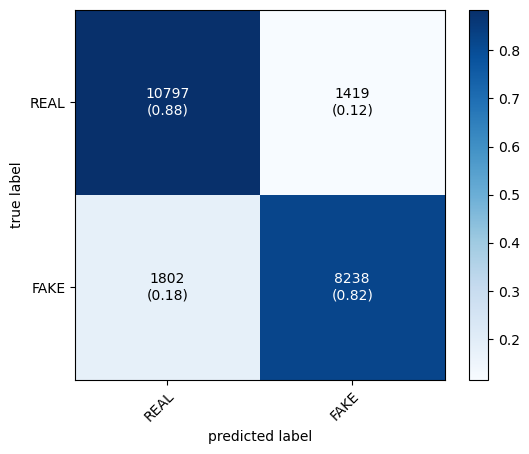

In [40]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for optimized Logistic Regression model on tfidf data")
plot_confusion_matrix(conf_mat = cf_matrix_LogReg_tfidf_opt,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();

## Random Forest model ON tfidf text data with optimal parameters
## takes 1 hour

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
# Instantiate the model
clf_rf_tfidf_opt = RandomForestClassifier(n_jobs=-1, criterion="entropy", class_weight={0: 1, 1: 1}, n_estimators=400)


In [ ]:
# fit model
clf_rf_tfidf_opt.fit(X_train_text_tfidf, Y_train)


In [70]:
#Predict on the test set 
y_pred_rf_tfidf_opt = clf_rf_tfidf_opt.predict(X_test_text_tfidf)


In [71]:
# get accuracy
accuracy_rf_tfidf_opt = clf_rf_tfidf_opt.score(X_test_text_tfidf, Y_test)
accuracy_rf_tfidf_opt

# 0.807

0.8071531272465852

In [72]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_rf_tfidf_opt = f1_score(Y_test, y_pred_rf_tfidf_opt)
f1_rf_tfidf_opt

# 0.74


0.7438835183196086

In [73]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_rf_tfidf_opt, rownames=["true"], colnames=["predict"])

# overall prediction is quite good
# best prediction: real news as real news (0:0), followed by fake news as fake news (1:1)
# best result for false positives (real news being predicted as fake news)

predict,0.0,1.0
true,,
0.0,11731,485
1.0,3807,6233


In [74]:
from sklearn.metrics import classification_report 

# get classification report
print("Random Forest tfidf optimized classification report:\n ", classification_report (Y_test, y_pred_rf_tfidf_opt))


Random Forest tfidf optimized classification report:
                precision    recall  f1-score   support

         0.0       0.75      0.96      0.85     12216
         1.0       0.93      0.62      0.74     10040

    accuracy                           0.81     22256
   macro avg       0.84      0.79      0.79     22256
weighted avg       0.83      0.81      0.80     22256



In [75]:
# create confusion matrix
cf_matrix_rf_tfidf_opt = confusion_matrix(Y_test, y_pred_rf_tfidf_opt)
print(cf_matrix_rf_tfidf_opt)


[[11731   485]
 [ 3807  6233]]


Confusion Matrix for optimized Random Forest model on tfidf data


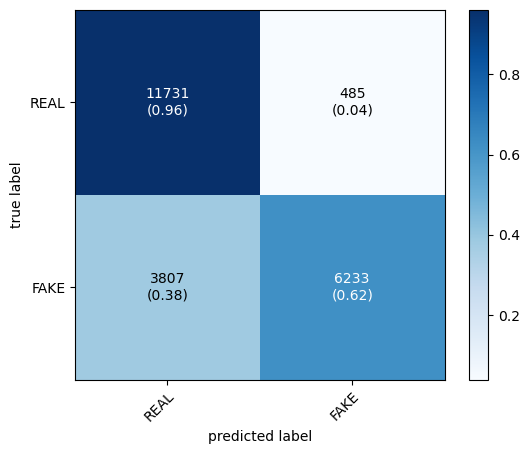

In [76]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for optimized Random Forest model on tfidf data")
plot_confusion_matrix(conf_mat = cf_matrix_rf_tfidf_opt,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();

## SGD model ON tfidf text data with optimal parameters

In [ ]:
# BEST PARAMS FOR SGD:
# {'class_weight': None, 'loss': 'hinge', 'penalty': 'elasticnet'}

In [77]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Create an SGD classifier
sgd_tfidf_opt = SGDClassifier(loss= 'hinge', penalty= 'elasticnet')

In [78]:
# Train the SGD model
sgd_tfidf_opt.fit(X_train_text_tfidf, Y_train)


SGDClassifier(penalty='elasticnet')

In [79]:
# Make predictions on the test set
y_pred_sgd_tfidf_opt = sgd_tfidf_opt.predict(X_test_text_tfidf)

In [80]:
# Calculate accuracy
accuracy_sgd_tfidf_opt = accuracy_score(Y_test, y_pred_sgd_tfidf_opt)
accuracy_sgd_tfidf_opt

# 0.83

0.8346513299784328

In [81]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_sgd_tfidf_opt = f1_score(Y_test, y_pred_sgd_tfidf_opt)
f1_sgd_tfidf_opt

# 0.811

0.8116490940730884

In [82]:
# Create crosstab
pd.crosstab(Y_test, y_pred_sgd_tfidf_opt, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no super good result for any of the cases

predict,0.0,1.0
true,,
0.0,10647,1569
1.0,2111,7929


In [83]:
from sklearn.metrics import classification_report 

# get classification report
print("SGD tfidf optimized classification report:\n ", classification_report (Y_test, y_pred_sgd_tfidf_opt))


SGD tfidf optimized classification report:
                precision    recall  f1-score   support

         0.0       0.83      0.87      0.85     12216
         1.0       0.83      0.79      0.81     10040

    accuracy                           0.83     22256
   macro avg       0.83      0.83      0.83     22256
weighted avg       0.83      0.83      0.83     22256



In [84]:
# create confusion matrix
cf_matrix_sgd_tfidf_opt = confusion_matrix(Y_test, y_pred_sgd_tfidf_opt)
print(cf_matrix_sgd_tfidf_opt)

[[10647  1569]
 [ 2111  7929]]


Confusion Matrix for optimized SGD model on tfidf data


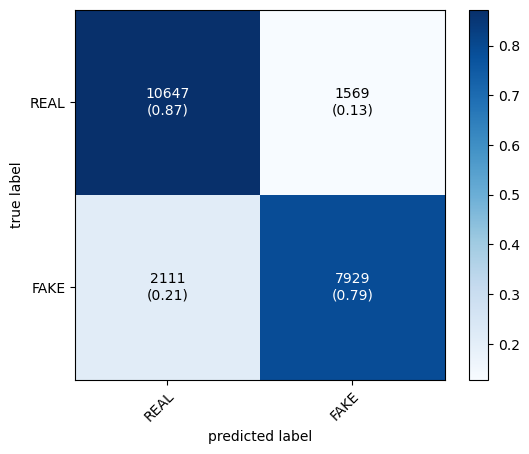

In [85]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for optimized SGD model on tfidf data")
plot_confusion_matrix(conf_mat = cf_matrix_sgd_tfidf_opt,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();

# STACKING WITH OPTIMAL MODELS AND TFIDF
# RUNS A COUPLE OF HOURS!

In [87]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_validate, KFold

In [88]:
sclf_tfidf = StackingClassifier([("sgd", sgd_tfidf_opt), ("rf", clf_rf_tfidf_opt), ("lr", clf_LogReg_tfidf_opt)], 
                                final_estimator = clf_LogReg_tfidf_opt)


In [89]:
sclf_tfidf.fit(X_train_text_tfidf, Y_train)

C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

StackingClassifier(estimators=[('sgd', SGDClassifier(penalty='elasticnet')),
                               ('rf',
                                RandomForestClassifier(class_weight={0: 1,
                                                                     1: 1},
                                                       criterion='entropy',
                                                       n_estimators=400,
                                                       n_jobs=-1)),
                               ('lr',
                                LogisticRegression(class_weight={0: 1, 1: 1}))],
                   final_estimator=LogisticRegression(class_weight={0: 1,
                                                                    1: 1}))

In [90]:
# Make predictions on the test set
y_pred_sclf_tfidf = sclf_tfidf.predict(X_test_text_tfidf)

In [ ]:
# Calculate accuracy
accuracy_sclf_tfidf = accuracy_score(Y_test, y_pred_sclf_tfidf)
accuracy_sclf_tfidf

In [ ]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_sclf_tfidf = f1_score(Y_test, y_pred_sclf_tfidf)
f1_sclf_tfidf


In [ ]:
# Create crosstab
pd.crosstab(Y_test, y_pred_sclf_tfidf, rownames=["true"], colnames=["predict"])


In [ ]:
from sklearn.metrics import classification_report 

# get classification report
print("Stacking Classifier tfidf optimized classification report:\n ", classification_report (Y_test, y_pred_sclf_tfidf))


In [ ]:
# create confusion matrix
cf_matrix_sclf_tfidf = confusion_matrix(Y_test, y_pred_sclf_tfidf)
print(cf_matrix_sclf_tfidf)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for optimized Stacking Classifier model on tfidf data")
plot_confusion_matrix(conf_mat = cf_matrix_sclf_tfidf,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();

# SAVE OPTIMIZED STACKING MODEL TFIDF

In [1]:
from joblib import dump, load

In [ ]:
dump(sclf_tfidf, "model_tfidf.joblib")

# COMPARE OPTIMIZED MODELS ON TEXT DATA ONLY TFIDF


In [ ]:
# MODELS FOR STAGE 3 (Optimized Models):

# Logistic Regression
# Random Forest
# Stochastic Gradient Descent
# Stacking Model TFIDF


# COMPARE OPTIMAL TFIDF MODELS 


In [ ]:
print("Logistic Regression optimized accuracy score tfidf:", accuracy_LogReg_tfidf_opt)
print("Random Forest optimized accuracy score tfidf:", accuracy_rf_tfidf_opt)
print("Stochastic Gradient Descent optimized accuracy score tfidf:", accuracy_sgd_tfidf_opt)
print("Stacking Classifier accuracy score tfidf:", accuracy_sclf_tfidf_opt)

In [ ]:
print("Logistic Regression optimized f1 score tfidf:", f1_LogReg_tfidf_opt)
print("Random Forest optimized f1 score tfidf:", f1_rf_tfidf_opt)
print("Stochastic Gradient Descent optimized f1 score tfidf:", f1_sgd_tfidf_opt)
print("Stacking Classifier f1 score tfidf:", f1_sclf_tfidf_opt)

## PLOT: Accuracy of final optimized models tfidf

In [445]:
#Creating the Dictionary with model name as key and accuracy as key-value
acc_labels_tfidf_sel_opt={'Logistic Regression':accuracy_LogReg_tfidf_opt,
        'Random Forest':accuracy_rf_tfidf_opt,
        'Stoachstic Gradient Descent':accuracy_sgd_tfidf_opt,
        'Stacking':accuracy_sclf_tfidf} 
        

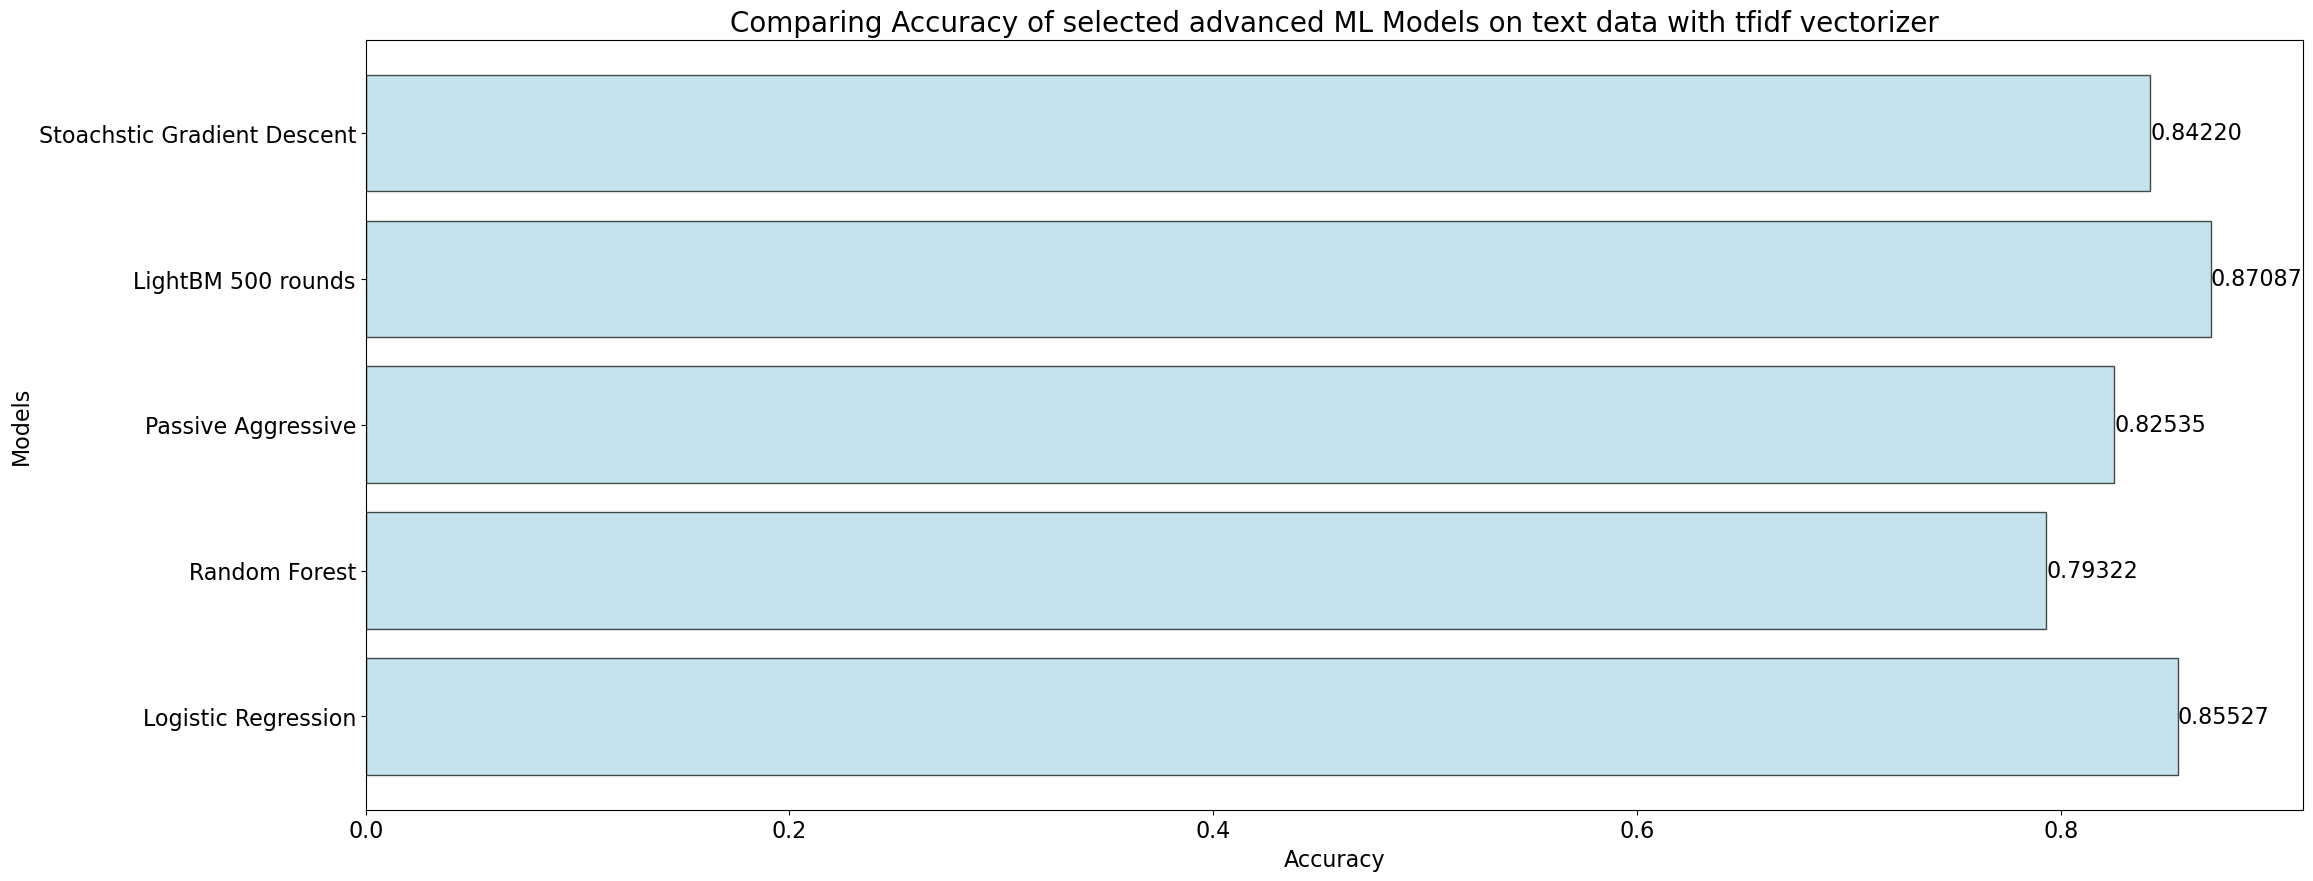

In [446]:
# Data for the chart
acc_labels_sel_tfidf_opt = list(acc_labels_tfidf_sel_opt.keys())
acc_values_sel_tfidf_opt = list(acc_labels_tfidf_sel_opt.values())

# Creating the chart
plt.figure(figsize=(25, 10))
plt.title('Comparing Accuracy of final optimized ML Models on text data with tfidf vectorizer', fontsize=20)
plt.xlabel('Accuracy', fontsize=16)
plt.ylabel('Models', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)# Increase the plot width to accommodate the values

plt.barh(acc_labels_sel_tfidf_opt, acc_values_sel_tfidf_opt, color='cyan', edgecolor='black', linewidth=1, alpha=0.7)

# Displaying values at the end of the bars
for i, value in enumerate(acc_values_sel_tfidf_opt):
    plt.text(value, i, f'{value:.5f}', fontsize=16, va='center')

plt.show();

## PLOT: f1 score of final optimized models tfidf

In [598]:
#Creating the Dictionary with model name as key and accuracy as key-value
f1_labels_tfidf_sel_opt={'Logistic Regression':f1_LogReg_tfidf_opt,
        'Random Forest':f1_rf_tfidf_opt,
        'Stoachstic Gradient Descent':f1_sgd_tfidf_opt,
        'Stacking':f1_sclf_tfidf} 
        

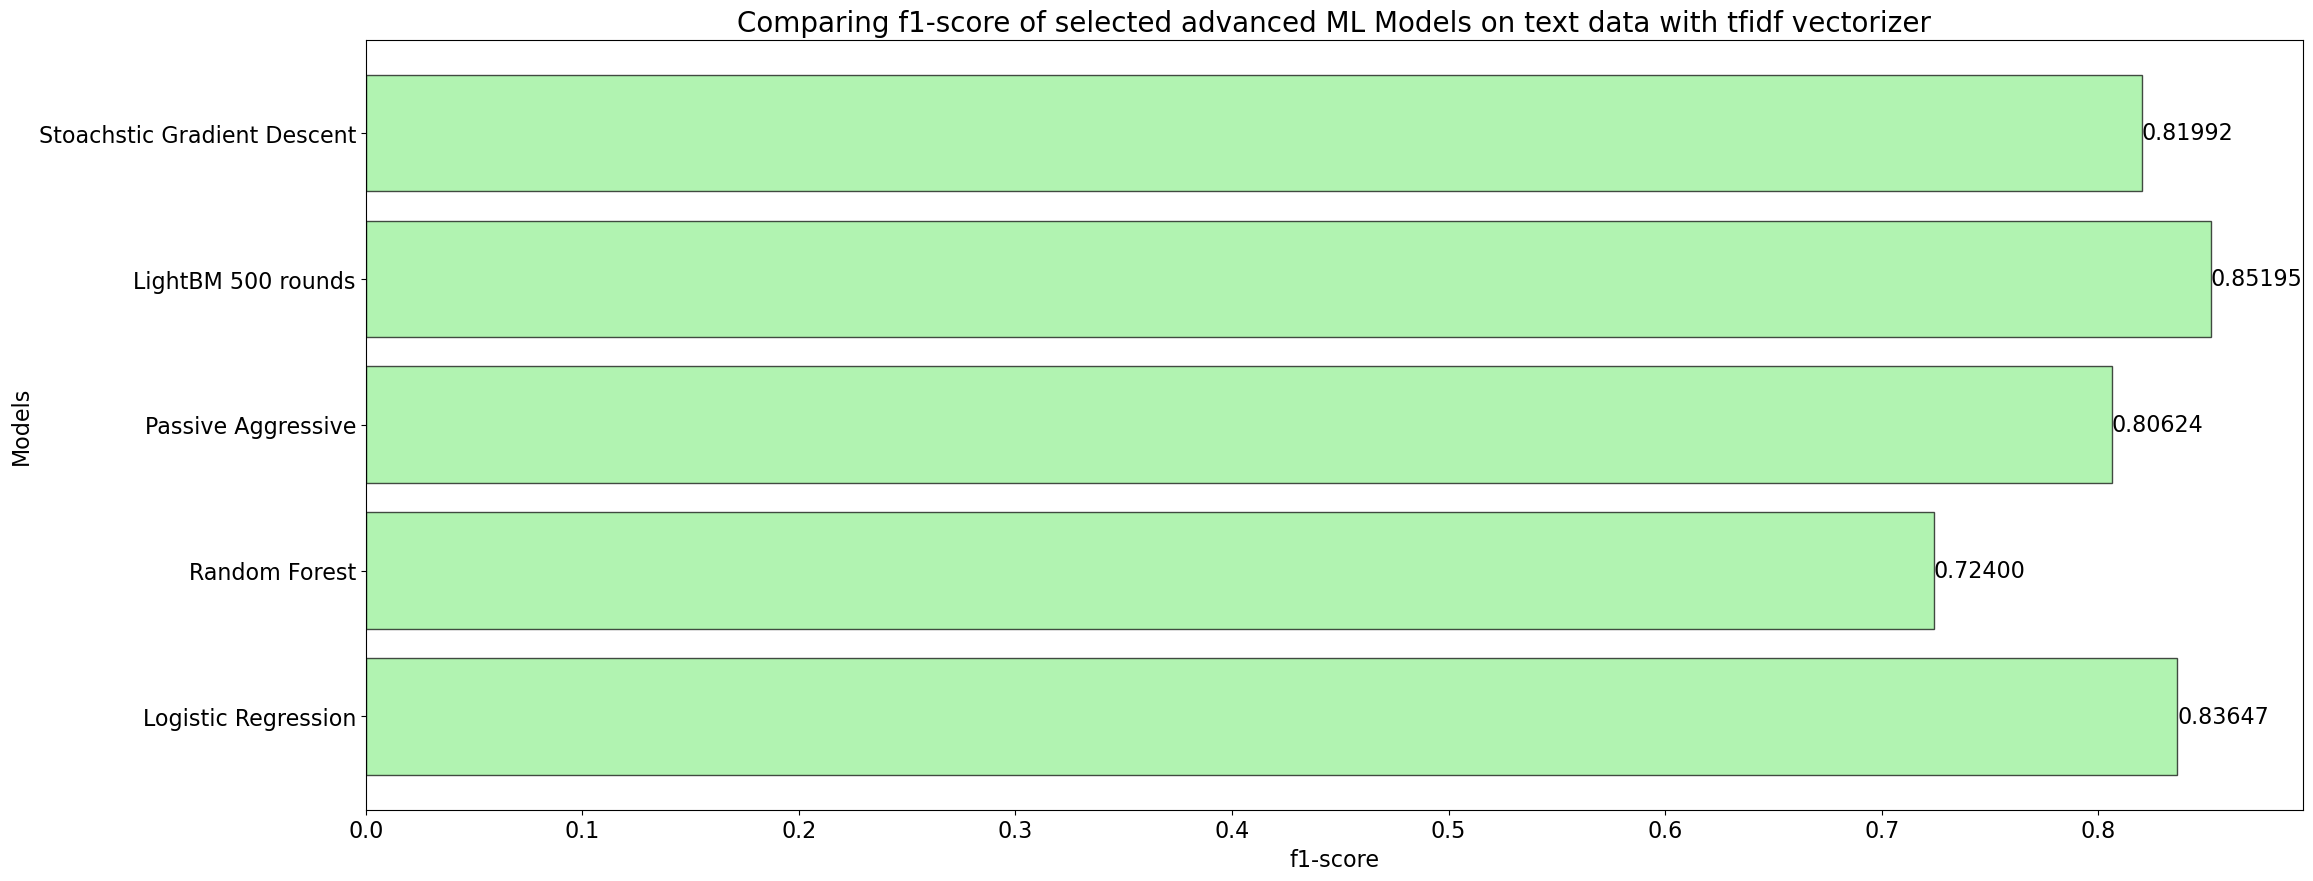

In [447]:
# Data for the chart
f1_labels_sel_tfidf_opt = list(f1_labels_tfidf_sel_opt.keys())
f1_values_sel_tfidf_opt = list(f1_labels_tfidf_sel_opt.values())

# Creating the chart
plt.figure(figsize=(25, 10))
plt.title('Comparing f1-score of final optimized ML Models on text data with tfidf vectorizer', fontsize=20)
plt.xlabel('f1-score', fontsize=16)
plt.ylabel('Models', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)# Increase the plot width to accommodate the values

plt.barh(f1_labels_sel_tfidf_opt, f1_values_sel_tfidf_opt, color='lime', edgecolor='black', linewidth=1, alpha=0.7)

# Displaying values at the end of the bars
for i, value in enumerate(f1_values_sel_tfidf_opt):
    plt.text(value, i, f'{value:.5f}', fontsize=16, va='center')

plt.show();


# RUN OPTIMIZED MODELS Count Vectorizer


In [ ]:
import warnings

warnings.filterwarnings(action="ignore")

## CREATE LOGISTIC REGRESSION MODEL ON count text data with optimal parameters


## USED DATASETS:
## X_train_text_count, X_test_text_count, Y_train_count, Y_test_count


In [92]:
# Instantiate model 
from sklearn.linear_model import LogisticRegression

clf_LogReg_count_opt = LogisticRegression(C=0.1, max_iter=1000, penalty="l1", solver="liblinear")

In [93]:
# Fit the model on the training dataset
clf_LogReg_count_opt.fit(X_train_text_count, Y_train_count)


LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')

In [94]:
y_pred_LogReg_count_opt = clf_LogReg_count_opt.predict(X_test_text_count)


In [95]:
# get accuracy
accuracy_LogReg_count_opt = clf_LogReg_count_opt.score(X_test_text_count, Y_test_count)
accuracy_LogReg_count_opt

# 8450

0.8450754852624012

In [96]:
# Evaluate the model

f1_LogReg_count_opt = f1_score(Y_test_count, y_pred_LogReg_count_opt)
print("f1 score:", f1_LogReg_count_opt)

# 0.825

f1 score: 0.8252938792055129


In [97]:
# get confusion matrix
pd.crosstab(Y_test_count, y_pred_LogReg_count_opt, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,10664,1552
1.0,1896,8144


In [98]:
from sklearn.metrics import classification_report 

# get classification report
print("Logistic Regression count optimized classification report:\n ", classification_report (Y_test_count, y_pred_LogReg_count_opt))


Logistic Regression count optimized classification report:
                precision    recall  f1-score   support

         0.0       0.85      0.87      0.86     12216
         1.0       0.84      0.81      0.83     10040

    accuracy                           0.85     22256
   macro avg       0.84      0.84      0.84     22256
weighted avg       0.84      0.85      0.84     22256



In [99]:
# create confusion matrix
from sklearn.metrics import confusion_matrix 

cf_matrix_LogReg_count_opt = confusion_matrix(Y_test_count, y_pred_LogReg_count_opt)
print(cf_matrix_LogReg_count_opt)


[[10664  1552]
 [ 1896  8144]]


Confusion Matrix for optimized Logistic Regression model on count data


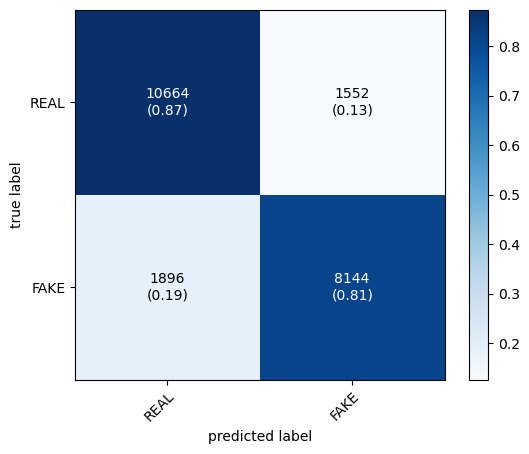

In [100]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for optimized Logistic Regression model on count data")
plot_confusion_matrix(conf_mat = cf_matrix_LogReg_count_opt,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();

## Random Forest model ON count text data with optimal parameters
## takes 1,5 hour

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
# Instantiate the model
clf_rf_count_opt = RandomForestClassifier(n_jobs=-1, criterion="entropy", class_weight={0: 1, 1: 1}, n_estimators=400)


In [103]:
# fit model
clf_rf_count_opt.fit(X_train_text_count, Y_train_count)


RandomForestClassifier(class_weight={0: 1, 1: 1}, criterion='entropy',
                       n_estimators=400, n_jobs=-1)

In [104]:
#Predict on the test set 
y_pred_rf_count_opt = clf_rf_count_opt.predict(X_test_text_count)


In [105]:
# get accuracy
accuracy_rf_count_opt = clf_rf_count_opt.score(X_test_text_count, Y_test_count)
accuracy_rf_count_opt

# 0.80

0.8039180445722501

In [106]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_rf_count_opt = f1_score(Y_test_count, y_pred_rf_count_opt)
f1_rf_count_opt

# 0.736


0.7366006760019314

In [107]:
# get confusion matrix
pd.crosstab(Y_test_count, y_pred_rf_count_opt, rownames=["true"], colnames=["predict"])

# overall prediction is quite good
# best prediction: real news as real news (0:0), followed by fake news as fake news (1:1)
# best result for false positives (real news being predicted as fake news)

predict,0.0,1.0
true,,
0.0,11790,426
1.0,3938,6102


In [108]:
from sklearn.metrics import classification_report 

# get classification report
print("Random Forest count optimized classification report:\n ", classification_report (Y_test_count, y_pred_rf_count_opt))


Random Forest count optimized classification report:
                precision    recall  f1-score   support

         0.0       0.75      0.97      0.84     12216
         1.0       0.93      0.61      0.74     10040

    accuracy                           0.80     22256
   macro avg       0.84      0.79      0.79     22256
weighted avg       0.83      0.80      0.80     22256



In [110]:
# create confusion matrix
cf_matrix_rf_count_opt = confusion_matrix(Y_test_count, y_pred_rf_count_opt)
print(cf_matrix_rf_count_opt)


[[11790   426]
 [ 3938  6102]]


Confusion Matrix for optimized Random Forest model on count vectorized data


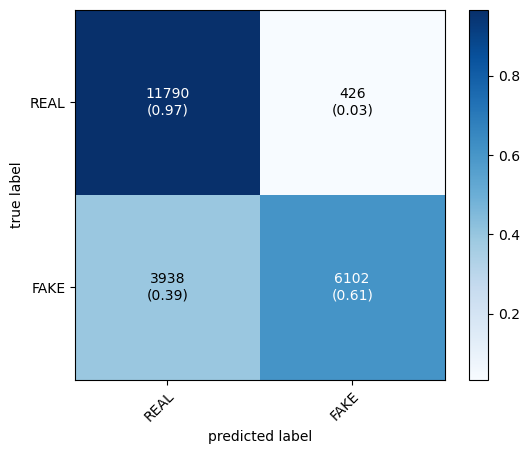

In [111]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for optimized Random Forest model on count vectorized data")
plot_confusion_matrix(conf_mat = cf_matrix_rf_count_opt,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();

## SGD model ON count text data with optimal parameters

In [ ]:
# BEST PARAMS FOR SGD:
# {'class_weight': None, 'loss': 'hinge', 'penalty': 'elasticnet'}

In [112]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Create an SGD classifier
sgd_count_opt = SGDClassifier(loss= 'hinge', penalty= 'elasticnet')

In [113]:
# Train the SGD model
sgd_count_opt.fit(X_train_text_count, Y_train_count)


SGDClassifier(penalty='elasticnet')

In [114]:
# Make predictions on the test set
y_pred_sgd_count_opt = sgd_count_opt.predict(X_test_text_count)

In [115]:
# Calculate accuracy
accuracy_sgd_count_opt = accuracy_score(Y_test_count, y_pred_sgd_count_opt)
accuracy_sgd_count_opt

# 0.83

0.834246944644141

In [117]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_sgd_count_opt = f1_score(Y_test_count, y_pred_sgd_count_opt)
f1_sgd_count_opt

# 0.8007

0.8007130895143428

In [120]:
# Create crosstab
pd.crosstab(Y_test_count, y_pred_sgd_count_opt, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no super good result for any of the cases

predict,0.0,1.0
true,,
0.0,11156,1060
1.0,2629,7411


In [121]:
from sklearn.metrics import classification_report 

# get classification report
print("SGD count optimized classification report:\n ", classification_report (Y_test_count, y_pred_sgd_count_opt))


SGD count optimized classification report:
                precision    recall  f1-score   support

         0.0       0.81      0.91      0.86     12216
         1.0       0.87      0.74      0.80     10040

    accuracy                           0.83     22256
   macro avg       0.84      0.83      0.83     22256
weighted avg       0.84      0.83      0.83     22256



In [123]:
# create confusion matrix
cf_matrix_sgd_count_opt = confusion_matrix(Y_test_count, y_pred_sgd_count_opt)
print(cf_matrix_sgd_count_opt)

[[11156  1060]
 [ 2629  7411]]


Confusion Matrix for optimized SGD model on count vectorized data


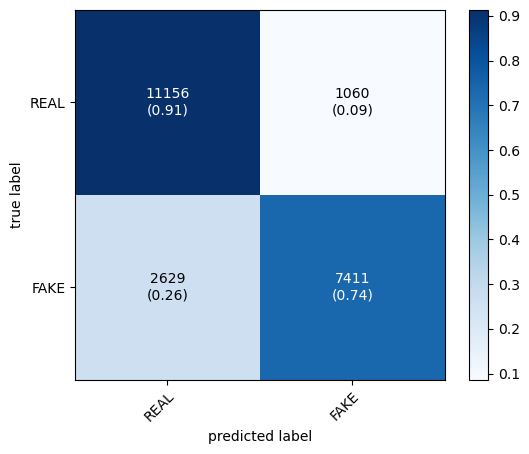

In [124]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for optimized SGD model on count vectorized data")
plot_confusion_matrix(conf_mat = cf_matrix_sgd_count_opt,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();

# STACKING WITH OPTIMAL MODELS AND COUNT VECTORIZER
# RUNS A COUPLE OF HOURS!

In [126]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_validate, KFold

In [127]:
sclf_count = StackingClassifier([("rf", clf_rf_count_opt), ("sgd", sgd_count_opt), ("lr", clf_LogReg_count_opt)], 
                                final_estimator = clf_LogReg_count_opt)


In [ ]:
sclf_count.fit(X_train_text_count, Y_train_count)

In [57]:
# Make predictions on the test set
y_pred_sclf_count = sclf_count.predict(X_test_text_count)

In [ ]:
# Calculate accuracy
accuracy_sclf_count = accuracy_score(Y_test_count, y_pred_sclf_count)
accuracy_sclf_count


In [ ]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_sclf_count = f1_score(Y_test_count, y_pred_sclf_count)
f1_sclf_count


In [ ]:
# Create crosstab
pd.crosstab(Y_test_count, y_pred_sclf_count, rownames=["true"], colnames=["predict"])


In [ ]:
from sklearn.metrics import classification_report 

# get classification report
print("Stacking Classifier count vectorizer optimized classification report:\n ", classification_report (Y_test_count, y_pred_sclf_count))


In [ ]:
# create confusion matrix
cf_matrix_sclf_count = confusion_matrix(Y_test_count, y_pred_sclf_count)
print(cf_matrix_sclf_count)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for optimized Stacking Classifier model on count vectorized data")
plot_confusion_matrix(conf_mat = cf_matrix_sclf_count,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();

# SAVE COUNT VECTORIZER STACKING MODEL

In [65]:
from joblib import dump, load

In [66]:
dump(sclf_count, "model_count.joblib")

['model.joblib']

# COMPARE OPTIMIZED MODELS ON TEXT DATA ONLY COUNT


In [ ]:
# MODELS FOR STAGE 3 (Optimized Models):

# Logistic Regression
# Random Forest
# Stochastic Gradient Descent
# Stacking Model TFIDF


# COMPARE OPTIMAL COUNT VECTORIZER MODELS 


In [ ]:
print("Logistic Regression optimized accuracy score count:", accuracy_LogReg_count_opt)
print("Random Forest optimized accuracy score count:", accuracy_rf_count_opt)
print("Stochastic Gradient Descent optimized accuracy score count:", accuracy_sgd_count_opt)
print("Stacking Classifier accuracy score count:", accuracy_sclf_count_opt)

In [ ]:
print("Logistic Regression optimized f1 score count:", f1_LogReg_count_opt)
print("Random Forest optimized f1 score count:", f1_rf_count_opt)
print("Stochastic Gradient Descent optimized f1 score count:", f1_sgd_count_opt)
print("Stacking Classifier f1 score count:", f1_sclf_count_opt)